## Inicialización

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import textwrap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import random
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,roc_auc_score,precision_recall_curve
import warnings
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import FitFailedWarning
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [3]:
transa_file="C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Dataset/IBM/archive/credit_card_transactions-ibm_v2.csv"
usuarios_file="C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Dataset/IBM/archive/sd254_users.csv"
tarjeta_file="C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Dataset/IBM/archive/sd254_cards.csv"

In [4]:
transac=pd.read_csv(transa_file)
usuarios=pd.read_csv(usuarios_file)
tarjeta=pd.read_csv(tarjeta_file, dtype={"CVV":str})

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Limpieza del conjunto de datos

### 1.1 Tabla de datos Transacciones

In [8]:
## Tabla inicial
transac.head(50)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.00,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.00,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.00,5912,NaN,No
5,0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.00,5970,NaN,No
6,0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NaN,No
7,0,0,2002,9,4,06:09,$123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NaN,No
8,0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NaN,No
9,0,0,2002,9,5,09:35,$57.10,Swipe Transaction,4055257078481058705,La Verne,CA,91750.00,7538,NaN,No


In [9]:
#### Cambios en el tipo de datos

## Quitar el simbolo $ a la variable Amount
transac["Amount"]=transac["Amount"].replace(r'[\$]','',regex=True)
transac["Amount"]=transac["Amount"].astype(float)

## Convertir las variables User y Card en cualitativas
transac["User"]=transac["User"].astype(object)
transac["Card"]=transac["Card"].astype(object)
transac["Merchant Name"]=transac["Merchant Name"].astype(object)
transac["MCC"]=transac["MCC"].astype(object)

## Convertir la hora de la transacción a formato fecha

transac["Time"]=pd.to_datetime(transac["Time"], format="%H:%M")

## Crear la variable Date

transac["Date"]=pd.to_datetime(transac[["Year","Month","Day"]])

In [10]:
## Nueva configuración del tipo de datos

transac.dtypes

User                      object
Card                      object
Year                       int64
Month                      int64
Day                        int64
Time              datetime64[ns]
Amount                   float64
Use Chip                  object
Merchant Name             object
Merchant City             object
Merchant State            object
Zip                      float64
MCC                       object
Errors?                   object
Is Fraud?                 object
Date              datetime64[ns]
dtype: object

In [11]:
## Erorres comunes al realizar las transacciones

print(transac["Errors?"].value_counts())

Errors?
Insufficient Balance                                   242783
Bad PIN                                                 58918
Technical Glitch                                        48157
Bad Card Number                                         13321
Bad CVV                                                 10740
Bad Expiration                                          10716
Bad Zipcode                                              2079
Bad PIN,Insufficient Balance                              581
Insufficient Balance,Technical Glitch                     457
Bad PIN,Technical Glitch                                  128
Bad Card Number,Insufficient Balance                      122
Bad CVV,Insufficient Balance                               89
Bad Expiration,Insufficient Balance                        78
Bad Card Number,Bad CVV                                    60
Bad Card Number,Bad Expiration                             54
Bad Expiration,Bad CVV                                     47


In [12]:
## transacciones con error

print("Cantidad de transacciones con error:",transac[transac["Errors?"]=="NaN"].shape)

Cantidad de transacciones con error: (0, 16)


In [13]:
## Cantidad de datos faltantes de la tabla de transacciones original

transac.isnull().sum().sort_values(ascending=False)

Errors?           23998469
Zip                2878135
Merchant State     2720821
User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Time                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
MCC                      0
Is Fraud?                0
Date                     0
dtype: int64

In [14]:
## Quitar transacciones con error

### Reemplazando con NO los datos faltantes en la variable Errors?
transac["Errors?"]=transac["Errors?"].fillna("NO")

### Filtrando por las transacciones sin error
transac_sin_errores=transac.loc[transac["Errors?"]=="NO"]
transac_sin_errores

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
0,0,0,2002,9,1,1900-01-01 06:21:00,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.00,5300,NO,No,2002-09-01
1,0,0,2002,9,1,1900-01-01 06:42:00,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NO,No,2002-09-01
2,0,0,2002,9,2,1900-01-01 06:22:00,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NO,No,2002-09-02
3,0,0,2002,9,2,1900-01-01 17:45:00,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.00,5651,NO,No,2002-09-02
4,0,0,2002,9,3,1900-01-01 06:23:00,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.00,5912,NO,No,2002-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,1900-01-01 22:23:00,-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.00,5541,NO,No,2020-02-27
24386896,1999,1,2020,2,27,1900-01-01 22:24:00,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.00,5541,NO,No,2020-02-27
24386897,1999,1,2020,2,28,1900-01-01 07:43:00,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.00,4121,NO,No,2020-02-28
24386898,1999,1,2020,2,28,1900-01-01 20:10:00,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.00,4121,NO,No,2020-02-28


#### 1.1.1 Identificación de datos faltantes

In [16]:
## Identificación de datos daltantes de la tabla transacciones después de eliminar transacciones con error

transac_sin_errores.isnull().sum().sort_values(ascending=False)

Zip               2814594
Merchant State    2659365
User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Amount                  0
Use Chip                0
Merchant Name           0
Merchant City           0
MCC                     0
Errors?                 0
Is Fraud?               0
Date                    0
dtype: int64

#### 1.1.2 Identificación de datos duplicados

In [18]:
## Cantidad de duplicados
duplicados=transac_sin_errores.duplicated()
print("Cantidad de transacciones duplicadas:",duplicados.sum())

Cantidad de transacciones duplicadas: 20


In [19]:
## Transacciones duplicadas
transac_dupli=transac_sin_errores[transac_sin_errores.duplicated(keep=False)]
transac_dupli.sort_values(by=["User","Card"])

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
2469535,205,2,2012,2,8,1900-01-01 17:33:00,82.00,Swipe Transaction,2027553650310142703,Huntington Station,NY,11746.00,5541,NO,No,2012-02-08
2469536,205,2,2012,2,8,1900-01-01 17:33:00,82.00,Swipe Transaction,2027553650310142703,Huntington Station,NY,11746.00,5541,NO,No,2012-02-08
2773483,235,1,2008,5,22,1900-01-01 10:23:00,83.00,Swipe Transaction,1799189980464955940,Garland,TX,75042.00,5499,NO,No,2008-05-22
2773484,235,1,2008,5,22,1900-01-01 10:23:00,83.00,Swipe Transaction,1799189980464955940,Garland,TX,75042.00,5499,NO,No,2008-05-22
3580166,300,1,2017,8,25,1900-01-01 07:15:00,63.00,Chip Transaction,1799189980464955940,Kingman,AZ,86401.00,5499,NO,No,2017-08-25
3580167,300,1,2017,8,25,1900-01-01 07:15:00,63.00,Chip Transaction,1799189980464955940,Kingman,AZ,86401.00,5499,NO,No,2017-08-25
4030944,332,0,2017,2,7,1900-01-01 14:52:00,76.00,Chip Transaction,1799189980464955940,Farmington,MN,55024.00,5499,NO,No,2017-02-07
4030945,332,0,2017,2,7,1900-01-01 14:52:00,76.00,Chip Transaction,1799189980464955940,Farmington,MN,55024.00,5499,NO,No,2017-02-07
10804944,901,1,2012,7,25,1900-01-01 12:20:00,-93.00,Swipe Transaction,-1288082279022882052,Vacaville,CA,95687.00,5499,NO,No,2012-07-25
10804945,901,1,2012,7,25,1900-01-01 12:20:00,-93.00,Swipe Transaction,-1288082279022882052,Vacaville,CA,95687.00,5499,NO,No,2012-07-25


In [20]:
## Eliminación de transacciones duplicadas
transac_sin_errores=transac_sin_errores.drop_duplicates()
transac_sin_errores

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
0,0,0,2002,9,1,1900-01-01 06:21:00,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.00,5300,NO,No,2002-09-01
1,0,0,2002,9,1,1900-01-01 06:42:00,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NO,No,2002-09-01
2,0,0,2002,9,2,1900-01-01 06:22:00,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NO,No,2002-09-02
3,0,0,2002,9,2,1900-01-01 17:45:00,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.00,5651,NO,No,2002-09-02
4,0,0,2002,9,3,1900-01-01 06:23:00,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.00,5912,NO,No,2002-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,1900-01-01 22:23:00,-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.00,5541,NO,No,2020-02-27
24386896,1999,1,2020,2,27,1900-01-01 22:24:00,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.00,5541,NO,No,2020-02-27
24386897,1999,1,2020,2,28,1900-01-01 07:43:00,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.00,4121,NO,No,2020-02-28
24386898,1999,1,2020,2,28,1900-01-01 20:10:00,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.00,4121,NO,No,2020-02-28


#### 1.1.3 Identificación de datos atípicos

In [22]:
## Quitar transacciones que representan devoluciones, es decir, el monto de la transacción es negativo.
Trans_sin_dev=transac_sin_errores.loc[transac_sin_errores["Amount"]>=0]
Trans_sin_dev

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
0,0,0,2002,9,1,1900-01-01 06:21:00,134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.00,5300,NO,No,2002-09-01
1,0,0,2002,9,1,1900-01-01 06:42:00,38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NO,No,2002-09-01
2,0,0,2002,9,2,1900-01-01 06:22:00,120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.00,5411,NO,No,2002-09-02
3,0,0,2002,9,2,1900-01-01 17:45:00,128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.00,5651,NO,No,2002-09-02
4,0,0,2002,9,3,1900-01-01 06:23:00,104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.00,5912,NO,No,2002-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386894,1999,1,2020,2,27,1900-01-01 22:18:00,63.43,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.00,5541,NO,No,2020-02-27
24386896,1999,1,2020,2,27,1900-01-01 22:24:00,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.00,5541,NO,No,2020-02-27
24386897,1999,1,2020,2,28,1900-01-01 07:43:00,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.00,4121,NO,No,2020-02-28
24386898,1999,1,2020,2,28,1900-01-01 20:10:00,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.00,4121,NO,No,2020-02-28


In [23]:
## Identificación de datos atípicos

Q1=Trans_sin_dev["Amount"].quantile(0.25)
Q3=Trans_sin_dev["Amount"].quantile(0.75)
RIC=Q3-Q1
limite_inferior=Q1-3*RIC
limite_superior=Q3+3*RIC
atipicos_extremos=Trans_sin_dev[(Trans_sin_dev["Amount"]<limite_inferior)|(Trans_sin_dev["Amount"]>limite_superior)]
print("Datos atípicos:", len(atipicos_extremos))
atipicos_extremos.head(50)

Datos atípicos: 425220


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
119,0,0,2002,10,14,1900-01-01 06:12:00,1049.82,Swipe Transaction,-2187837027406294082,San Diego,CA,92123.00,3058,NO,No,2002-10-14
129,0,0,2002,10,16,1900-01-01 20:01:00,521.24,Swipe Transaction,-811651038065591449,La Verne,CA,91750.00,6300,NO,No,2002-10-16
235,0,0,2002,11,26,1900-01-01 11:21:00,379.73,Swipe Transaction,6515854639642454768,Calexico,CA,92231.00,3066,NO,No,2002-11-26
302,0,0,2002,12,23,1900-01-01 10:14:00,255.00,Swipe Transaction,-8566951830324093739,Waynesville,MO,65583.00,3640,NO,No,2002-12-23
366,0,0,2003,1,24,1900-01-01 19:39:00,432.22,Swipe Transaction,-811651038065591449,La Verne,CA,91750.00,6300,NO,No,2003-01-24
456,0,0,2003,3,28,1900-01-01 06:34:00,764.60,Swipe Transaction,1325201427189385167,Rosemead,CA,91770.00,3132,NO,No,2003-03-28
527,0,0,2003,5,11,1900-01-01 22:59:00,430.00,Swipe Transaction,-6406662083475903219,Eagle Pass,TX,78852.00,3390,NO,No,2003-05-11
1109,0,0,2005,3,13,1900-01-01 11:15:00,266.77,Swipe Transaction,3129259766334579731,La Verne,CA,91750.00,8011,NO,No,2005-03-13
1117,0,0,2005,3,27,1900-01-01 08:58:00,296.00,Swipe Transaction,-1612219785829480227,Smithville,TX,78957.00,3387,NO,No,2005-03-27
1298,0,0,2005,11,17,1900-01-01 16:47:00,258.00,Swipe Transaction,-6406662083475903219,Chicago,IL,60643.00,3390,NO,No,2005-11-17


### 1.2 Tabla de datos de Usuarios

In [25]:
##Configurando el tipo de variables

usuarios["Per Capita Income - Zipcode"]=usuarios["Per Capita Income - Zipcode"].replace(r'[\$]','',regex=True)
usuarios["Per Capita Income - Zipcode"]=usuarios["Per Capita Income - Zipcode"].astype(float)
usuarios["Yearly Income - Person"]=usuarios["Yearly Income - Person"].replace(r'[\$]','',regex=True)
usuarios["Yearly Income - Person"]=usuarios["Yearly Income - Person"].astype(float)
usuarios["Total Debt"]=usuarios["Total Debt"].replace(r'[\$]','',regex=True)
usuarios["Total Debt"]=usuarios["Total Debt"].astype(float)
usuarios["Zipcode"]=usuarios["Zipcode"].astype(object)
usuarios["User"]=usuarios.index
usuarios["Birth"]=pd.to_datetime(usuarios["Birth Year"].astype(str)+'-'+usuarios["Birth Month"].astype(str))

In [26]:
usuarios.dtypes

Person                                 object
Current Age                             int64
Retirement Age                          int64
Birth Year                              int64
Birth Month                             int64
Gender                                 object
Address                                object
Apartment                             float64
City                                   object
State                                  object
Zipcode                                object
Latitude                              float64
Longitude                             float64
Per Capita Income - Zipcode           float64
Yearly Income - Person                float64
Total Debt                            float64
FICO Score                              int64
Num Credit Cards                        int64
User                                    int64
Birth                          datetime64[ns]
dtype: object

In [27]:
usuarios.head(50)

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,User,Birth
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.00,59696.00,127613.00,787,5,0,1966-11-01
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,37891.00,77254.00,191349.00,701,5,1,1966-12-01
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,22681.00,33483.00,196.00,698,5,2,1938-11-01
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,163145.00,249925.00,202328.00,722,4,3,1957-01-01
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,53797.00,109687.00,183855.00,675,1,4,1976-09-01
5,Aldo Walker,42,70,1977,10,Male,58 Birch Lane,6.00,Davenport,IA,52803,41.55,-90.60,20599.00,41997.00,0.00,704,3,5,1977-10-01
6,Katalina Lewis,36,67,1983,12,Female,5695 Fifth Street,1.00,Louisville,KY,40299,38.22,-85.74,25258.00,51500.00,102286.00,672,3,6,1983-12-01
7,Ryland Howard,26,67,1993,12,Male,1941 Ninth Street,10.00,Portland,OR,97214,45.51,-122.64,26790.00,54623.00,114711.00,728,1,7,1993-12-01
8,Kenya Cooper,81,66,1938,7,Female,11 Spruce Avenue,NaN,Telford,PA,18969,40.32,-75.32,26273.00,42509.00,2895.00,755,5,8,1938-07-01
9,Sawyer Butler,34,60,1986,1,Female,887 Grant Street,NaN,Abbeville,LA,70510,29.97,-92.12,18730.00,38190.00,81262.00,810,1,9,1986-01-01


#### 1.2.1 Identificación de datos faltantes

In [29]:
usuarios.isnull().sum().sort_values(ascending=False)

Apartment                      1472
Person                            0
Latitude                          0
User                              0
Num Credit Cards                  0
FICO Score                        0
Total Debt                        0
Yearly Income - Person            0
Per Capita Income - Zipcode       0
Longitude                         0
Zipcode                           0
Current Age                       0
State                             0
City                              0
Address                           0
Gender                            0
Birth Month                       0
Birth Year                        0
Retirement Age                    0
Birth                             0
dtype: int64

In [30]:
## Eliminando columan Apartment
usuarios.drop('Apartment', axis=1, inplace=True)

#### 1.2.2 Identificación de datos duplicados

In [32]:
## Cantidad de duplicados
duplicados_usu=usuarios.duplicated()
print("Cantidad de transacciones duplicadas:",duplicados_usu.sum())

Cantidad de transacciones duplicadas: 0


#### 1.2.3 Identificación de datos atípicos

In [34]:
# Función para identificar datos atipicos por variable de un dataframe

def atipicos(var):
    Q1=usuarios[var].quantile(0.25)
    Q3=usuarios[var].quantile(0.75)
    RIC=Q3-Q1
    limite_inferior=Q1-3*RIC
    limite_superior=Q3+3*RIC
    atipicos_usu=usuarios[(usuarios[var]<limite_inferior)|(usuarios[var]>limite_superior)]
    return atipicos_usu
    
## Creando dataframe con los datos atipicos
atp_usu=pd.concat(atipicos(var) for var in list(usuarios.loc[:,["Per Capita Income - Zipcode", "Yearly Income - Person", "Total Debt","Num Credit Cards"]].columns))
print("Cantidad de datos atípicos extremos: ",len(atp_usu))

Cantidad de datos atípicos extremos:  65


### 1.3 Tabla de datos Tarjetas

In [36]:
tarjeta["Credit Limit"]=tarjeta["Credit Limit"].replace(r'[\$]','',regex=True)
tarjeta["Credit Limit"]=tarjeta["Credit Limit"].astype(float)
tarjeta["User"]=tarjeta["User"].astype(object)
tarjeta["CARD INDEX"]=tarjeta["CARD INDEX"].astype(object)
tarjeta["Card Number"]=tarjeta["Card Number"].astype(object)
tarjeta['Expires'] = pd.to_datetime(tarjeta['Expires'], format='%m/%Y')
tarjeta['Acct Open Date'] = pd.to_datetime(tarjeta['Acct Open Date'], format='%m/%Y')

In [37]:
tarjeta.dtypes

User                             object
CARD INDEX                       object
Card Brand                       object
Card Type                        object
Card Number                      object
Expires                  datetime64[ns]
CVV                              object
Has Chip                         object
Cards Issued                      int64
Credit Limit                    float64
Acct Open Date           datetime64[ns]
Year PIN last Changed             int64
Card on Dark Web                 object
dtype: object

In [38]:
tarjeta.head(50)

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,2022-12-01,623,YES,2,24295.00,2002-09-01,2008,No
1,0,1,Visa,Debit,4956965974959986,2020-12-01,393,YES,2,21968.00,2014-04-01,2014,No
2,0,2,Visa,Debit,4582313478255491,2024-02-01,719,YES,2,46414.00,2003-07-01,2004,No
3,0,3,Visa,Credit,4879494103069057,2024-08-01,693,NO,1,12400.00,2003-01-01,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,075,YES,1,28.00,2008-09-01,2009,No
5,1,0,Visa,Credit,4404898874682993,2003-09-01,736,YES,1,27500.00,2003-09-01,2012,No
6,1,1,Visa,Debit,4001482973848631,2022-07-01,972,YES,2,28508.00,2011-02-01,2011,No
7,1,2,Mastercard,Debit,5627220683410948,2022-06-01,048,YES,2,9022.00,2003-07-01,2015,No
8,1,3,Mastercard,Debit (Prepaid),5711382187309326,2020-11-01,722,YES,2,54.00,2010-06-01,2015,No
9,1,4,Mastercard,Debit (Prepaid),5766121508358701,2023-02-01,908,YES,1,99.00,2006-07-01,2012,No


#### 1.3.1 Identificando datos faltantes

In [40]:
tarjeta.isnull().sum().sort_values(ascending=False)

User                     0
CARD INDEX               0
Card Brand               0
Card Type                0
Card Number              0
Expires                  0
CVV                      0
Has Chip                 0
Cards Issued             0
Credit Limit             0
Acct Open Date           0
Year PIN last Changed    0
Card on Dark Web         0
dtype: int64

#### 1.3.2 Identificación de datos duplicados

In [42]:
## Cantidad de duplicados
duplicados_tar=tarjeta.duplicated()
print("Cantidad de transacciones duplicadas:",duplicados_tar.sum())

Cantidad de transacciones duplicadas: 0


#### 1.3.3 Identificación de datos atípicos

In [44]:
## Identificación de datos atípicos

Q1_tar=tarjeta["Credit Limit"].quantile(0.25)
Q3_tar=tarjeta["Credit Limit"].quantile(0.75)
RIC_tar=Q3_tar-Q1_tar
limite_inferior_tar=Q1_tar-3*RIC_tar
limite_superior_tar=Q3_tar+3*RIC_tar
atipicos_extremos_tar=tarjeta[(tarjeta["Credit Limit"]<limite_inferior_tar)|(tarjeta["Credit Limit"]>limite_superior_tar)]
print("Datos atípicos:", len(atipicos_extremos_tar))
atipicos_extremos_tar.head(50)

Datos atípicos: 64


,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
15,3,0,Visa,Credit,4017261190134817,2015-05-01,877,YES,2,98100.00,2011-01-01,2011,No
17,3,2,Visa,Debit,4032240655674503,2022-06-01,053,YES,1,132439.00,2010-11-01,2011,No
18,3,3,Visa,Debit,4935974646456357,2020-06-01,649,YES,1,125723.00,2009-10-01,2010,No
68,21,0,Visa,Debit,4832328468851061,2023-08-01,580,YES,1,68400.00,2020-01-01,2020,No
69,21,1,Mastercard,Debit,5278075482033392,2023-04-01,437,YES,2,77237.00,2020-01-01,2020,No
246,84,0,Visa,Debit,4467199760802877,2014-11-01,176,YES,1,96907.00,2014-11-01,2014,No
427,142,3,Visa,Debit,4955481558570019,2024-03-01,397,YES,2,62081.00,2020-02-01,2020,No
849,283,1,Mastercard,Debit,5179211547158075,2020-12-01,046,YES,1,61324.00,2010-07-01,2011,No
1031,345,0,Mastercard,Debit,5761678069979338,2020-02-01,725,YES,1,58709.00,2009-12-01,2009,No
1132,377,1,Visa,Debit,4817273521248161,2023-10-01,706,YES,2,55693.00,2000-01-01,2006,No


## 2. Selección de datos

### 2.1 Tabla de datos Transacciones

In [47]:
## Selección de instancias incial teniendo en cuenta los objetivos del proyecto.
transacciones=Trans_sin_dev.loc[Trans_sin_dev["Use Chip"]=="Online Transaction"]
transacciones

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
11,0,0,2002,9,5,1900-01-01 20:41:00,53.91,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,4900,NO,No,2002-09-05
24,0,0,2002,9,9,1900-01-01 20:02:00,144.90,Online Transaction,-8338381919281017248,ONLINE,NaN,NaN,4899,NO,No,2002-09-09
85,0,0,2002,9,30,1900-01-01 06:21:00,127.32,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NO,No,2002-09-30
99,0,0,2002,10,6,1900-01-01 06:14:00,139.39,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NO,No,2002-10-06
106,0,0,2002,10,9,1900-01-01 08:16:00,53.09,Online Transaction,-4956618006720593695,ONLINE,NaN,NaN,5193,NO,No,2002-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386877,1999,1,2020,2,24,1900-01-01 20:04:00,55.79,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NO,No,2020-02-24
24386879,1999,1,2020,2,25,1900-01-01 07:06:00,43.08,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NO,No,2020-02-25
24386880,1999,1,2020,2,25,1900-01-01 07:34:00,43.76,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NO,No,2020-02-25
24386884,1999,1,2020,2,26,1900-01-01 07:43:00,45.18,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NO,No,2020-02-26


In [48]:
## Selección de variables incial, siguiendo un análisis conceptual con respecto a los objetivos del proyecto
tran=transacciones.copy()
tran=tran.drop(["Merchant State", "Zip", "Errors?", "Merchant Name","Use Chip", "Merchant City"], axis=1)

In [49]:
tran.head(10)

,User,Card,Year,Month,Day,Time,Amount,MCC,Is Fraud?,Date
11,0,0,2002,9,5,1900-01-01 20:41:00,53.91,4900,No,2002-09-05
24,0,0,2002,9,9,1900-01-01 20:02:00,144.90,4899,No,2002-09-09
85,0,0,2002,9,30,1900-01-01 06:21:00,127.32,5311,No,2002-09-30
99,0,0,2002,10,6,1900-01-01 06:14:00,139.39,5311,No,2002-10-06
106,0,0,2002,10,9,1900-01-01 08:16:00,53.09,5193,No,2002-10-09
181,0,0,2002,11,5,1900-01-01 16:43:00,28.39,4814,No,2002-11-05
268,0,0,2002,12,8,1900-01-01 20:07:00,210.96,4899,No,2002-12-08
272,0,0,2002,12,10,1900-01-01 06:10:00,128.41,5311,No,2002-12-10
276,0,0,2002,12,11,1900-01-01 20:47:00,58.42,4900,No,2002-12-11
288,0,0,2002,12,16,1900-01-01 06:21:00,97.31,5311,No,2002-12-16


In [50]:
tran.shape

(2638313, 10)

### 2.2 Tabla de datos Usarios

In [52]:
usuarios.head(10)

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,User,Birth
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.00,59696.00,127613.00,787,5,0,1966-11-01
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,Little Neck,NY,11363,40.76,-73.74,37891.00,77254.00,191349.00,701,5,1,1966-12-01
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,West Covina,CA,91792,34.02,-117.89,22681.00,33483.00,196.00,698,5,2,1938-11-01
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,New York,NY,10069,40.71,-73.99,163145.00,249925.00,202328.00,722,4,3,1957-01-01
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,San Francisco,CA,94117,37.76,-122.44,53797.00,109687.00,183855.00,675,1,4,1976-09-01
5,Aldo Walker,42,70,1977,10,Male,58 Birch Lane,Davenport,IA,52803,41.55,-90.60,20599.00,41997.00,0.00,704,3,5,1977-10-01
6,Katalina Lewis,36,67,1983,12,Female,5695 Fifth Street,Louisville,KY,40299,38.22,-85.74,25258.00,51500.00,102286.00,672,3,6,1983-12-01
7,Ryland Howard,26,67,1993,12,Male,1941 Ninth Street,Portland,OR,97214,45.51,-122.64,26790.00,54623.00,114711.00,728,1,7,1993-12-01
8,Kenya Cooper,81,66,1938,7,Female,11 Spruce Avenue,Telford,PA,18969,40.32,-75.32,26273.00,42509.00,2895.00,755,5,8,1938-07-01
9,Sawyer Butler,34,60,1986,1,Female,887 Grant Street,Abbeville,LA,70510,29.97,-92.12,18730.00,38190.00,81262.00,810,1,9,1986-01-01


In [53]:
### Cantidad de categorías de las variables de ubicación
num_address=len(usuarios["Address"].unique())
num_city=len(usuarios["City"].unique())
num_state=len(usuarios["State"].unique())
num_zip=len(usuarios["Zipcode"].unique())

print("Total de direcciones diferentes:",num_address)
print("Total de ciudades diferentes:", num_city)
print("Total de estados diferentes:", num_state)
print("Total de códigos postales diferentes:", num_zip)

Total de direcciones diferentes: 1999
Total de ciudades diferentes: 1286
Total de estados diferentes: 51
Total de códigos postales diferentes: 1815


In [54]:
## Selección de variables incial, siguiendo un análisis conceptual con respecto a los objetivos del proyecto
usu=usuarios.copy()
usu=usu.drop(["Person", "Current Age", "Address", "City","Zipcode","Latitude","Longitude","Birth Year","Birth Month","Retirement Age", "FICO Score"], axis=1)

In [55]:
usu.head(10)

,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,User,Birth
0,Female,CA,29278.00,59696.00,127613.00,5,0,1966-11-01
1,Female,NY,37891.00,77254.00,191349.00,5,1,1966-12-01
2,Female,CA,22681.00,33483.00,196.00,5,2,1938-11-01
3,Female,NY,163145.00,249925.00,202328.00,4,3,1957-01-01
4,Male,CA,53797.00,109687.00,183855.00,1,4,1976-09-01
5,Male,IA,20599.00,41997.00,0.00,3,5,1977-10-01
6,Female,KY,25258.00,51500.00,102286.00,3,6,1983-12-01
7,Male,OR,26790.00,54623.00,114711.00,1,7,1993-12-01
8,Female,PA,26273.00,42509.00,2895.00,5,8,1938-07-01
9,Female,LA,18730.00,38190.00,81262.00,1,9,1986-01-01


### 2.3 Tabla de datos Tarjeta

In [57]:
tarjeta

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,2022-12-01,623,YES,2,24295.00,2002-09-01,2008,No
1,0,1,Visa,Debit,4956965974959986,2020-12-01,393,YES,2,21968.00,2014-04-01,2014,No
2,0,2,Visa,Debit,4582313478255491,2024-02-01,719,YES,2,46414.00,2003-07-01,2004,No
3,0,3,Visa,Credit,4879494103069057,2024-08-01,693,NO,1,12400.00,2003-01-01,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,075,YES,1,28.00,2008-09-01,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,2024-01-01,663,YES,1,6900.00,2000-11-01,2013,No
6142,1997,2,Visa,Credit,4718517475996018,2021-01-01,492,YES,2,5700.00,2012-04-01,2012,No
6143,1998,0,Mastercard,Credit,5929512204765914,2020-08-01,237,NO,2,9200.00,2012-02-01,2012,No
6144,1999,0,Mastercard,Debit,5589768928167462,2020-01-01,630,YES,1,28074.00,2020-01-01,2020,No


In [58]:
## Selección de instancias de interes según los objetivos del proyecto
tar_credito=tarjeta[tarjeta["Card Type"]=="Credit"]

In [59]:
tarjeta_credito=tar_credito.copy()
tarjeta_credito=tarjeta_credito.drop(["Card Number", "Card Type","CVV","Cards Issued"],axis=1)

In [60]:
tarjeta_credito.head(10)

,User,CARD INDEX,Card Brand,Expires,Has Chip,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
3,0,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
5,1,0,Visa,2003-09-01,YES,27500.00,2003-09-01,2012,No
15,3,0,Visa,2015-05-01,YES,98100.00,2011-01-01,2011,No
20,5,0,Visa,2021-09-01,YES,9900.00,2002-01-01,2019,No
22,5,2,Visa,2022-11-01,YES,15800.00,2005-11-01,2011,No
24,6,1,Mastercard,2023-07-01,YES,11200.00,2010-09-01,2010,No
29,8,2,Visa,2021-02-01,YES,16100.00,2005-01-01,2014,No
30,8,3,Visa,2021-02-01,YES,8700.00,2012-01-01,2012,No
39,13,2,Visa,2021-02-01,NO,7400.00,2020-02-01,2020,No
42,15,1,Discover,2009-01-01,NO,4700.00,2008-12-01,2014,No


In [61]:
tarjeta_credito.shape

(2057, 9)

## 3. Integración de los datos

In [63]:
### Cruce entre la tabla Transacciones y Tarjetas de crédito

transac_tar=pd.merge(tran, tarjeta_credito,left_on=["User", "Card"], right_on=["User","CARD INDEX"])
transac_tar.head(20)

,User,Card,Year,Month,Day,Time,Amount,MCC,Is Fraud?,Date,CARD INDEX,Card Brand,Expires,Has Chip,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,3,2003,1,12,1900-01-01 20:20:00,204.23,4899,No,2003-01-12,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
1,0,3,2003,1,28,1900-01-01 19:56:00,57.25,7349,No,2003-01-28,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
2,0,3,2003,1,29,1900-01-01 20:10:00,201.99,4899,No,2003-01-29,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
3,0,3,2003,1,31,1900-01-01 16:33:00,393.20,5732,No,2003-01-31,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
4,0,3,2003,2,9,1900-01-01 17:44:00,7.84,5815,No,2003-02-09,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
5,0,3,2003,2,20,1900-01-01 20:27:00,118.71,4899,No,2003-02-20,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
6,0,3,2003,2,24,1900-01-01 08:52:00,140.00,4722,No,2003-02-24,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
7,0,3,2003,2,27,1900-01-01 23:22:00,87.81,4722,No,2003-02-27,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
8,0,3,2003,3,13,1900-01-01 17:36:00,9.65,5815,No,2003-03-13,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No
9,0,3,2003,3,15,1900-01-01 19:25:00,599.77,6300,No,2003-03-15,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No


In [64]:
## Cruce entre la tabla de transacciones con tarjeta de crédito con los usuarios

transac_tar_usu=pd.merge(transac_tar,usu,left_on="User", right_on="User")
transac_tar_usu.head(20)

,User,Card,Year,Month,Day,Time,Amount,MCC,Is Fraud?,Date,CARD INDEX,Card Brand,Expires,Has Chip,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth
0,0,3,2003,1,12,1900-01-01 20:20:00,204.23,4899,No,2003-01-12,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
1,0,3,2003,1,28,1900-01-01 19:56:00,57.25,7349,No,2003-01-28,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
2,0,3,2003,1,29,1900-01-01 20:10:00,201.99,4899,No,2003-01-29,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
3,0,3,2003,1,31,1900-01-01 16:33:00,393.20,5732,No,2003-01-31,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
4,0,3,2003,2,9,1900-01-01 17:44:00,7.84,5815,No,2003-02-09,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
5,0,3,2003,2,20,1900-01-01 20:27:00,118.71,4899,No,2003-02-20,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
6,0,3,2003,2,24,1900-01-01 08:52:00,140.00,4722,No,2003-02-24,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
7,0,3,2003,2,27,1900-01-01 23:22:00,87.81,4722,No,2003-02-27,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
8,0,3,2003,3,13,1900-01-01 17:36:00,9.65,5815,No,2003-03-13,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
9,0,3,2003,3,15,1900-01-01 19:25:00,599.77,6300,No,2003-03-15,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01


In [65]:
## Tamaño del dataset al integrar las tres tablas

transac_tar_usu.shape

(809428, 25)

In [66]:
## Tipos de datos del dataset

transac_tar_usu.dtypes

User                                   object
Card                                   object
Year                                    int64
Month                                   int64
Day                                     int64
Time                           datetime64[ns]
Amount                                float64
MCC                                    object
Is Fraud?                              object
Date                           datetime64[ns]
CARD INDEX                             object
Card Brand                             object
Expires                        datetime64[ns]
Has Chip                               object
Credit Limit                          float64
Acct Open Date                 datetime64[ns]
Year PIN last Changed                   int64
Card on Dark Web                       object
Gender                                 object
State                                  object
Per Capita Income - Zipcode           float64
Yearly Income - Person            

In [67]:
### Periodo en que aparecen las transacciones fraudulentas online

tran_fraude=transac_tar_usu[transac_tar_usu["Is Fraud?"]=="Yes"]
print("Fecha en la cual aparece la primera transacción online con tarjeta de crédito frauculenta:",tran_fraude["Date"].min())
print("Fecha en la cual aparece la última transacción online con tarjeta de crédito frauculenta:",tran_fraude["Date"].max())

Fecha en la cual aparece la primera transacción online con tarjeta de crédito frauculenta: 2002-11-02 00:00:00
Fecha en la cual aparece la última transacción online con tarjeta de crédito frauculenta: 2018-11-24 00:00:00


In [68]:
## Obteniendo transacciones online realizadas con tarjeta de crédito entre el 2/11/2002 y 31/12/2018

fraude_online=transac_tar_usu[(transac_tar_usu["Date"]>="2002-11-02")&(transac_tar_usu["Date"]<="2018-12-31")].copy()
fraude_online.shape

(714151, 25)

In [69]:
fraude_online

,User,Card,Year,Month,Day,Time,Amount,MCC,Is Fraud?,Date,CARD INDEX,Card Brand,Expires,Has Chip,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth
0,0,3,2003,1,12,1900-01-01 20:20:00,204.23,4899,No,2003-01-12,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
1,0,3,2003,1,28,1900-01-01 19:56:00,57.25,7349,No,2003-01-28,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
2,0,3,2003,1,29,1900-01-01 20:10:00,201.99,4899,No,2003-01-29,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
3,0,3,2003,1,31,1900-01-01 16:33:00,393.20,5732,No,2003-01-31,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
4,0,3,2003,2,9,1900-01-01 17:44:00,7.84,5815,No,2003-02-09,3,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808926,1999,1,2018,12,28,1900-01-01 20:09:00,36.95,4121,No,2018-12-28,1,Visa,2020-12-01,YES,14400.00,2017-05-01,2017,No,Female,NH,32325.00,65909.00,181261.00,2,1998-11-01
808927,1999,1,2018,12,29,1900-01-01 07:53:00,20.22,4121,No,2018-12-29,1,Visa,2020-12-01,YES,14400.00,2017-05-01,2017,No,Female,NH,32325.00,65909.00,181261.00,2,1998-11-01
808928,1999,1,2018,12,30,1900-01-01 07:47:00,58.71,4121,No,2018-12-30,1,Visa,2020-12-01,YES,14400.00,2017-05-01,2017,No,Female,NH,32325.00,65909.00,181261.00,2,1998-11-01
808929,1999,1,2018,12,30,1900-01-01 20:17:00,46.29,4121,No,2018-12-30,1,Visa,2020-12-01,YES,14400.00,2017-05-01,2017,No,Female,NH,32325.00,65909.00,181261.00,2,1998-11-01


In [70]:
fraude_online["Average_purchase"]=fraude_online.groupby("User")["Amount"].transform("mean")

In [71]:
### Filtro de características irrelevantes

transaccional=fraude_online.copy()
transaccional=transaccional.drop(["User", "Card", "CARD INDEX","Year", "Day"], axis=1)

In [72]:
transaccional.head(20)

,Month,Time,Amount,MCC,Is Fraud?,Date,Card Brand,Expires,Has Chip,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase
0,1,1900-01-01 20:20:00,204.23,4899,No,2003-01-12,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
1,1,1900-01-01 19:56:00,57.25,7349,No,2003-01-28,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
2,1,1900-01-01 20:10:00,201.99,4899,No,2003-01-29,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
3,1,1900-01-01 16:33:00,393.20,5732,No,2003-01-31,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
4,2,1900-01-01 17:44:00,7.84,5815,No,2003-02-09,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
5,2,1900-01-01 20:27:00,118.71,4899,No,2003-02-20,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
6,2,1900-01-01 08:52:00,140.00,4722,No,2003-02-24,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
7,2,1900-01-01 23:22:00,87.81,4722,No,2003-02-27,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
8,3,1900-01-01 17:36:00,9.65,5815,No,2003-03-13,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
9,3,1900-01-01 19:25:00,599.77,6300,No,2003-03-15,Visa,2024-08-01,NO,12400.00,2003-01-01,2012,No,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25


In [73]:
## Tiempo promedio de expiración de las tarjetas

Dif_promedio=(((transaccional["Expires"]-transaccional["Date"]).dt.days)/365.25).mean()
print("Tiempo promedio de expedición para una tarjeta de crédito:",Dif_promedio)

Tiempo promedio de expedición para una tarjeta de crédito: 8.839507205528504


In [74]:
Dif_ultimo_mediana=(abs(transaccional["Date"].dt.year-transaccional["Year PIN last Changed"])).median()
Dif_ultimo_min=(abs(transaccional["Date"].dt.year-transaccional["Year PIN last Changed"])).min()
Dif_ultimo_max=(abs(transaccional["Date"].dt.year-transaccional["Year PIN last Changed"])).max()

print("Mediana entre el tiempo que transcurren desde la compra hasta la fecha de cambio de clave:", Dif_ultimo_mediana)
print("Menor tiempo transcurrido entre la fecha de transacción y la actualización de contraseña:",Dif_ultimo_min)
print("Mayor tiempo transcurrido entre la fecha de transacción",Dif_ultimo_max)

Mediana entre el tiempo que transcurren desde la compra hasta la fecha de cambio de clave: 3.0
Menor tiempo transcurrido entre la fecha de transacción y la actualización de contraseña: 0
Mayor tiempo transcurrido entre la fecha de transacción 17


In [75]:
## Cantidad de tarjetas en la Dark Web

transaccional["Card on Dark Web"].value_counts()

Card on Dark Web
No    714151
Name: count, dtype: int64

In [76]:
##Filtro de características con inconsistencias en los datos

transaccional=transaccional.drop(["Expires","Year PIN last Changed","Card on Dark Web"], axis=1)
transaccional

,Month,Time,Amount,MCC,Is Fraud?,Date,Card Brand,Has Chip,Credit Limit,Acct Open Date,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase
0,1,1900-01-01 20:20:00,204.23,4899,No,2003-01-12,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
1,1,1900-01-01 19:56:00,57.25,7349,No,2003-01-28,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
2,1,1900-01-01 20:10:00,201.99,4899,No,2003-01-29,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
3,1,1900-01-01 16:33:00,393.20,5732,No,2003-01-31,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
4,2,1900-01-01 17:44:00,7.84,5815,No,2003-02-09,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808926,12,1900-01-01 20:09:00,36.95,4121,No,2018-12-28,Visa,YES,14400.00,2017-05-01,Female,NH,32325.00,65909.00,181261.00,2,1998-11-01,59.58
808927,12,1900-01-01 07:53:00,20.22,4121,No,2018-12-29,Visa,YES,14400.00,2017-05-01,Female,NH,32325.00,65909.00,181261.00,2,1998-11-01,59.58
808928,12,1900-01-01 07:47:00,58.71,4121,No,2018-12-30,Visa,YES,14400.00,2017-05-01,Female,NH,32325.00,65909.00,181261.00,2,1998-11-01,59.58
808929,12,1900-01-01 20:17:00,46.29,4121,No,2018-12-30,Visa,YES,14400.00,2017-05-01,Female,NH,32325.00,65909.00,181261.00,2,1998-11-01,59.58


## 4. Exploración de datos

In [78]:
## Estadísticas descriptivas de variables cuantitativas

transaccional.describe()

,Month,Time,Amount,Date,Credit Limit,Acct Open Date,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase
count,714151.00,714151,714151.00,714151,714151.00,714151,714151.00,714151.00,714151.00,714151.00,714151,714151.00
mean,6.58,1900-01-01 12:45:08.481147136,72.82,2012-09-01 12:56:47.420559104,12790.41,2006-10-08 06:33:59.558580736,24911.03,48383.32,60706.94,3.71,1965-12-26 20:15:10.294881664,72.82
min,1.00,1900-01-01 00:00:00,0.00,2002-11-02 00:00:00,0.00,1991-01-01 00:00:00,0.00,2.00,0.00,1.00,1918-05-01 00:00:00,12.35
25%,4.00,1900-01-01 09:05:00,23.42,2009-09-04 00:00:00,7900.00,2004-04-01 00:00:00,17817.00,34330.00,23359.00,3.00,1959-06-01 00:00:00,42.35
50%,7.00,1900-01-01 12:46:00,40.21,2013-02-07 00:00:00,11300.00,2006-11-01 00:00:00,22247.00,43021.00,55566.00,4.00,1968-11-01 00:00:00,59.14
75%,10.00,1900-01-01 16:21:00,78.69,2016-02-10 00:00:00,15700.00,2009-09-01 00:00:00,28126.00,56163.00,93255.00,5.00,1977-01-01 00:00:00,95.20
max,12.00,1900-01-01 23:59:00,5813.78,2018-12-31 00:00:00,98100.00,2019-06-01 00:00:00,163145.00,280199.00,461854.00,9.00,1998-11-01 00:00:00,337.90
std,3.45,NaN,109.56,NaN,7665.98,NaN,13161.10,27117.94,47583.11,1.69,NaN,45.27


In [79]:
## Estadísticas descriptivas de las transacciones fraudulentas

transaccional[transaccional["Is Fraud?"]=="Yes"].describe()

,Month,Time,Amount,Date,Credit Limit,Acct Open Date,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase
count,5525.00,5525,5525.00,5525,5525.00,5525,5525.00,5525.00,5525.00,5525.00,5525,5525.00
mean,6.64,1900-01-01 11:27:38.237103872,137.83,2011-12-13 00:50:18.135746560,11381.76,2006-06-23 23:50:21.393665152,22381.71,43639.76,53342.97,4.17,1963-10-20 01:37:12.977375552,102.77
min,1.00,1900-01-01 00:00:00,0.00,2002-11-02 00:00:00,0.00,1992-12-01 00:00:00,0.00,2.00,0.00,1.00,1918-05-01 00:00:00,13.60
25%,4.00,1900-01-01 09:00:00,32.67,2008-10-23 00:00:00,7500.00,2004-03-01 00:00:00,16453.00,31175.00,16870.00,3.00,1953-12-01 00:00:00,71.42
50%,7.00,1900-01-01 11:24:00,87.13,2010-12-09 00:00:00,10400.00,2006-09-01 00:00:00,19853.00,38692.00,47153.00,4.00,1967-02-01 00:00:00,97.42
75%,10.00,1900-01-01 14:01:00,172.33,2015-07-05 00:00:00,14100.00,2009-05-01 00:00:00,25537.00,50666.00,81716.00,5.00,1975-05-01 00:00:00,124.74
max,12.00,1900-01-01 23:59:00,3416.64,2018-11-24 00:00:00,61100.00,2016-06-01 00:00:00,137428.00,280199.00,437533.00,9.00,1995-12-01 00:00:00,337.90
std,3.43,NaN,193.13,NaN,6622.27,NaN,10688.92,22821.68,44468.81,1.58,NaN,49.08


In [80]:
## Estadísticas descriptivas de las transacciones no fraudulentas

transaccional[transaccional["Is Fraud?"]=="No"].describe()

,Month,Time,Amount,Date,Credit Limit,Acct Open Date,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase
count,708626.00,708626,708626.00,708626,708626.00,708626,708626.00,708626.00,708626.00,708626.00,708626,708626.00
mean,6.58,1900-01-01 12:45:44.738071552,72.31,2012-09-03 14:15:15.035011328,12801.40,2006-10-09 02:27:14.398964224,24930.76,48420.31,60764.35,3.71,1966-01-02 01:43:19.332228912,72.59
min,1.00,1900-01-01 00:00:00,0.00,2002-11-02 00:00:00,0.00,1991-01-01 00:00:00,0.00,2.00,0.00,1.00,1918-05-01 00:00:00,12.35
25%,4.00,1900-01-01 09:05:00,23.40,2009-09-06 00:00:00,7900.00,2004-04-01 00:00:00,17817.00,34361.00,23392.00,3.00,1959-07-01 00:00:00,42.17
50%,7.00,1900-01-01 12:48:00,40.08,2013-02-09 00:00:00,11300.00,2006-11-01 00:00:00,22247.00,43133.00,55566.00,4.00,1968-11-01 00:00:00,59.03
75%,10.00,1900-01-01 16:22:00,77.75,2016-02-14 00:00:00,15700.00,2009-09-01 00:00:00,28126.00,56163.00,93367.00,5.00,1977-01-01 00:00:00,94.97
max,12.00,1900-01-01 23:59:00,5813.78,2018-12-31 00:00:00,98100.00,2019-06-01 00:00:00,163145.00,280199.00,461854.00,9.00,1998-11-01 00:00:00,337.90
std,3.45,NaN,108.50,NaN,7672.55,NaN,13176.66,27145.52,47602.14,1.69,NaN,45.16


In [81]:
## Estadísticas descriptivas de variables cualitativas

transaccional.describe(include="object")

,MCC,Is Fraud?,Card Brand,Has Chip,Gender,State
count,714151,714151,714151,714151,714151,714151
unique,76,2,4,2,2,50
top,4784,No,Visa,YES,Female,CA
freq,265237,708626,312497,652514,387801,105881


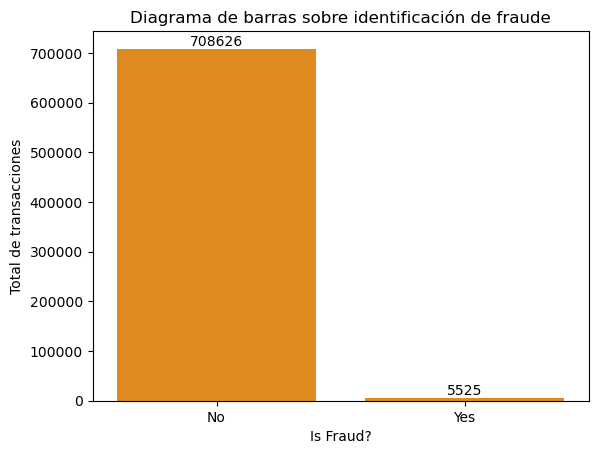

In [82]:
## Distribución del estado de la transacción

ax=sns.countplot(data=transaccional, x="Is Fraud?", color="#FF8C00")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Diagrama de barras sobre identificación de fraude")
plt.ylabel("Total de transacciones")
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/barras_import.png", dpi=300, bbox_inches='tight')
plt.show()

In [83]:
conteo_fecha = transaccional.groupby(['Date', 'Is Fraud?']).size().reset_index(name='frecuencia')
conteo_fecha.shape

(7217, 3)

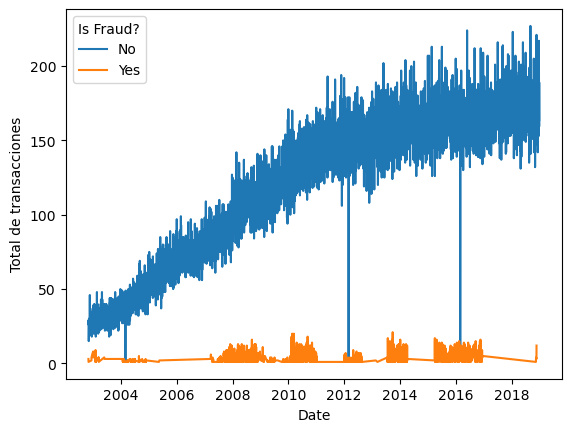

In [84]:
sns.lineplot(data=conteo_fecha, x="Date", y="frecuencia", hue="Is Fraud?")
plt.ylabel("Total de transacciones")
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/serie.png", dpi=300, bbox_inches='tight')
plt.show()

In [85]:
### 5 primeros días con menor cantidad de transacciones

conteo_fecha.groupby("Date", as_index=False)["frecuencia"].sum().sort_values(by="frecuencia").head(5)

,Date,frecuencia
484,2004-02-29,1
3405,2012-02-29,1
4866,2016-02-29,4
4,2002-11-06,15
271,2003-07-31,18


In [86]:
## 5 primeros días con mayor cantidad de transacciones fraudulentas

conteo_fecha[conteo_fecha["Is Fraud?"]=="Yes"].sort_values(by="frecuencia", ascending=False).head(5)

,Date,Is Fraud?,frecuencia
4874,2013-09-28,Yes,21
3203,2010-02-21,Yes,20
3241,2010-03-15,Yes,20
3532,2010-09-10,Yes,18
3189,2010-02-12,Yes,18


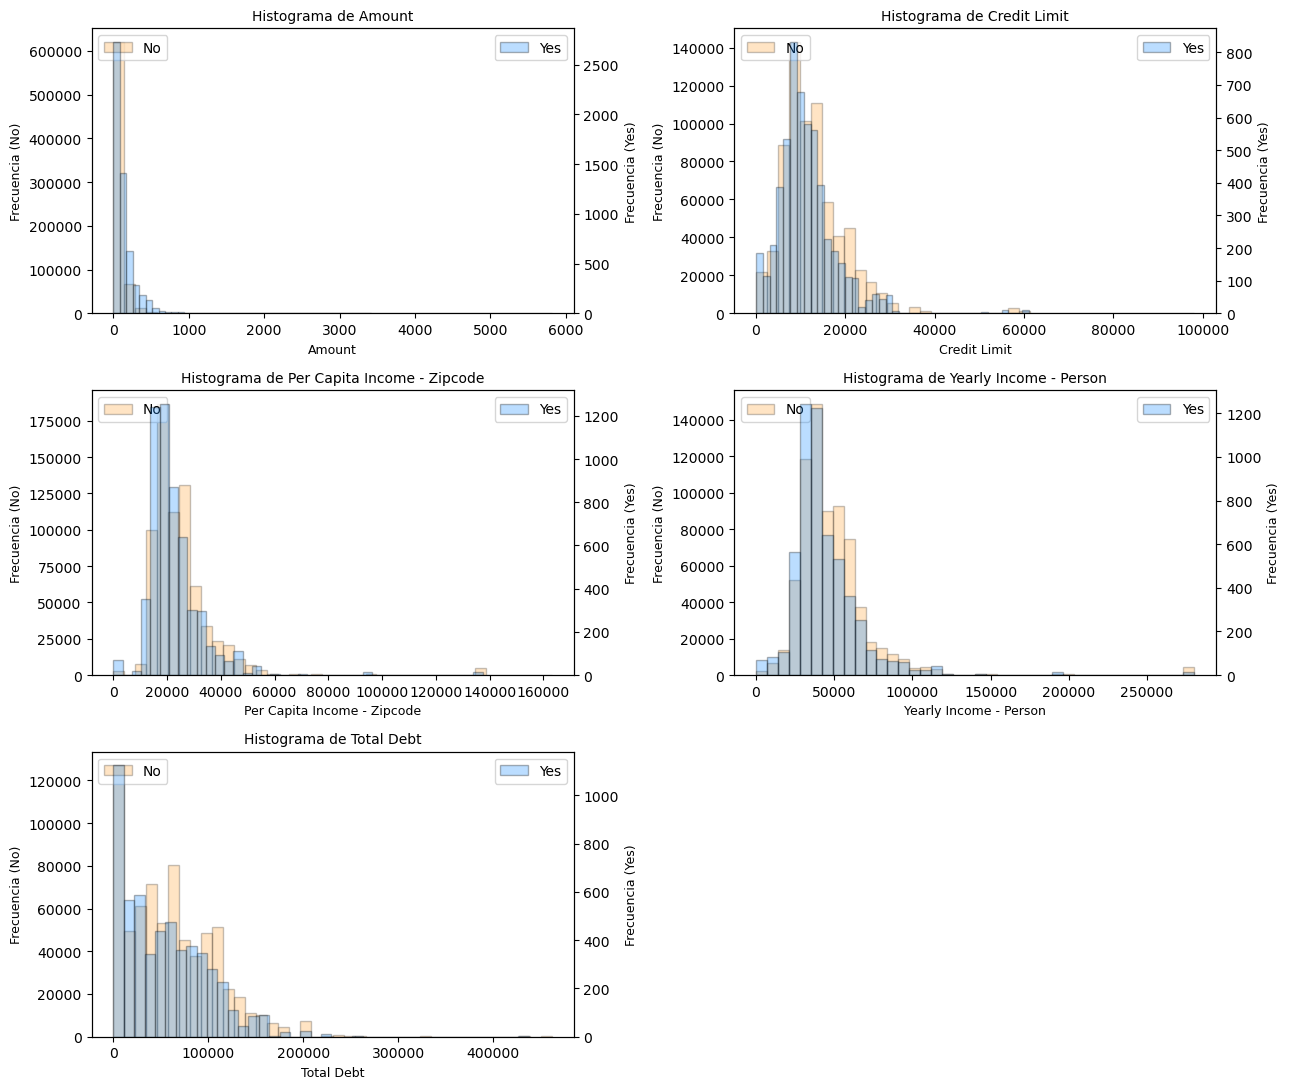

In [87]:
## Distribución de variables cualitativas

# Variables cuantitativas
var_cuanti = transaccional[["Amount", "Credit Limit", "Per Capita Income - Zipcode", "Yearly Income - Person", "Total Debt", "Is Fraud?"]]

# Parámetros para subplot
num_fila = 3
num_col = 2
num_histo = len(var_cuanti.columns) - 1  # -1 porque "Is Fraud?" es la variable hue

# Crear figura y ejes
fig, axes = plt.subplots(num_fila, num_col, figsize=(13,11))
eje_plano = axes.flatten()
cm = plt.get_cmap('gist_rainbow')

# Iterar columnas (excepto la de clase)
for i, (columna, ax) in enumerate(zip(var_cuanti.columns[:-1], eje_plano)):
    # Separar datos por clase
    data_no = var_cuanti[var_cuanti["Is Fraud?"] == "No"][columna]
    data_yes = var_cuanti[var_cuanti["Is Fraud?"] == "Yes"][columna]

    # Histograma clase No
    ax.hist(data_no, bins=40, alpha=0.23, color='#FF8C00', label='No', edgecolor='black')

    # Crear segundo eje Y (compartiendo X)
    ax2 = ax.twinx()

    # Histograma clase Yes
    ax2.hist(data_yes, bins=40, alpha=0.3, color="#1E90FF", label='Yes', edgecolor='black')

    # Títulos y etiquetas
    ax.set_title(f'Histograma de {columna}', fontsize=10)
    ax.set_xlabel(columna, fontsize=9)
    ax.set_ylabel("Frecuencia (No)", fontsize=9)
    ax2.set_ylabel("Frecuencia (Yes)", fontsize=9)

    # Leyendas
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Eliminar ejes sobrantes
if i < len(eje_plano) - 1:
    for j in range(i + 1, len(eje_plano)):
        fig.delaxes(eje_plano[j])

plt.tight_layout()
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/histogramas_fraude.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\2586174148.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=var_cuanti, x="Is Fraud?", y=columna, ax=ax,
C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\2586174148.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=var_cuanti, x="Is Fraud?", y=columna, ax=ax,
C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\2586174148.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=var_cuanti, x="Is Fraud?", y=columna, ax=ax,
C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\25861

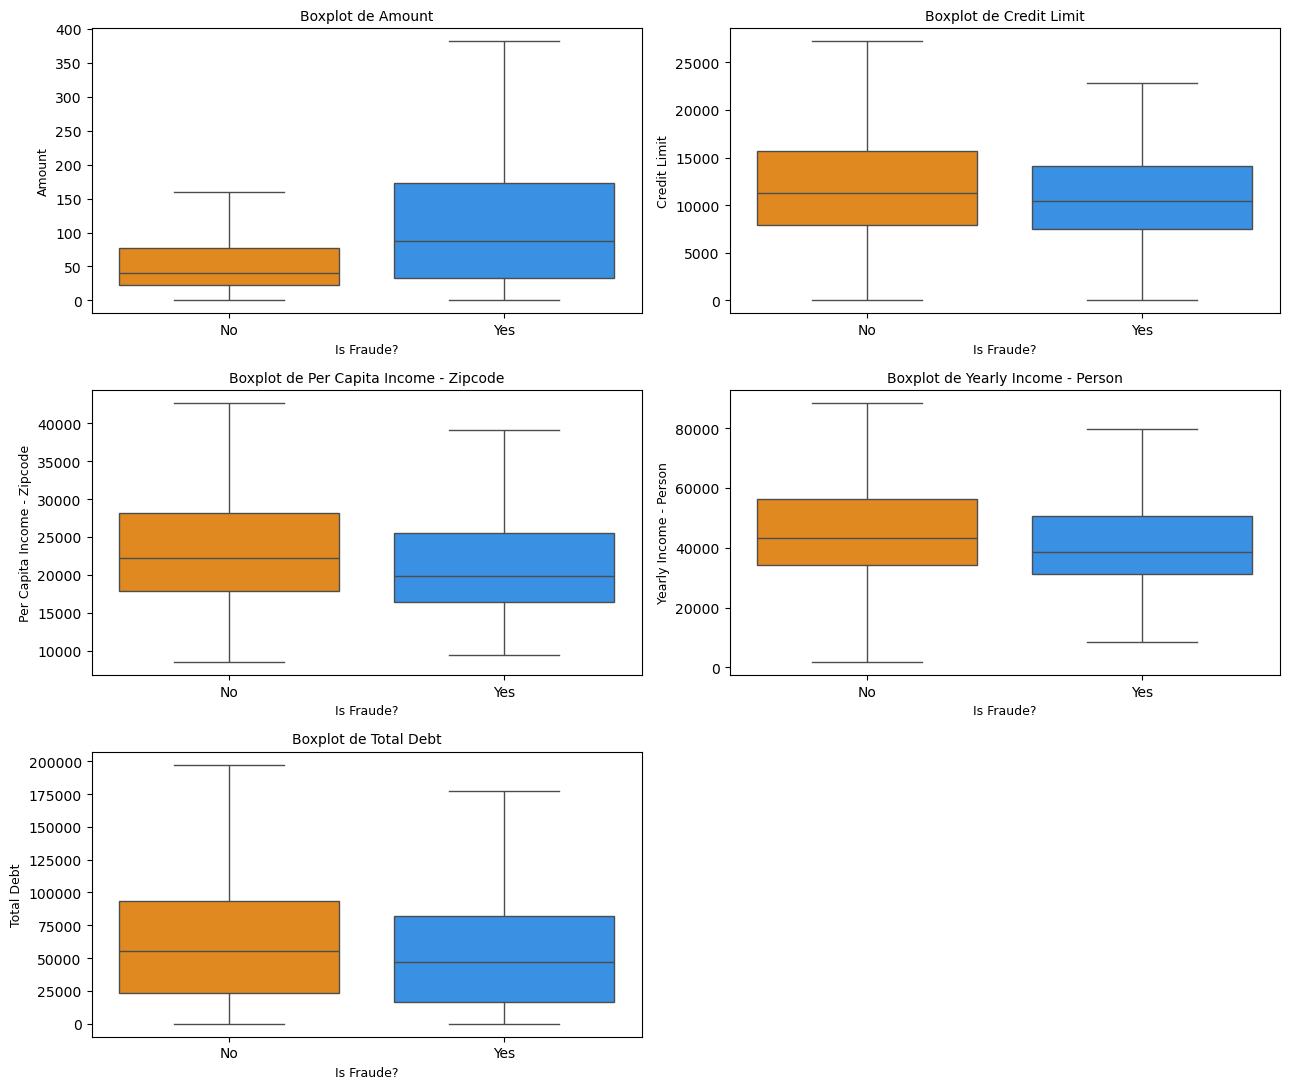

In [88]:
### Diagrama de cajas para comparar distribuciones


# Variables cuantitativas
var_cuanti = transaccional[["Amount", "Credit Limit", "Per Capita Income - Zipcode", 
                             "Yearly Income - Person", "Total Debt", "Is Fraud?"]]

# Parámetros para subplot
num_fila = 3
num_col = 2
num_box = len(var_cuanti.columns) - 1  # -1 porque "Is Fraud?" es la variable hue

# Crear figura y ejes
fig, axes = plt.subplots(num_fila, num_col, figsize=(13, 11))
eje_plano = axes.flatten()

# Iterar columnas (excepto la de clase)
for i, (columna, ax) in enumerate(zip(var_cuanti.columns[:-1], eje_plano)):
    sns.boxplot(data=var_cuanti, x="Is Fraud?", y=columna, ax=ax,
                palette={"No": "#FF8C00", "Yes": "#1E90FF"}, showfliers=False)
    ax.set_title(f'Boxplot de {columna}', fontsize=10)
    ax.set_xlabel("Is Fraude?", fontsize=9)
    ax.set_ylabel(columna, fontsize=9)

# Eliminar ejes sobrantes si los hay
if i < len(eje_plano) - 1:
    for j in range(i + 1, len(eje_plano)):
        fig.delaxes(eje_plano[j])

plt.tight_layout()
plt.show()


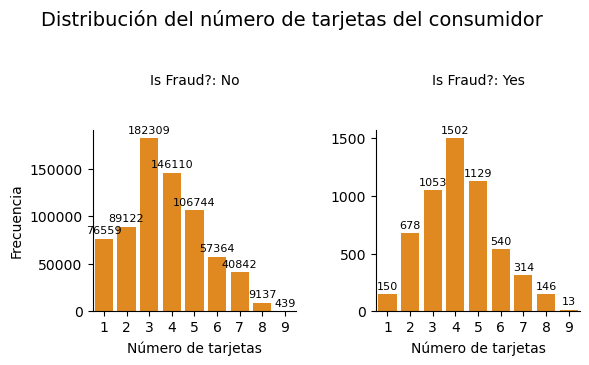

In [89]:


# Crear subgráficos separados por categoría de "Is Fraud?"
g = sns.FacetGrid(data=transaccional, col="Is Fraud?", sharey=False)
g.map_dataframe(sns.countplot, x="Num Credit Cards", color="#FF8C00")

# Ajustes estéticos
g.set_axis_labels("Número de tarjetas", "Frecuencia")
g.set_titles(col_template="Is Fraud?: {col_name}", y=1.2)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Distribución del número de tarjetas del consumidor ", fontsize=14,y= 1.2)
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=8, padding=2)
        
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/barras_fraude.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\1645666436.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/dispersion.png", dpi=300, bbox_inches='tight')
C:\Users\carlo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


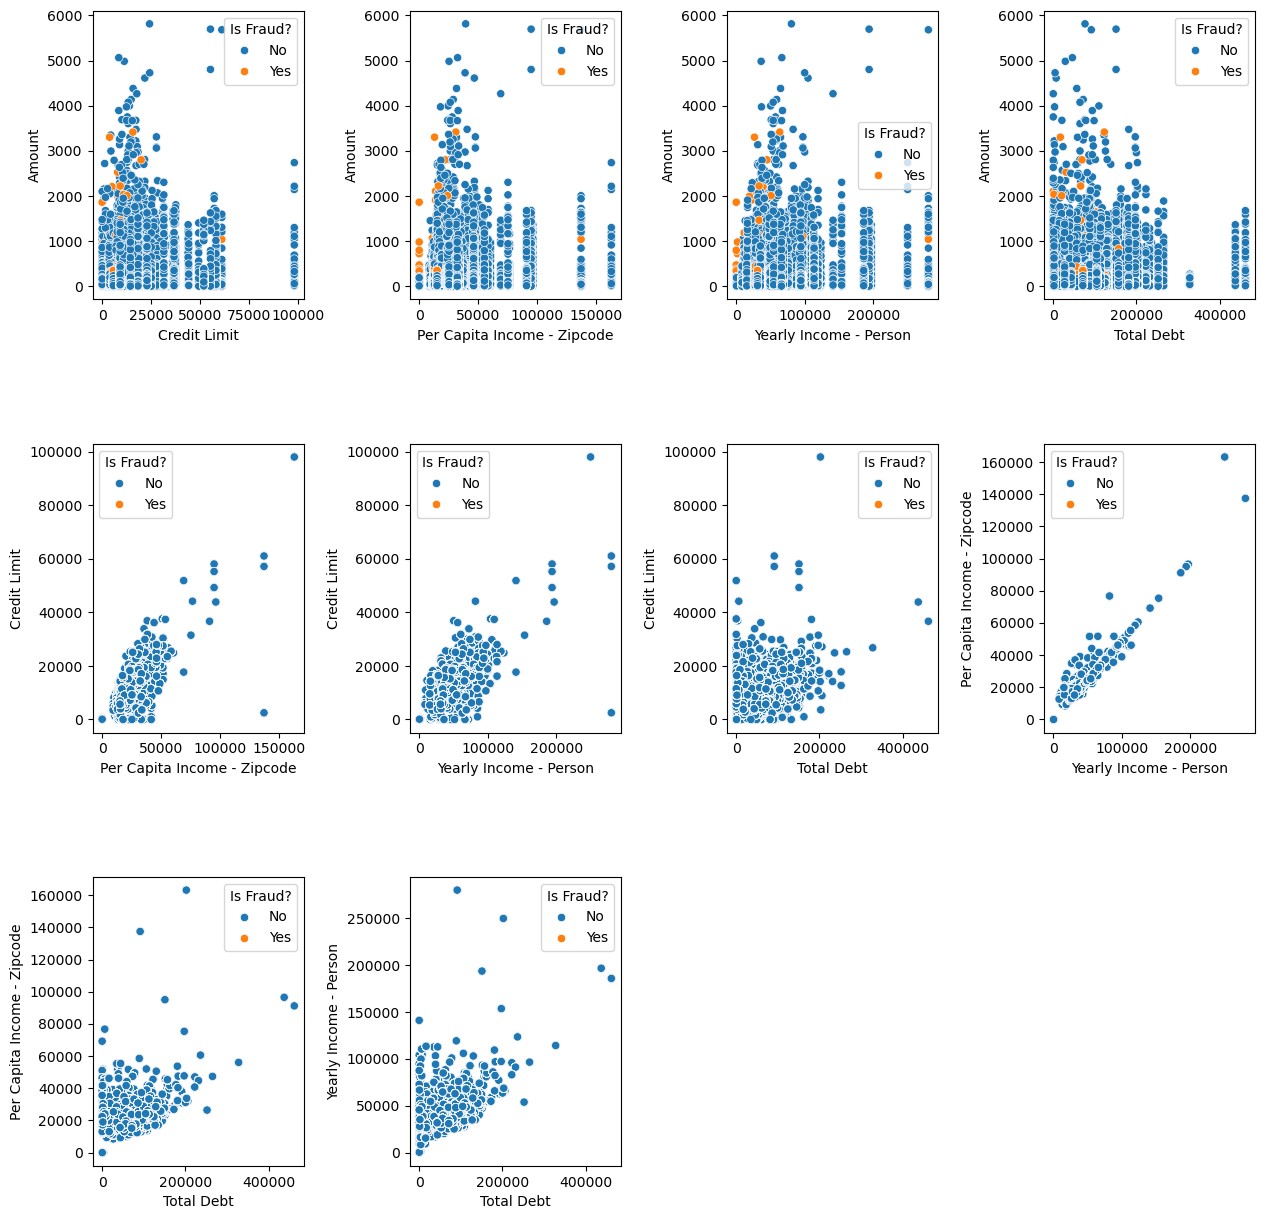

In [90]:
### Diagrama de dispersión entre pares de variables

var_cuanti_op2= transaccional[["Amount", "Credit Limit", "Per Capita Income - Zipcode", "Yearly Income - Person", "Total Debt", "Is Fraud?"]]

# Variables a graficar
variables = var_cuanti_op2.columns.tolist()
num_vars = len(variables)-1

# Calcular el número de filas y columnas para los subplots
num_cols = 4 # Número de columnas deseado
num_rows = math.ceil(num_vars * (num_vars - 1) / 2 / num_cols) # Calcular filas necesarias

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows)) # Ajusta figsize según tu necesidad
#fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,13)) # Ajusta figsize según tu necesidad

fig.subplots_adjust(wspace=0.5, hspace=0.5) # Ajusta espacio entre subplots

# Aplanar el array de axes para facilitar la iteración
axes = axes.flatten()

# Contador para el índice de los subplots
subplot_index = 0

# Iterar sobre las variables y crear los scatter plots
for i in range(num_vars):
    for j in range(num_vars):
        if i < j:
            sns.scatterplot(data=transaccional, x=transaccional[variables[j]], y=transaccional[variables[i]], ax=axes[subplot_index],hue="Is Fraud?")
            axes[subplot_index].set_xlabel(variables[j], fontsize=10)
            axes[subplot_index].set_ylabel(variables[i], fontsize=10)

            subplot_index += 1  # Incrementar el índice del subplot

# Ocultar los subplots que no se usan
for i in range(subplot_index, len(axes)):
    axes[i].remove()

plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/dispersion.png", dpi=300, bbox_inches='tight')

plt.show()

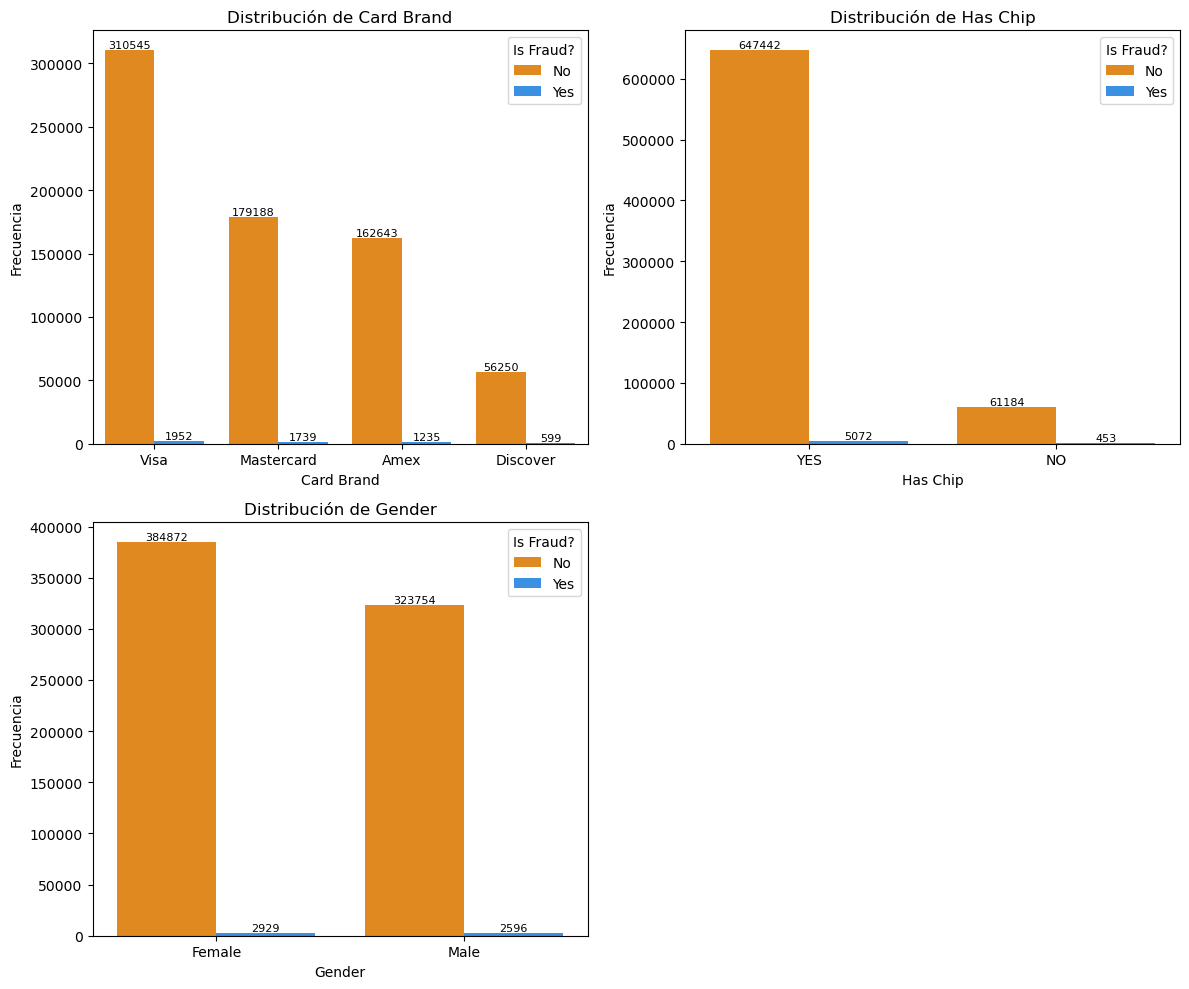

In [91]:
# Variables cualitativas
variables_cualitativas = ["Card Brand", "Has Chip", "Gender"]

# Colores personalizados para etiquetas de cada clase de Is Fraud?
colores_etiquetas = {
    'No': '#FF8C00',
    'Yes': '#1E90FF'
}

# Crear subplots (2 filas, 2 columnas, dejando la última celda vacía)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.flatten()  # Convertimos el arreglo de ejes en una lista para facilitar su acceso

# Ajustar para no usar la última celda
for i, var in enumerate(variables_cualitativas):
    ax = axes[i]
    
    # Dibujar gráfico con colores por categoría
    sns.countplot(data=transaccional, x=var, hue="Is Fraud?", ax=ax,
                  palette={'No': '#FF8C00', 'Yes': '#1E90FF'},  # colores de las barras
                  order=transaccional[var].value_counts().index)
    
    ax.set_title(f"Distribución de {var}", fontsize=12)
    ax.set_xlabel(var)
    ax.set_ylabel("Frecuencia")
    
    # Etiquetas personalizadas por categoría
    for container in ax.containers:
        # Recorrer cada barra dentro del contenedor
        for bar in container:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2
            # Obtener el color de la barra según la categoría de 'Is Fraud?'
            label_color = 'green' if bar.get_label() == 'No' else 'red'  # Si es 'No' o 'Yes'
            
            # Colocar la etiqueta encima de la barra
            ax.text(x, height, f'{int(height)}', ha='center', va='bottom',
                    fontsize=8)

# Ocultar el gráfico vacío (la última celda en la malla 2x2)
axes[3].axis('off')

plt.tight_layout()
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/cualita.png", dpi=300, bbox_inches='tight')
plt.show()

In [92]:
## Frecuencias absolutas de la variable "Card Brand"
transaccional["Card Brand"].value_counts()

Card Brand
Visa          312497
Mastercard    180927
Amex          163878
Discover       56849
Name: count, dtype: int64

In [93]:
## Frecuencias absolutas de la variable "Has Chip"
transaccional["Has Chip"].value_counts()

Has Chip
YES    652514
NO      61637
Name: count, dtype: int64

In [94]:
## Frecuencias absolutas de la variable "Gender"

transaccional["Gender"].value_counts()

Gender
Female    387801
Male      326350
Name: count, dtype: int64

## 5. Creación de nuevas características y selección de variables

In [96]:
## Creando la variable edad para ver si influye en la identificación de transacciones fraudulentas

transaccional_new=transaccional.copy()
transaccional_new["Age in years"]=((transaccional_new["Date"]-transaccional_new["Birth"]).dt.days)/365.25
transaccional_new.head(10)

,Month,Time,Amount,MCC,Is Fraud?,Date,Card Brand,Has Chip,Credit Limit,Acct Open Date,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase,Age in years
0,1,1900-01-01 20:20:00,204.23,4899,No,2003-01-12,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.20
1,1,1900-01-01 19:56:00,57.25,7349,No,2003-01-28,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.24
2,1,1900-01-01 20:10:00,201.99,4899,No,2003-01-29,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.24
3,1,1900-01-01 16:33:00,393.20,5732,No,2003-01-31,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.25
4,2,1900-01-01 17:44:00,7.84,5815,No,2003-02-09,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.27
5,2,1900-01-01 20:27:00,118.71,4899,No,2003-02-20,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.30
6,2,1900-01-01 08:52:00,140.00,4722,No,2003-02-24,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.31
7,2,1900-01-01 23:22:00,87.81,4722,No,2003-02-27,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.32
8,3,1900-01-01 17:36:00,9.65,5815,No,2003-03-13,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.36
9,3,1900-01-01 19:25:00,599.77,6300,No,2003-03-15,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.37


In [97]:
transaccional_new["Account_age"]=(transaccional_new["Date"]-transaccional_new["Acct Open Date"]).dt.days.astype(float)

In [98]:
## Construyendo la variable momento del día

transaccional_new["hour"]=transaccional_new["Time"].dt.hour

def momento(hora):
    if (hora >= 6) & (hora<12):
        return "Morning"
    elif (hora>=12) & (hora<19):
        return "Afternoon"
    else:
        return "Night"
        
transaccional_new["Time of day"]= transaccional_new['hour'].apply(momento)

In [99]:
## Construyendo variable para el día de la semana

transaccional_new['Weekday'] = transaccional_new['Date'].dt.day_name()
transaccional_new.head(5)

,Month,Time,Amount,MCC,Is Fraud?,Date,Card Brand,Has Chip,Credit Limit,Acct Open Date,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase,Age in years,Account_age,hour,Time of day,Weekday
0,1,1900-01-01 20:20:00,204.23,4899,No,2003-01-12,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.20,11.00,20,Night,Sunday
1,1,1900-01-01 19:56:00,57.25,7349,No,2003-01-28,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.24,27.00,19,Night,Tuesday
2,1,1900-01-01 20:10:00,201.99,4899,No,2003-01-29,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.24,28.00,20,Night,Wednesday
3,1,1900-01-01 16:33:00,393.20,5732,No,2003-01-31,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.25,30.00,16,Afternoon,Friday
4,2,1900-01-01 17:44:00,7.84,5815,No,2003-02-09,Visa,NO,12400.00,2003-01-01,Female,CA,29278.00,59696.00,127613.00,5,1966-11-01,157.25,36.27,39.00,17,Afternoon,Sunday


In [100]:
### Construyendo la variable de categoría de comercio general

transaccional_new["MCC_2"]=transaccional_new["MCC"].astype(int)
def comercio(codigo):
    if (codigo>=100) & (codigo<=699):
        return "Reserved"
    elif (codigo>=700) & (codigo<=999):
        return "Agricultural Services"
    elif (codigo>=1000) & (codigo<=1499):
        return "Reserved"
    elif (codigo>=1500) & (codigo<=2999):
        return "Contracted Services"
    elif (codigo>=3000) & (codigo<=3999):
        return "Reserved for private use"
    elif (codigo>=4000) & (codigo<=4799):
        return "transportation"
    elif (codigo>=4800) & (codigo<=4999):
        return "Utilities"
    elif (codigo>=5000) & (codigo<=5599):
        return "Retail outlets"
    elif (codigo>=5600) & (codigo<=5699):
        return "Clothing outlets"
    elif (codigo>=5700) & (codigo<=5999):
        return "Miscellaneous outlets"
    elif (codigo>=6000) & (codigo<=7299):
        return "Service providers"
    elif (codigo>=7300) & (codigo<=7529):
        return "Business services"
    elif (codigo>=7530) & (codigo<=7799):
        return "Repair services"
    elif (codigo>=7800) & (codigo<=7999):
        return "Amusement and entertainment"
    elif (codigo>=8000) & (codigo<=8999):
        return "Professional services and membership organizations"
    elif (codigo>=9000) & (codigo<=9199):
        return "Reserved for ISO use"
    elif (codigo>=9200) & (codigo<=9402):
        return "Government services"
    else:
        return "Reserved"
        
transaccional_new["General merchant category"]= transaccional_new['MCC_2'].apply(comercio)

In [101]:
### Crear variable de región geográfica

Northeast=["CT", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
Midwest=["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
South=["AL", "AR","DE", "DC","FL", "GA", "KY", "LA", "MD","MS", "NC","OK", "SC", "TN", "TX", "VA", "WV"]
West=["AK", "AZ", "CA", "CO","HI","ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]

### Crear variable de división geográfica

New_England=["CT", "ME", "MA", "NH", "RI", "VT"]
Middle_Atlantic=["NJ","NY", "PA"]
East_North_Central=["IL", "IN","MI", "OH", "WI"]
West_North_Central=["IA", "KS", "MN", "MO", "NE", "ND","SD"]
South_Atlantic=["DE", "DC", "FL", "GA", "MD", "NC", "SC", "VA","WV"]
East_South_Central=["AL", "KY", "MS", "TN"]
West_South_Central=["AR", "LA", "OK", "TX"]
Mountain=["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY"]
Pacific=["AK","CA","HI", "OR", "WA"]

In [102]:
def region(geo):
    if geo in Northeast:
        return "Northeast"
    elif geo in Midwest:
        return "Midwest"
    elif geo in South:
        return "South"
    else:
        return "West"

transaccional_new["Region"]= transaccional_new['State'].apply(region)

In [103]:
def division(div):
    if div in New_England:
        return "New England"
    elif div in Middle_Atlantic:
        return "Middle Atlantic"
    elif div in East_North_Central:
        return "East North Central"
    elif div in West_North_Central:
        return "West North Central"
    elif div in South_Atlantic:
        return "South_Atlantic"
    elif div in East_South_Central:
        return "East_South_Central"
    elif div in West_South_Central:
        return "West_South_Central"
    elif div in Mountain:
        return "Mountain"
    else:
        return "Pacific"

transaccional_new["Division"]= transaccional_new['State'].apply(division)

In [104]:
len(transaccional_new["State"].unique())

50

In [105]:
transaccional_new.describe()

,Month,Time,Amount,Date,Credit Limit,Acct Open Date,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase,Age in years,Account_age,hour,MCC_2
count,714151.00,714151,714151.00,714151,714151.00,714151,714151.00,714151.00,714151.00,714151.00,714151,714151.00,714151.00,714151.00,714151.00,714151.00
mean,6.58,1900-01-01 12:45:08.481147136,72.82,2012-09-01 12:56:47.420559104,12790.41,2006-10-08 06:33:59.558580736,24911.03,48383.32,60706.94,3.71,1965-12-26 20:15:10.294881664,72.82,46.68,2155.27,12.26,4982.68
min,1.00,1900-01-01 00:00:00,0.00,2002-11-02 00:00:00,0.00,1991-01-01 00:00:00,0.00,2.00,0.00,1.00,1918-05-01 00:00:00,12.35,18.16,-480.00,0.00,3000.00
25%,4.00,1900-01-01 09:05:00,23.42,2009-09-04 00:00:00,7900.00,2004-04-01 00:00:00,17817.00,34330.00,23359.00,3.00,1959-06-01 00:00:00,42.35,35.32,869.00,9.00,4784.00
50%,7.00,1900-01-01 12:46:00,40.21,2013-02-07 00:00:00,11300.00,2006-11-01 00:00:00,22247.00,43021.00,55566.00,4.00,1968-11-01 00:00:00,59.14,44.28,1883.00,12.00,4784.00
75%,10.00,1900-01-01 16:21:00,78.69,2016-02-10 00:00:00,15700.00,2009-09-01 00:00:00,28126.00,56163.00,93255.00,5.00,1977-01-01 00:00:00,95.20,54.21,3143.00,16.00,4900.00
max,12.00,1900-01-01 23:59:00,5813.78,2018-12-31 00:00:00,98100.00,2019-06-01 00:00:00,163145.00,280199.00,461854.00,9.00,1998-11-01 00:00:00,337.90,100.66,10224.00,23.00,9402.00
std,3.45,NaN,109.56,NaN,7665.98,NaN,13161.10,27117.94,47583.11,1.69,NaN,45.27,15.85,1567.03,5.29,817.64


In [106]:
transaccional_new[transaccional_new["Is Fraud?"]=="Yes"].describe()

,Month,Time,Amount,Date,Credit Limit,Acct Open Date,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase,Age in years,Account_age,hour,MCC_2
count,5525.00,5525,5525.00,5525,5525.00,5525,5525.00,5525.00,5525.00,5525.00,5525,5525.00,5525.00,5525.00,5525.00,5525.00
mean,6.64,1900-01-01 11:27:38.237103872,137.83,2011-12-13 00:50:18.135746560,11381.76,2006-06-23 23:50:21.393665152,22381.71,43639.76,53342.97,4.17,1963-10-20 01:37:12.977375552,102.77,48.15,1998.04,10.98,5194.60
min,1.00,1900-01-01 00:00:00,0.00,2002-11-02 00:00:00,0.00,1992-12-01 00:00:00,0.00,2.00,0.00,1.00,1918-05-01 00:00:00,13.60,18.25,0.00,0.00,3000.00
25%,4.00,1900-01-01 09:00:00,32.67,2008-10-23 00:00:00,7500.00,2004-03-01 00:00:00,16453.00,31175.00,16870.00,3.00,1953-12-01 00:00:00,71.42,36.20,838.00,9.00,4829.00
50%,7.00,1900-01-01 11:24:00,87.13,2010-12-09 00:00:00,10400.00,2006-09-01 00:00:00,19853.00,38692.00,47153.00,4.00,1967-02-01 00:00:00,97.42,46.10,1715.00,11.00,5310.00
75%,10.00,1900-01-01 14:01:00,172.33,2015-07-05 00:00:00,14100.00,2009-05-01 00:00:00,25537.00,50666.00,81716.00,5.00,1975-05-01 00:00:00,124.74,57.85,2865.00,14.00,5719.00
max,12.00,1900-01-01 23:59:00,3416.64,2018-11-24 00:00:00,61100.00,2016-06-01 00:00:00,137428.00,280199.00,437533.00,9.00,1995-12-01 00:00:00,337.90,95.35,8312.00,23.00,9402.00
std,3.43,NaN,193.13,NaN,6622.27,NaN,10688.92,22821.68,44468.81,1.58,NaN,49.08,15.67,1483.97,3.97,962.31


In [107]:
transaccional_new[transaccional_new["Is Fraud?"]=="No"].describe()

,Month,Time,Amount,Date,Credit Limit,Acct Open Date,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Num Credit Cards,Birth,Average_purchase,Age in years,Account_age,hour,MCC_2
count,708626.00,708626,708626.00,708626,708626.00,708626,708626.00,708626.00,708626.00,708626.00,708626,708626.00,708626.00,708626.00,708626.00,708626.00
mean,6.58,1900-01-01 12:45:44.738071552,72.31,2012-09-03 14:15:15.035011328,12801.40,2006-10-09 02:27:14.398964224,24930.76,48420.31,60764.35,3.71,1966-01-02 01:43:19.332228912,72.59,46.67,2156.49,12.27,4981.03
min,1.00,1900-01-01 00:00:00,0.00,2002-11-02 00:00:00,0.00,1991-01-01 00:00:00,0.00,2.00,0.00,1.00,1918-05-01 00:00:00,12.35,18.16,-480.00,0.00,4121.00
25%,4.00,1900-01-01 09:05:00,23.40,2009-09-06 00:00:00,7900.00,2004-04-01 00:00:00,17817.00,34361.00,23392.00,3.00,1959-07-01 00:00:00,42.17,35.31,869.00,9.00,4784.00
50%,7.00,1900-01-01 12:48:00,40.08,2013-02-09 00:00:00,11300.00,2006-11-01 00:00:00,22247.00,43133.00,55566.00,4.00,1968-11-01 00:00:00,59.03,44.27,1884.00,12.00,4784.00
75%,10.00,1900-01-01 16:22:00,77.75,2016-02-14 00:00:00,15700.00,2009-09-01 00:00:00,28126.00,56163.00,93367.00,5.00,1977-01-01 00:00:00,94.97,54.18,3145.00,16.00,4900.00
max,12.00,1900-01-01 23:59:00,5813.78,2018-12-31 00:00:00,98100.00,2019-06-01 00:00:00,163145.00,280199.00,461854.00,9.00,1998-11-01 00:00:00,337.90,100.66,10224.00,23.00,7996.00
std,3.45,NaN,108.50,NaN,7672.55,NaN,13176.66,27145.52,47602.14,1.69,NaN,45.16,15.85,1567.60,5.29,816.20


[]

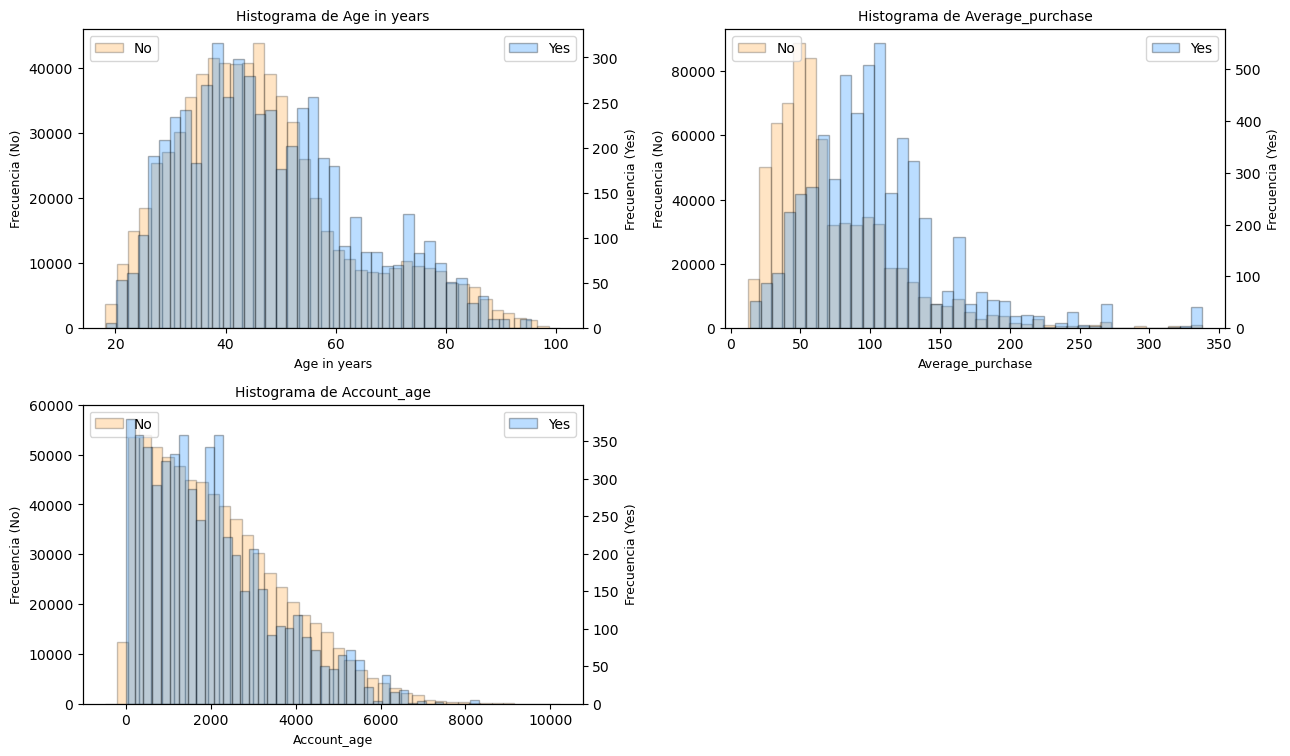

In [108]:
## Distribución de variables cualitativas

# Variables cuantitativas
var_cuanti = transaccional_new[["Age in years", "Average_purchase","Account_age","Is Fraud?"]]

# Parámetros para subplot
num_fila = 3
num_col = 2
num_histo = len(var_cuanti.columns) - 1  # -1 porque "Is Fraud?" es la variable hue

# Crear figura y ejes
fig, axes = plt.subplots(num_fila, num_col, figsize=(13,11))
eje_plano = axes.flatten()
cm = plt.get_cmap('gist_rainbow')

# Iterar columnas (excepto la de clase)
for i, (columna, ax) in enumerate(zip(var_cuanti.columns[:-1], eje_plano)):
    # Separar datos por clase
    data_no = var_cuanti[var_cuanti["Is Fraud?"] == "No"][columna]
    data_yes = var_cuanti[var_cuanti["Is Fraud?"] == "Yes"][columna]

    # Histograma clase No
    ax.hist(data_no, bins=40, alpha=0.23, color='#FF8C00', label='No', edgecolor='black')

    # Crear segundo eje Y (compartiendo X)
    ax2 = ax.twinx()

    # Histograma clase Yes
    ax2.hist(data_yes, bins=40, alpha=0.3, color="#1E90FF", label='Yes', edgecolor='black')

    # Títulos y etiquetas
    ax.set_title(f'Histograma de {columna}', fontsize=10)
    ax.set_xlabel(columna, fontsize=9)
    ax.set_ylabel("Frecuencia (No)", fontsize=9)
    ax2.set_ylabel("Frecuencia (Yes)", fontsize=9)

    # Leyendas
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Eliminar ejes sobrantes
if i < len(eje_plano) - 1:
    for j in range(i + 1, len(eje_plano)):
        fig.delaxes(eje_plano[j])

plt.tight_layout()
plt.plot()

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\3740821650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=var_cuanti_2, x="Is Fraud?", y=columna, ax=ax,
C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\3740821650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=var_cuanti_2, x="Is Fraud?", y=columna, ax=ax,
C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\3740821650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=var_cuanti_2, x="Is Fraud?", y=columna, ax=ax,


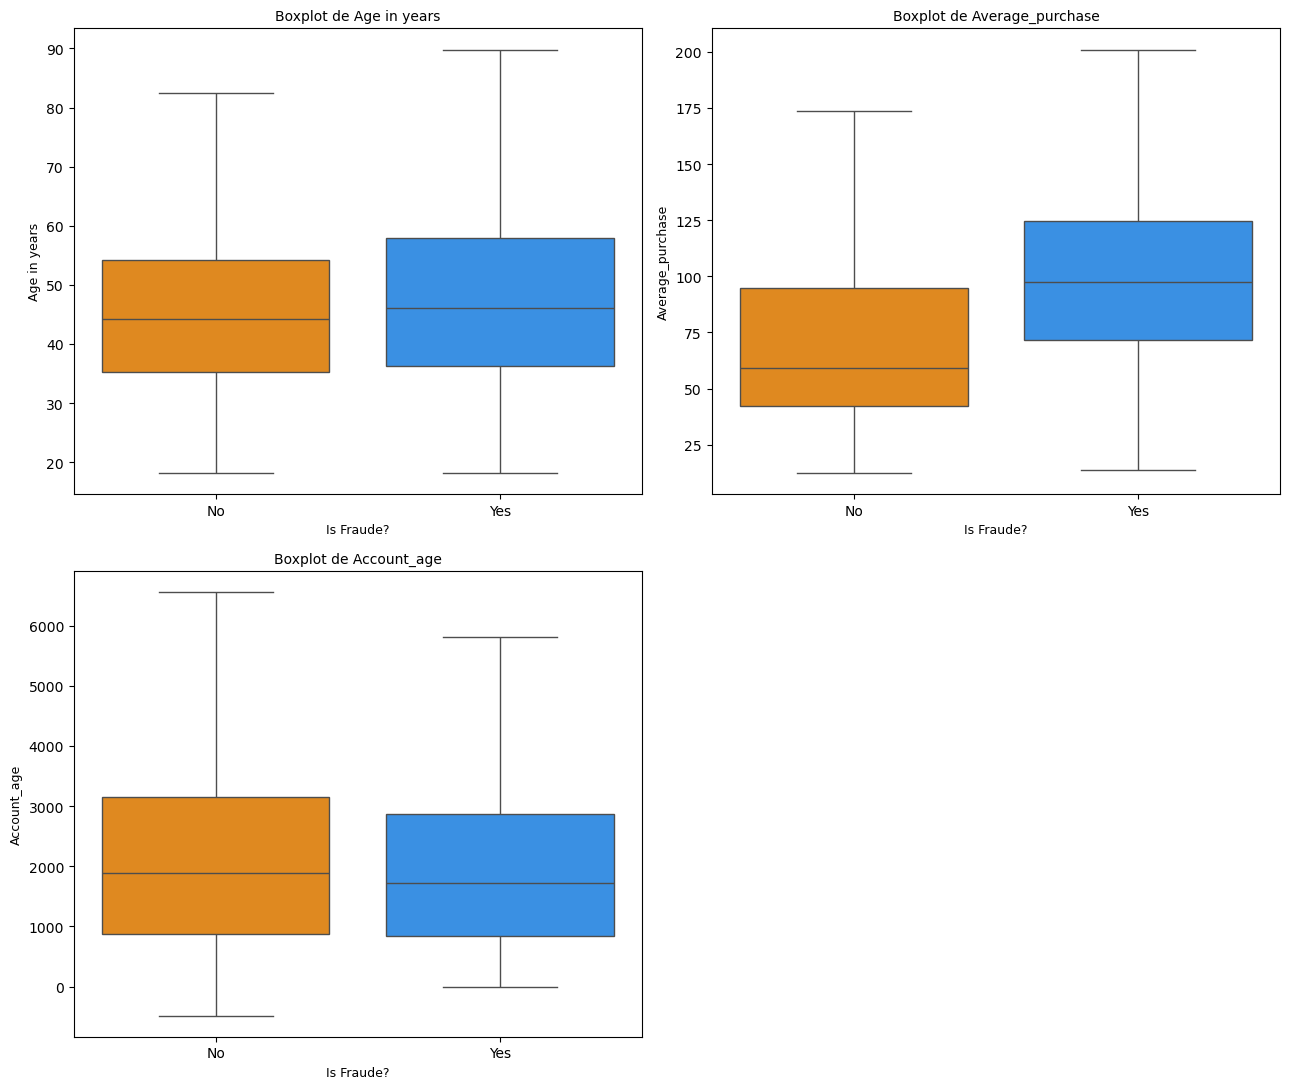

In [109]:
### Diagrama de cajas para comparar distribuciones


# Variables cuantitativas
var_cuanti_2 = transaccional_new[["Age in years","Average_purchase","Account_age","Is Fraud?"]]

# Parámetros para subplot
num_fila = 2
num_col = 2
num_box = len(var_cuanti_2.columns) - 1  # -1 porque "Is Fraud?" es la variable hue

# Crear figura y ejes
fig, axes = plt.subplots(num_fila, num_col, figsize=(13, 11))
eje_plano = axes.flatten()

# Iterar columnas (excepto la de clase)
for i, (columna, ax) in enumerate(zip(var_cuanti_2.columns[:-1], eje_plano)):
    sns.boxplot(data=var_cuanti_2, x="Is Fraud?", y=columna, ax=ax,
                palette={"No": "#FF8C00", "Yes": "#1E90FF"}, showfliers=False)
    ax.set_title(f'Boxplot de {columna}', fontsize=10)
    ax.set_xlabel("Is Fraude?", fontsize=9)
    ax.set_ylabel(columna, fontsize=9)

# Eliminar ejes sobrantes si los hay
if i < len(eje_plano) - 1:
    for j in range(i + 1, len(eje_plano)):
        fig.delaxes(eje_plano[j])

plt.tight_layout()
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/Cajas.png", dpi=300, bbox_inches='tight')
plt.show()

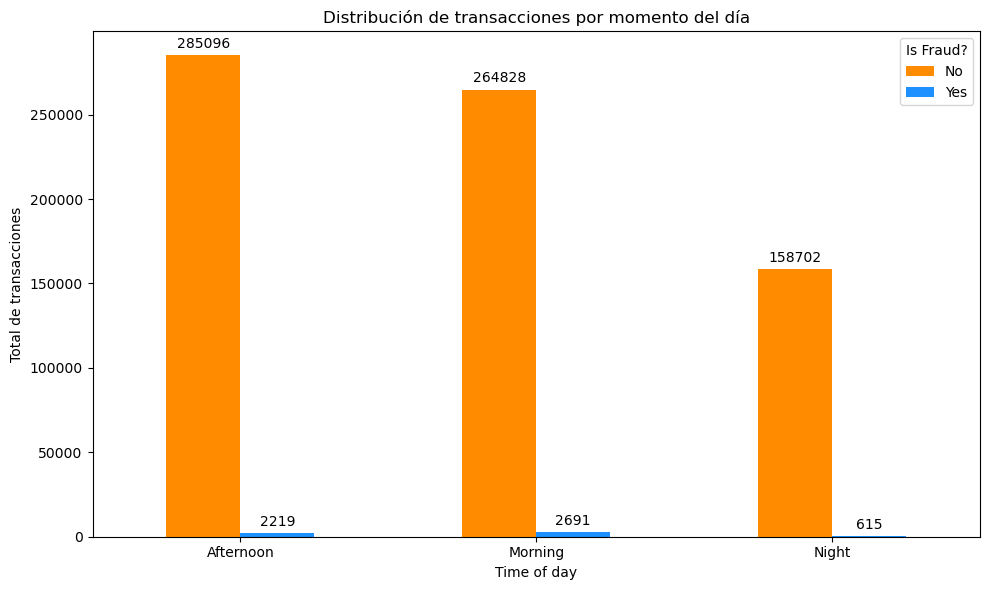

In [110]:
tabla = transaccional_new.groupby(['Time of day', 'Is Fraud?']).size().unstack()

colores_barras = ['#FF8C00', '#1E90FF']  # Asegúrate que el orden coincide con tabla.columns

# Crear el gráfico
ax = tabla.plot(kind='bar', figsize=(10,6),color=colores_barras)

# Título y etiquetas
plt.title('Distribución de transacciones por momento del día')
plt.xlabel('Time of day')
plt.ylabel('Total de transacciones')
plt.xticks(rotation=0)
plt.legend(title='Is Fraud?')

# Añadir etiquetas encima de cada barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        xy=(bar.get_x() + bar.get_width() / 2, height), 
                        xytext=(0, 3),  # Separación vertical
                        textcoords="offset points",
                        ha='center', va='bottom')  
plt.tight_layout()
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/Timeofday.png", dpi=300, bbox_inches='tight')

plt.show()

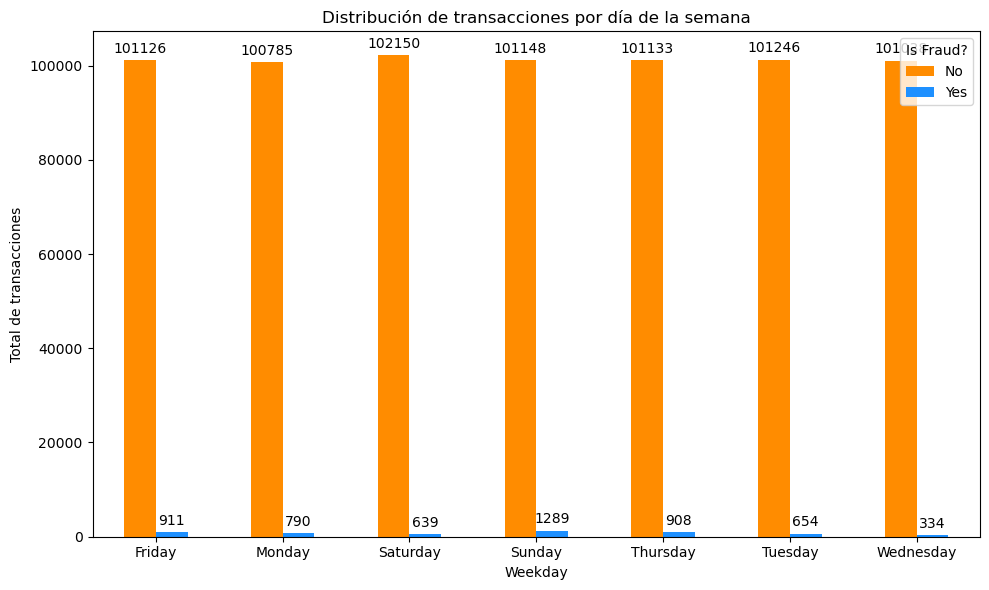

In [111]:
# Suponiendo que ya tienes esta tabla
tabla = transaccional_new.groupby(['Weekday', 'Is Fraud?']).size().unstack()

# Colores personalizados para las columnas: 'No' en verde, 'Yes' en rojo
colores_barras = ['#FF8C00', '#1E90FF']  # Asegúrate que el orden coincide con tabla.columns

# Crear el gráfico con colores personalizados
ax = tabla.plot(kind='bar', figsize=(10,6), color=colores_barras)

# Título y etiquetas
plt.title('Distribución de transacciones por día de la semana')
plt.xlabel('Weekday')
plt.ylabel('Total de transacciones')
plt.xticks(rotation=0)
plt.legend(title='Is Fraud?')

# Añadir etiquetas encima de cada barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

plt.tight_layout()
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/weekday.png", dpi=300, bbox_inches='tight')
plt.show()


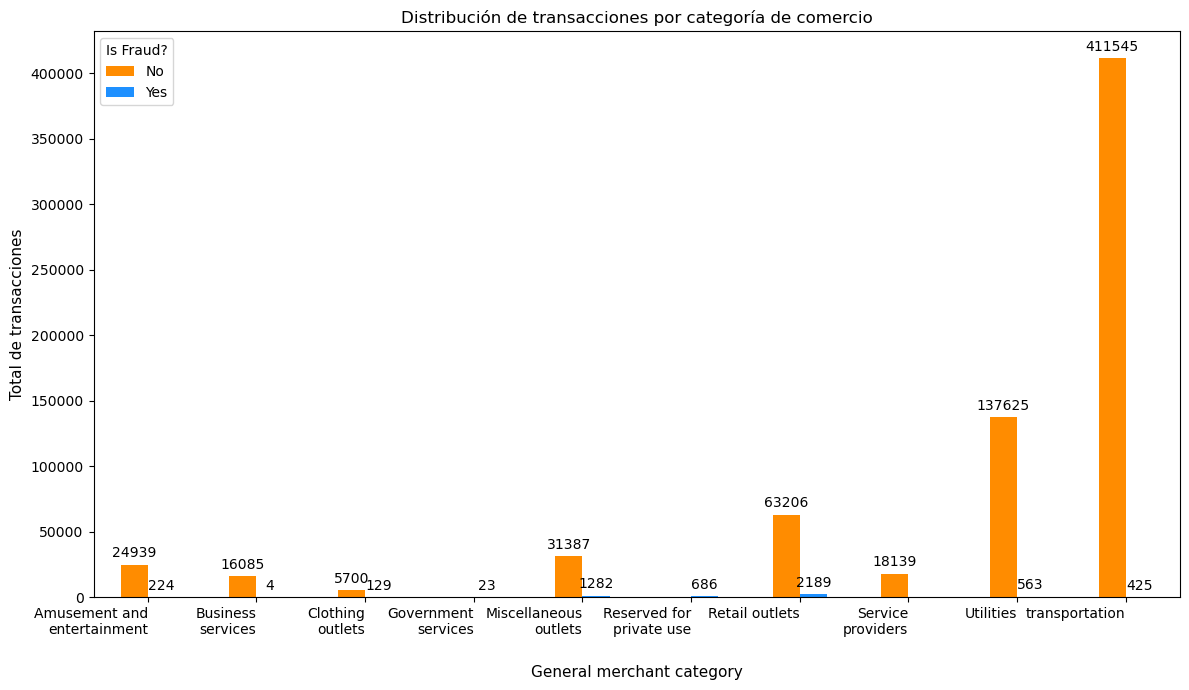

In [112]:
# Suponiendo que ya tienes esta tabla
tabla = transaccional_new.groupby(['General merchant category', 'Is Fraud?']).size().unstack()

# Colores personalizados para las columnas: 'No' en verde, 'Yes' en rojo
colores_barras = ['#FF8C00', '#1E90FF']  # Asegúrate que el orden coincide con tabla.columns

# Crear el gráfico con colores personalizados
ax = tabla.plot(kind='bar', figsize=(12,7), color=colores_barras)

# Ajustar etiquetas del eje X (envolver texto y rotar)
labels = [textwrap.fill(str(label), 14) for label in tabla.index]
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Título y etiquetas
plt.title('Distribución de transacciones por categoría de comercio')
plt.xlabel('General merchant category',labelpad=20, fontsize=11)
plt.ylabel('Total de transacciones',fontsize=11)
plt.xticks(rotation=0)
plt.legend(title='Is Fraud?')

# Añadir etiquetas encima de cada barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

plt.tight_layout()
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/comercio_MCC.png", dpi=300, bbox_inches='tight')
plt.show()

In [113]:
tabla = transaccional_new.groupby(['General merchant category', 'Is Fraud?']).size().unstack()
tabla

Is Fraud?,No,Yes
General merchant category,,
Amusement and entertainment,24939.00,224.00
Business services,16085.00,4.00
Clothing outlets,5700.00,129.00
Government services,NaN,23.00
Miscellaneous outlets,31387.00,1282.00
Reserved for private use,NaN,686.00
Retail outlets,63206.00,2189.00
Service providers,18139.00,NaN
Utilities,137625.00,563.00


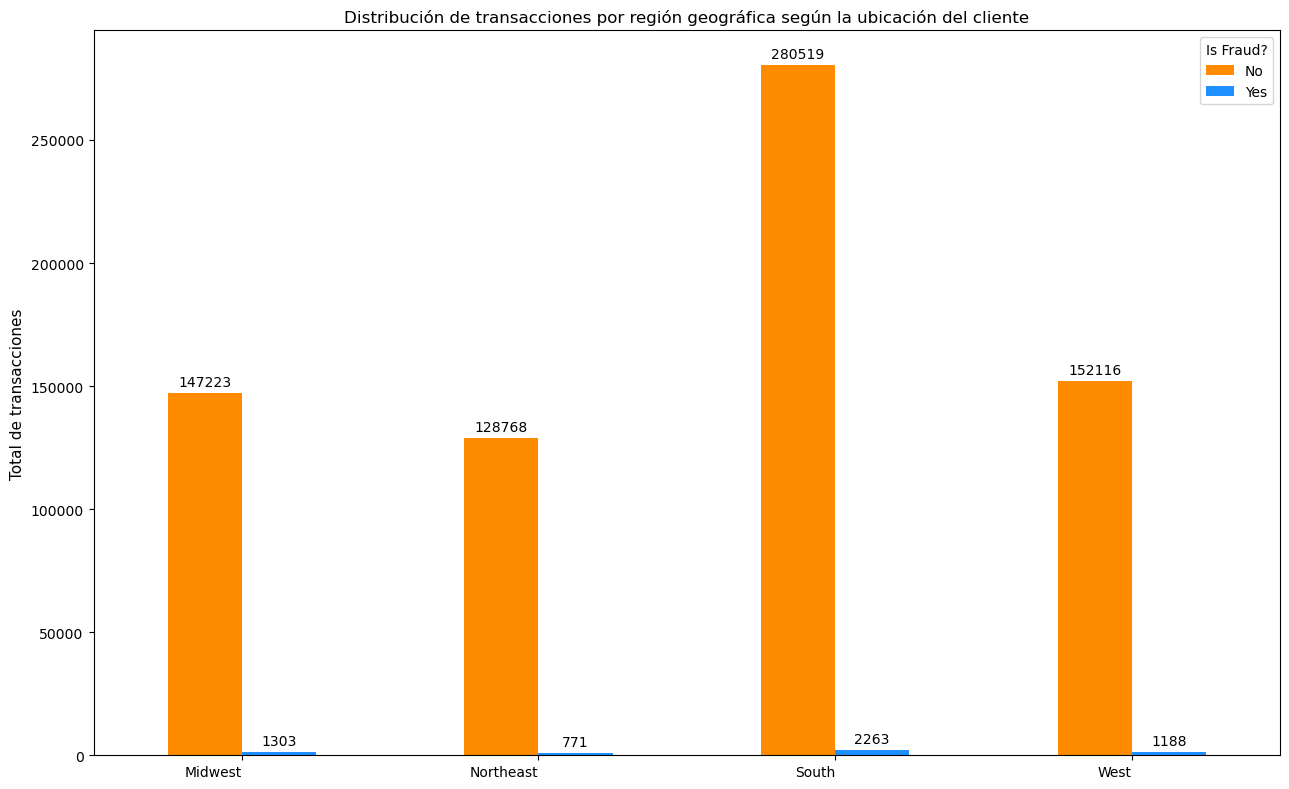

In [114]:
# Suponiendo que ya tienes esta tabla
tabla = transaccional_new.groupby(['Region', 'Is Fraud?']).size().unstack()

# Colores personalizados para las columnas: 'No' en verde, 'Yes' en rojo
colores_barras = ['#FF8C00', '#1E90FF']  # Asegúrate que el orden coincide con tabla.columns

# Crear el gráfico con colores personalizados
ax = tabla.plot(kind='bar', figsize=(13,8), color=colores_barras)

# Ajustar etiquetas del eje X (envolver texto y rotar)
labels = [textwrap.fill(str(label), 14) for label in tabla.index]
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Título y etiquetas
plt.title('Distribución de transacciones por región geográfica según la ubicación del cliente')
plt.xlabel('',labelpad=20, fontsize=11)
plt.ylabel('Total de transacciones',fontsize=11)
plt.xticks(rotation=0)
plt.legend(title='Is Fraud?')

# Añadir etiquetas encima de cada barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()

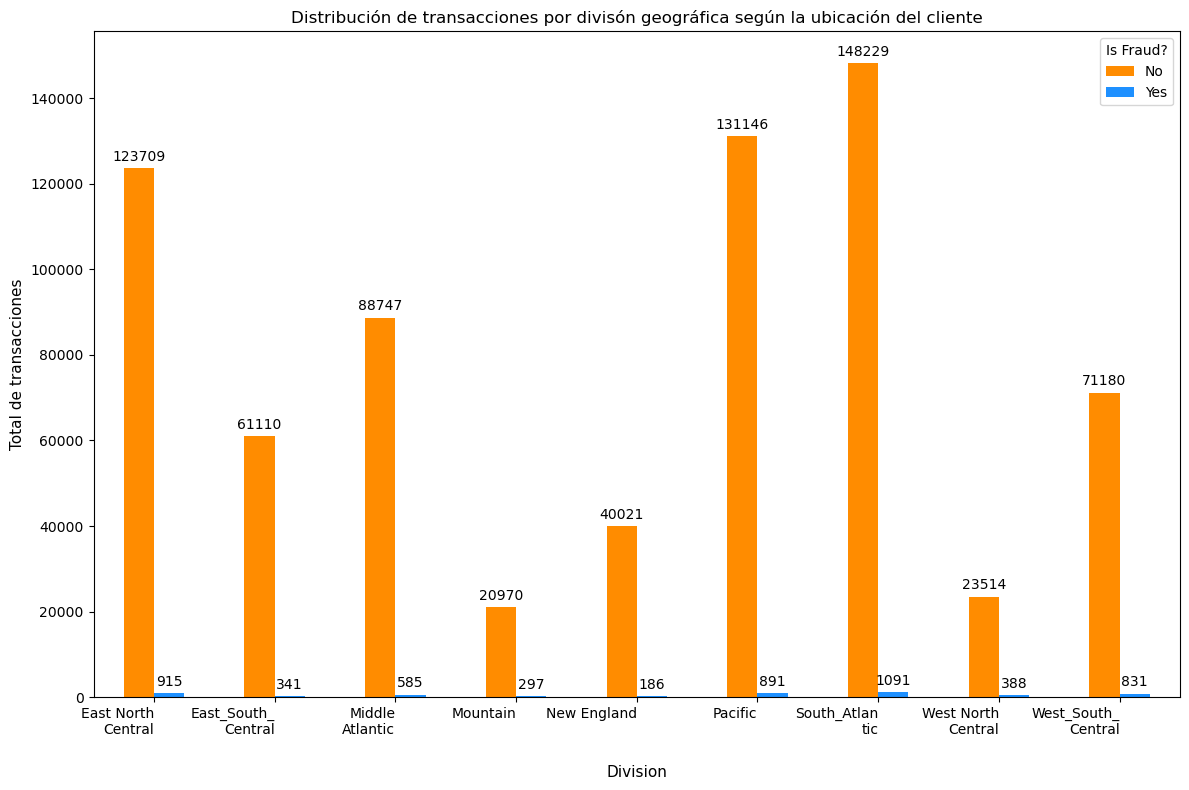

In [115]:
# Suponiendo que ya tienes esta tabla
tabla = transaccional_new.groupby(['Division', 'Is Fraud?']).size().unstack()

# Colores personalizados para las columnas: 'No' en verde, 'Yes' en rojo
colores_barras = ['#FF8C00', '#1E90FF']  # Asegúrate que el orden coincide con tabla.columns

# Crear el gráfico con colores personalizados
ax = tabla.plot(kind='bar', figsize=(12,8), color=colores_barras)

# Ajustar etiquetas del eje X (envolver texto y rotar)
labels = [textwrap.fill(str(label), 11) for label in tabla.index]
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)

# Título y etiquetas
plt.title('Distribución de transacciones por divisón geográfica según la ubicación del cliente')
plt.xlabel('Division',labelpad=20, fontsize=11)
plt.ylabel('Total de transacciones',fontsize=11)
plt.xticks(rotation=0)
plt.legend(title='Is Fraud?')

# Añadir etiquetas encima de cada barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [116]:
transaccional_new.dtypes

Month                                   int64
Time                           datetime64[ns]
Amount                                float64
MCC                                    object
Is Fraud?                              object
Date                           datetime64[ns]
Card Brand                             object
Has Chip                               object
Credit Limit                          float64
Acct Open Date                 datetime64[ns]
Gender                                 object
State                                  object
Per Capita Income - Zipcode           float64
Yearly Income - Person                float64
Total Debt                            float64
Num Credit Cards                        int64
Birth                          datetime64[ns]
Average_purchase                      float64
Age in years                          float64
Account_age                           float64
hour                                    int32
Time of day                       

In [117]:
transaccional_final=transaccional_new.copy()
transaccional_final=transaccional_final.drop(["Month","Time", "MCC", "Has Chip","Date", "State", "Num Credit Cards", "Birth", "hour", "MCC_2", "Region", "Division","Gender", "Card Brand"], axis=1)
transaccional_final.head(10)

,Amount,Is Fraud?,Credit Limit,Acct Open Date,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Average_purchase,Age in years,Account_age,Time of day,Weekday,General merchant category
0,204.23,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.20,11.00,Night,Sunday,Utilities
1,57.25,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.24,27.00,Night,Tuesday,Business services
2,201.99,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.24,28.00,Night,Wednesday,Utilities
3,393.20,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.25,30.00,Afternoon,Friday,Miscellaneous outlets
4,7.84,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.27,39.00,Afternoon,Sunday,Miscellaneous outlets
5,118.71,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.30,50.00,Night,Thursday,Utilities
6,140.00,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.31,54.00,Morning,Monday,transportation
7,87.81,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.32,57.00,Night,Thursday,transportation
8,9.65,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.36,71.00,Afternoon,Thursday,Miscellaneous outlets
9,599.77,No,12400.00,2003-01-01,29278.00,59696.00,127613.00,157.25,36.37,73.00,Night,Saturday,Service providers


In [118]:
transaccional_final.shape

(714151, 13)

## 6. Modelado

In [120]:
var_cuanti_op3= transaccional_final[["Amount", "Credit Limit", "Per Capita Income - Zipcode", "Yearly Income - Person", "Total Debt", "Age in years", "Account_age", "Average_purchase"]]
var_cuanti_op3

,Amount,Credit Limit,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,Age in years,Account_age,Average_purchase
0,204.23,12400.00,29278.00,59696.00,127613.00,36.20,11.00,157.25
1,57.25,12400.00,29278.00,59696.00,127613.00,36.24,27.00,157.25
2,201.99,12400.00,29278.00,59696.00,127613.00,36.24,28.00,157.25
3,393.20,12400.00,29278.00,59696.00,127613.00,36.25,30.00,157.25
4,7.84,12400.00,29278.00,59696.00,127613.00,36.27,39.00,157.25
...,...,...,...,...,...,...,...,...
808926,36.95,14400.00,32325.00,65909.00,181261.00,20.16,606.00,59.58
808927,20.22,14400.00,32325.00,65909.00,181261.00,20.16,607.00,59.58
808928,58.71,14400.00,32325.00,65909.00,181261.00,20.16,608.00,59.58
808929,46.29,14400.00,32325.00,65909.00,181261.00,20.16,608.00,59.58


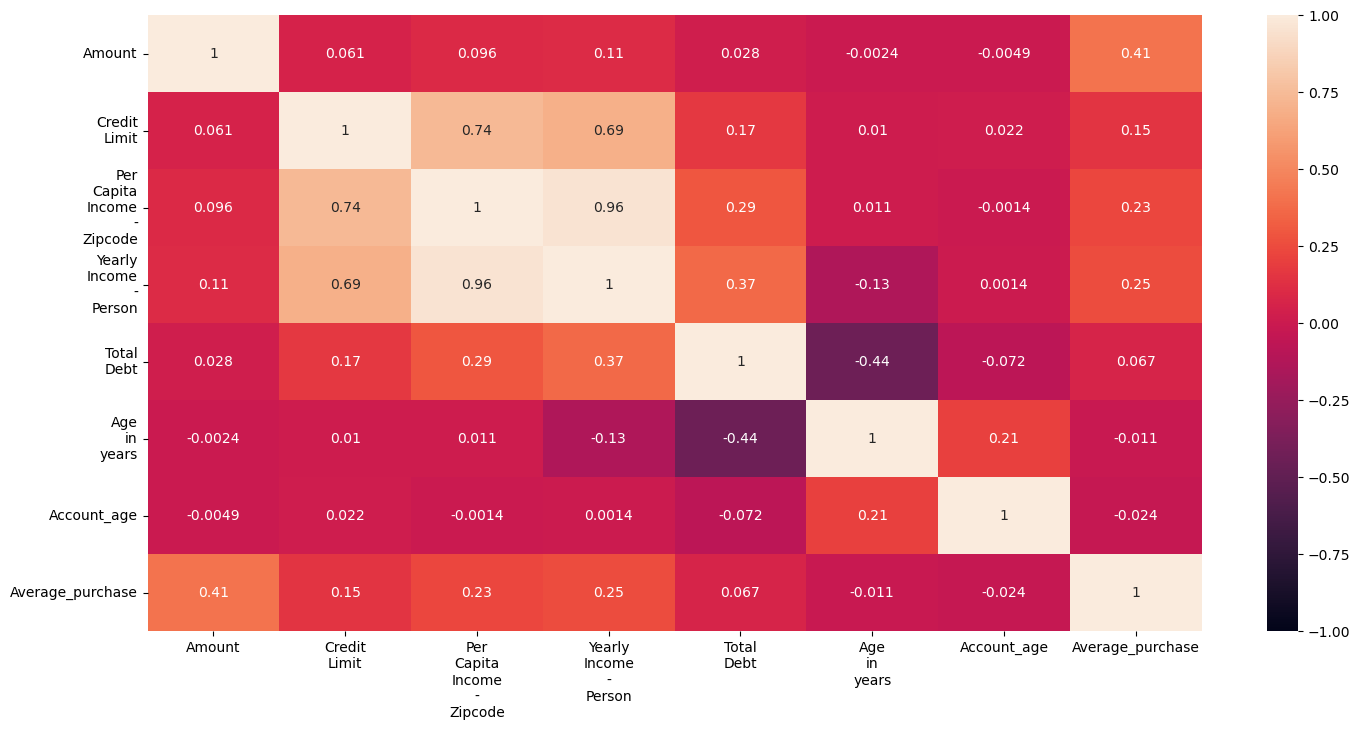

In [121]:
## Matriz de correlaciones

plt.figure(figsize=(17,8))
sns.heatmap(var_cuanti_op3.corr(), vmin=-1, vmax=1, annot=True)
# Ajustar las etiquetas para que se muestren en múltiples líneas
plt.xticks(rotation=0, ha='center')  # Ajusta las etiquetas del eje X
plt.yticks(rotation=0, va='center')  # Ajusta las etiquetas del eje 
# Ajusta las etiquetas de los ejes
plt.gca().set_xticklabels([label.get_text().replace(' ', '\n') for label in plt.gca().get_xticklabels()])
plt.gca().set_yticklabels([label.get_text().replace(' ', '\n') for label in plt.gca().get_yticklabels()])
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/Matriz_correlaciones.png",dpi=300,bbox_inches='tight')
plt.show()

In [122]:
transaccional_final=transaccional_final.drop(["Per Capita Income - Zipcode", "Acct Open Date"],axis=1)
transaccional_final

,Amount,Is Fraud?,Credit Limit,Yearly Income - Person,Total Debt,Average_purchase,Age in years,Account_age,Time of day,Weekday,General merchant category
0,204.23,No,12400.00,59696.00,127613.00,157.25,36.20,11.00,Night,Sunday,Utilities
1,57.25,No,12400.00,59696.00,127613.00,157.25,36.24,27.00,Night,Tuesday,Business services
2,201.99,No,12400.00,59696.00,127613.00,157.25,36.24,28.00,Night,Wednesday,Utilities
3,393.20,No,12400.00,59696.00,127613.00,157.25,36.25,30.00,Afternoon,Friday,Miscellaneous outlets
4,7.84,No,12400.00,59696.00,127613.00,157.25,36.27,39.00,Afternoon,Sunday,Miscellaneous outlets
...,...,...,...,...,...,...,...,...,...,...,...
808926,36.95,No,14400.00,65909.00,181261.00,59.58,20.16,606.00,Night,Friday,transportation
808927,20.22,No,14400.00,65909.00,181261.00,59.58,20.16,607.00,Morning,Saturday,transportation
808928,58.71,No,14400.00,65909.00,181261.00,59.58,20.16,608.00,Morning,Sunday,transportation
808929,46.29,No,14400.00,65909.00,181261.00,59.58,20.16,608.00,Night,Sunday,transportation


### 6.1 Obtención del conjunto de datos de entrenamiento, validación y prueba

In [124]:
### División del conjunto de datos para obtener el conjunto de entrenamiento y prueba

Data_train, Data_test=train_test_split(transaccional_final, test_size=0.2, train_size=0.8,stratify=transaccional_final["Is Fraud?"],random_state=15)

In [125]:
Data_train.shape

(571320, 11)

In [126]:
## Cantidad de transacciones fraudulentas y no fraudulentas del conjunto de datos de entrenamiento incial.

Data_train["Is Fraud?"].value_counts()

Is Fraud?
No     566900
Yes      4420
Name: count, dtype: int64

In [127]:
Data_test.shape

(142831, 11)

In [128]:
## Cantidad de transacciones fraudulentas y no fraudulentas del conjunto de datos de prueba

Data_test["Is Fraud?"].value_counts()

Is Fraud?
No     141726
Yes      1105
Name: count, dtype: int64

In [129]:
Data_test.reset_index(drop=True, inplace=True)
Data_test.head(5)

,Amount,Is Fraud?,Credit Limit,Yearly Income - Person,Total Debt,Average_purchase,Age in years,Account_age,Time of day,Weekday,General merchant category
0,19.90,No,14800.00,39700.00,59062.00,24.23,39.33,2130.00,Afternoon,Thursday,transportation
1,8.79,No,10300.00,40516.00,6908.00,85.81,59.76,3930.00,Night,Sunday,Miscellaneous outlets
2,30.94,No,6500.00,31170.00,33165.00,51.76,26.82,24.00,Night,Sunday,transportation
3,27.13,No,22400.00,68010.00,0.00,33.34,78.56,2487.00,Afternoon,Thursday,transportation
4,7.85,No,11200.00,41790.00,24676.00,63.71,61.82,237.00,Morning,Monday,transportation


In [130]:
print("Dimensiones del conjunto de datos de entrenamiento",Data_train.shape)
print("Dimensiones del conjunto de datos de prueba",Data_test.shape)

Dimensiones del conjunto de datos de entrenamiento (571320, 11)
Dimensiones del conjunto de datos de prueba (142831, 11)


In [131]:
### División del conjunto de datos de entrenamiento inicial, para obtener el conjunto de datos de validación

Data_train_final, Data_val=train_test_split(Data_train, test_size=0.2,train_size=0.8,stratify=Data_train["Is Fraud?"],random_state=15)

In [132]:
## Cantidad de transacciones fraudulentas y no fraudulentas del conjunto de datos de entrenamiento final

Data_train_final["Is Fraud?"].value_counts()

Is Fraud?
No     453520
Yes      3536
Name: count, dtype: int64

In [133]:
Data_train_final.reset_index(drop="True",inplace=True)
Data_train_final.head(5)

,Amount,Is Fraud?,Credit Limit,Yearly Income - Person,Total Debt,Average_purchase,Age in years,Account_age,Time of day,Weekday,General merchant category
0,22.89,No,36200.00,56102.00,59198.00,42.35,55.78,2565.00,Night,Tuesday,Miscellaneous outlets
1,495.00,No,15800.00,56542.00,9097.00,138.66,58.98,1455.00,Night,Friday,transportation
2,27.19,No,5700.00,27861.00,108313.00,29.36,47.36,2477.00,Afternoon,Monday,transportation
3,77.06,No,6900.00,28007.00,0.00,71.80,29.87,2752.00,Night,Wednesday,Utilities
4,131.92,No,6900.00,30605.00,16549.00,88.61,57.27,3294.00,Afternoon,Sunday,Service providers


In [134]:
## Cantidad de transacciones fraudulentas y no fraudulentas del conjunto de datos de validación final

Data_val["Is Fraud?"].value_counts()

Is Fraud?
No     113380
Yes       884
Name: count, dtype: int64

In [135]:
Data_val.reset_index(drop="True",inplace=True)
Data_val.head(5)

,Amount,Is Fraud?,Credit Limit,Yearly Income - Person,Total Debt,Average_purchase,Age in years,Account_age,Time of day,Weekday,General merchant category
0,44.62,No,8800.00,45852.00,114746.00,55.53,51.60,2474.00,Night,Sunday,transportation
1,44.14,No,17400.00,63439.00,199706.00,60.69,53.31,1269.00,Morning,Tuesday,transportation
2,51.56,No,14900.00,36843.00,52248.00,56.29,33.01,368.00,Afternoon,Thursday,transportation
3,31.44,No,12900.00,57185.00,0.00,198.92,28.21,1082.00,Night,Monday,Utilities
4,30.70,No,12400.00,53287.00,51026.00,42.17,43.41,1671.00,Morning,Thursday,transportation


In [136]:
print("Dimensiones del conjunto de datos de entrenamiento",Data_train_final.shape)
print("Dimensiones del conjunto de datos de validación",Data_val.shape)
print("Dimensiones del conjunto de datos de prueba", Data_test.shape)

Dimensiones del conjunto de datos de entrenamiento (457056, 11)
Dimensiones del conjunto de datos de validación (114264, 11)
Dimensiones del conjunto de datos de prueba (142831, 11)


In [137]:
### Almacenando en local el conjunto de datos de entrenamiento, prueba y validación

train="C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Modelos/Datos/Dataset_train.csv"
test="C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Modelos/Datos/Dataset_test.csv"
val="C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Modelos/Datos/Dataset_val.csv"

Data_train_final.to_csv(train,index=False)
Data_test.to_csv(test,index=False)
Data_val.to_csv(val,index=False)

### 6.2 Codificación de variables cualitativas y estandarización de variables cuantitativas

#### 6.2.1 Codificación de variables cualitativas

##### 6.2.1.1 Conjunto de datos de entrenamiento

In [141]:
#Data_train_copia=Data_train_final.copy()

## Inicializando el encoder
encoder= OneHotEncoder(sparse_output=False,handle_unknown='ignore')

column_categorica = Data_train_final.select_dtypes(include=['object']).columns.tolist()

## Excluir columna Is Fraud
if 'Is Fraud?' in column_categorica:
    column_categorica.remove('Is Fraud?')
    
## asignando variables a codificar
encoder.fit(Data_train_final[column_categorica])

## Transformar el conjunto de entrenamiento
cod_one_hot=encoder.transform(Data_train_final[column_categorica])

## Creando dataset con variables codificadas
code_train=pd.DataFrame(cod_one_hot, columns=encoder.get_feature_names_out(column_categorica),index=Data_train_final.index)

## Concatenando el dataset original
train_codificado_cua=pd.concat([Data_train_final.reset_index(drop=True), code_train.reset_index(drop=True)], axis=1)

## Eliminar columnas categoricas codificadas
train_codificado_cua=train_codificado_cua.drop(column_categorica,axis=1)

print("Dimensiones del conjunto de entrenamiento, después de codificar las variables cualitativas:",train_codificado_cua.shape)
train_codificado_cua.head(5)

Dimensiones del conjunto de entrenamiento, después de codificar las variables cualitativas: (457056, 28)


,Amount,Is Fraud?,Credit Limit,Yearly Income - Person,Total Debt,Average_purchase,Age in years,Account_age,Time of day_Afternoon,Time of day_Morning,Time of day_Night,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,General merchant category_Amusement and entertainment,General merchant category_Business services,General merchant category_Clothing outlets,General merchant category_Government services,General merchant category_Miscellaneous outlets,General merchant category_Reserved for private use,General merchant category_Retail outlets,General merchant category_Service providers,General merchant category_Utilities,General merchant category_transportation
0,22.89,No,36200.00,56102.00,59198.00,42.35,55.78,2565.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,495.00,No,15800.00,56542.00,9097.00,138.66,58.98,1455.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,27.19,No,5700.00,27861.00,108313.00,29.36,47.36,2477.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,77.06,No,6900.00,28007.00,0.00,71.80,29.87,2752.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,131.92,No,6900.00,30605.00,16549.00,88.61,57.27,3294.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


##### 6.2.1.2 Conjunto de datos de validación

In [143]:
### Codificando conjunto de validación

## Transformando las variables cualitativas siguiendo la codificación del conjunto de datos de entrenamiento

code_one_val=encoder.transform(Data_val[column_categorica])

## Crear dataframe para las columnas codificadas
code_val=pd.DataFrame(code_one_val, columns=encoder.get_feature_names_out(column_categorica),index=Data_val.index)

## Concatenar los conjuntos de datos
val_codificado_cua=pd.concat([Data_val.reset_index(drop=True), code_val.reset_index(drop=True)],axis=1)

val_codificado_cua=val_codificado_cua.drop(column_categorica,axis=1)
print("Dimensiones del conjunto de validación, después de codificar las variables cualitativas:",val_codificado_cua.shape)
val_codificado_cua.head(5)

Dimensiones del conjunto de validación, después de codificar las variables cualitativas: (114264, 28)


,Amount,Is Fraud?,Credit Limit,Yearly Income - Person,Total Debt,Average_purchase,Age in years,Account_age,Time of day_Afternoon,Time of day_Morning,Time of day_Night,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,General merchant category_Amusement and entertainment,General merchant category_Business services,General merchant category_Clothing outlets,General merchant category_Government services,General merchant category_Miscellaneous outlets,General merchant category_Reserved for private use,General merchant category_Retail outlets,General merchant category_Service providers,General merchant category_Utilities,General merchant category_transportation
0,44.62,No,8800.00,45852.00,114746.00,55.53,51.60,2474.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,44.14,No,17400.00,63439.00,199706.00,60.69,53.31,1269.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,51.56,No,14900.00,36843.00,52248.00,56.29,33.01,368.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,31.44,No,12900.00,57185.00,0.00,198.92,28.21,1082.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,30.70,No,12400.00,53287.00,51026.00,42.17,43.41,1671.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


##### 6.2.1.3 Conjunto de datos de prueba

In [145]:
#code_one_test=encoder.transform(Data_test[column_categorica])

#code_test=pd.DataFrame(code_one_test, columns=encoder.get_feature_names_out(column_categorica),index=Data_test.index)

#test_codificado_cua=pd.concat([Data_test.reset_index(drop=True), code_test.reset_index(drop=True)],axis=1)

#test_codificado_cua=test_codificado_cua.drop(column_categorica,axis=1)

#print("Dimensiones del conjunto de prueba, después de estandarizar las variables cuantitativas:",test_codificado_cua.shape)
#test_codificado_cua.head(5)


# 1. Eliminar primero las columnas categóricas del test
Data_test_sin_cat = Data_test.drop(columns=column_categorica)

# 2. Codificar usando el mismo encoder ya entrenado
code_one_test = encoder.transform(Data_test[column_categorica])
code_test = pd.DataFrame(code_one_test, columns=encoder.get_feature_names_out(column_categorica), index=Data_test.index)

# 3. Concatenar los datos codificados con las columnas restantes
test_codificado_cua = pd.concat([Data_test_sin_cat.reset_index(drop=True), code_test.reset_index(drop=True)], axis=1)

# 4. Verificación (muy importante)
print((train_codificado_cua.columns == test_codificado_cua.columns).all())

print("Dimensiones del conjunto de prueba, después de estandarizar las variables cuantitativas:",test_codificado_cua.shape)

test_codificado_cua.head(5)

True
Dimensiones del conjunto de prueba, después de estandarizar las variables cuantitativas: (142831, 28)


,Amount,Is Fraud?,Credit Limit,Yearly Income - Person,Total Debt,Average_purchase,Age in years,Account_age,Time of day_Afternoon,Time of day_Morning,Time of day_Night,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,General merchant category_Amusement and entertainment,General merchant category_Business services,General merchant category_Clothing outlets,General merchant category_Government services,General merchant category_Miscellaneous outlets,General merchant category_Reserved for private use,General merchant category_Retail outlets,General merchant category_Service providers,General merchant category_Utilities,General merchant category_transportation
0,19.90,No,14800.00,39700.00,59062.00,24.23,39.33,2130.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,8.79,No,10300.00,40516.00,6908.00,85.81,59.76,3930.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
2,30.94,No,6500.00,31170.00,33165.00,51.76,26.82,24.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,27.13,No,22400.00,68010.00,0.00,33.34,78.56,2487.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,7.85,No,11200.00,41790.00,24676.00,63.71,61.82,237.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


#### 6.2.2 Codificación de variables cuantitativas

##### 6.2.2.1 Conjunto de datos de entrenamiento

In [148]:
column_cuanti = ["Amount","Credit Limit", "Age in years","Yearly Income - Person", "Total Debt","Account_age", "Average_purchase"]

## Inicializar el estandarizador con el conjunto de datos de entrenamiento

scaler=StandardScaler().fit(train_codificado_cua[column_cuanti])

## Matriz con los resultados de la estandarización
estandar_train=scaler.transform(train_codificado_cua[column_cuanti])

## Creando Dataframe con la estandarización

train_stand=pd.DataFrame(estandar_train, columns=column_cuanti, index=train_codificado_cua.index)

## Cambiar nombre de columnas para el dataset estandarizado

train_stand.columns=["stand "+col for col in train_stand.columns]

## Concatenar Dateframe original con los datos estandarizados
train_final=pd.concat([train_codificado_cua.reset_index(drop=True), train_stand.reset_index(drop=True)],axis=1)

## Remover columnas ya estandarizadas
train_final=train_final.drop(column_cuanti,axis=1)
print("Dimensiones del conjunto de entrenamiento, después de estandarizar las variables cuantitativas:",train_final.shape)
train_final.head(5)

Dimensiones del conjunto de entrenamiento, después de estandarizar las variables cuantitativas: (457056, 28)


,Is Fraud?,Time of day_Afternoon,Time of day_Morning,Time of day_Night,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,General merchant category_Amusement and entertainment,General merchant category_Business services,General merchant category_Clothing outlets,General merchant category_Government services,General merchant category_Miscellaneous outlets,General merchant category_Reserved for private use,General merchant category_Retail outlets,General merchant category_Service providers,General merchant category_Utilities,General merchant category_transportation,stand Amount,stand Credit Limit,stand Age in years,stand Yearly Income - Person,stand Total Debt,stand Account_age,stand Average_purchase
0,No,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-0.46,3.04,0.57,0.28,-0.03,0.26,-0.67
1,No,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.86,0.39,0.78,0.30,-1.08,-0.45,1.45
2,No,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.42,-0.92,0.04,-0.75,1.00,0.20,-0.96
3,No,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.04,-0.77,-1.06,-0.75,-1.27,0.38,-0.02
4,No,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.54,-0.77,0.67,-0.65,-0.93,0.73,0.35


##### 6.2.2.2 Conjunto de datos de validación

In [150]:
## Matriz con los resultados de la estandarización
estandar_val=scaler.transform(val_codificado_cua[column_cuanti])

## Creando Dataframe con la estandarización

val_stand=pd.DataFrame(estandar_val, columns=column_cuanti, index=val_codificado_cua.index)

## Cambiar nombre de columnas para el dataset estandarizado

val_stand.columns=["stand "+col for col in val_stand.columns]

## Concatenar Dateframe original con los datos estandarizados
val_final=pd.concat([val_codificado_cua.reset_index(drop=True),val_stand.reset_index(drop=True)],axis=1)

## Remover columnas ya estandarizadas
val_final=val_final.drop(column_cuanti,axis=1)
print("Dimensiones del conjunto de validación, después de estandarizar las variables cuantitativas:",val_final.shape)
val_final.head(5)

Dimensiones del conjunto de validación, después de estandarizar las variables cuantitativas: (114264, 28)


,Is Fraud?,Time of day_Afternoon,Time of day_Morning,Time of day_Night,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,General merchant category_Amusement and entertainment,General merchant category_Business services,General merchant category_Clothing outlets,General merchant category_Government services,General merchant category_Miscellaneous outlets,General merchant category_Reserved for private use,General merchant category_Retail outlets,General merchant category_Service providers,General merchant category_Utilities,General merchant category_transportation,stand Amount,stand Credit Limit,stand Age in years,stand Yearly Income - Person,stand Total Debt,stand Account_age,stand Average_purchase
0,No,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.26,-0.52,0.31,-0.09,1.13,0.20,-0.38
1,No,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.26,0.60,0.42,0.55,2.91,-0.57,-0.27
2,No,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.19,0.27,-0.86,-0.43,-0.18,-1.14,-0.37
3,No,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.38,0.01,-1.17,0.32,-1.27,-0.69,2.78
4,No,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.38,-0.05,-0.21,0.18,-0.20,-0.31,-0.68


##### 6.2.2.3 Conjunto de datos de prueba

In [152]:
## Matriz con los resultados de la estandarización
estandar_test=scaler.transform(test_codificado_cua[column_cuanti])

## Creando Dataframe con la estandarización

test_stand=pd.DataFrame(estandar_test, columns=column_cuanti, index=test_codificado_cua.index)

## Cambiar nombre de columnas para el dataset estandarizado

test_stand.columns=["stand "+col for col in test_stand.columns]

## Concatenar Dateframe original con los datos estandarizados
test_final=pd.concat([test_codificado_cua.reset_index(drop=True),test_stand.reset_index(drop=True)],axis=1)

## Remover columnas ya estandarizadas
test_final=test_final.drop(column_cuanti,axis=1)
print("Dimensiones del conjunto de test, después de estandarizar las variables cuantitativas:",test_final.shape)
test_final.head(5)

Dimensiones del conjunto de test, después de estandarizar las variables cuantitativas: (142831, 28)


,Is Fraud?,Time of day_Afternoon,Time of day_Morning,Time of day_Night,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,General merchant category_Amusement and entertainment,General merchant category_Business services,General merchant category_Clothing outlets,General merchant category_Government services,General merchant category_Miscellaneous outlets,General merchant category_Reserved for private use,General merchant category_Retail outlets,General merchant category_Service providers,General merchant category_Utilities,General merchant category_transportation,stand Amount,stand Credit Limit,stand Age in years,stand Yearly Income - Person,stand Total Debt,stand Account_age,stand Average_purchase
0,No,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.48,0.26,-0.46,-0.32,-0.04,-0.02,-1.07
1,No,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-0.59,-0.33,0.83,-0.29,-1.13,1.13,0.29
2,No,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.38,-0.82,-1.26,-0.63,-0.58,-1.36,-0.47
3,No,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.42,1.25,2.01,0.72,-1.27,0.21,-0.87
4,No,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.59,-0.21,0.96,-0.24,-0.76,-1.23,-0.20


### 6.3 Codificación variable dependiente

In [154]:
## Dataset de entrenamiento
train_final_code=train_final.copy()
test_final_code=test_final.copy()
val_final_code=val_final.copy()

train_final_code["Is Fraud?"]=train_final_code["Is Fraud?"].map({"No":0, "Yes":1})
test_final_code["Is Fraud?"]=test_final_code["Is Fraud?"].map({"No":0, "Yes":1})
val_final_code["Is Fraud?"]=val_final_code["Is Fraud?"].map({"No":0, "Yes":1})

In [155]:
train_final_code["Is Fraud?"].value_counts()

Is Fraud?
0    453520
1      3536
Name: count, dtype: int64

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\2138855425.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])


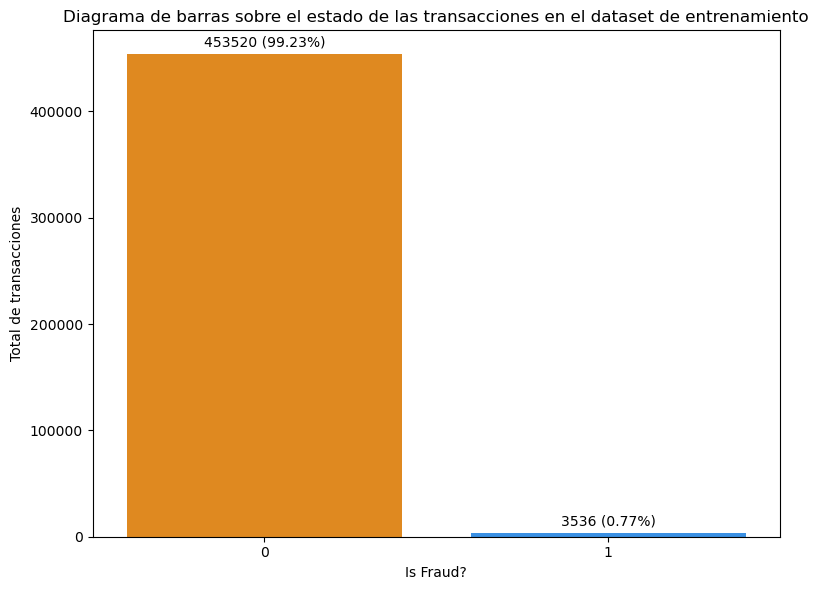

In [156]:
# Contar clases
conteo = train_final_code["Is Fraud?"].value_counts().sort_index()
total = conteo.sum()

# Crear DataFrame auxiliar para graficar
df_plot = pd.DataFrame({'Clase': conteo.index, 'Frecuencia': conteo.values})

# Crear gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])

# Título y etiquetas
plt.title('Diagrama de barras sobre el estado de las transacciones en el dataset de entrenamiento')
plt.xlabel('Is Fraud?')
plt.ylabel('Total de transacciones')
plt.xticks(rotation=0)

# Añadir etiquetas sobre las barras (absoluto y porcentaje)
for i, row in df_plot.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total
    ax.text(i, abs_val + total * 0.01, f'{abs_val} ({pct_val:.2%})',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [157]:
test_final_code["Is Fraud?"].value_counts()

Is Fraud?
0    141726
1      1105
Name: count, dtype: int64

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\1886395165.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])


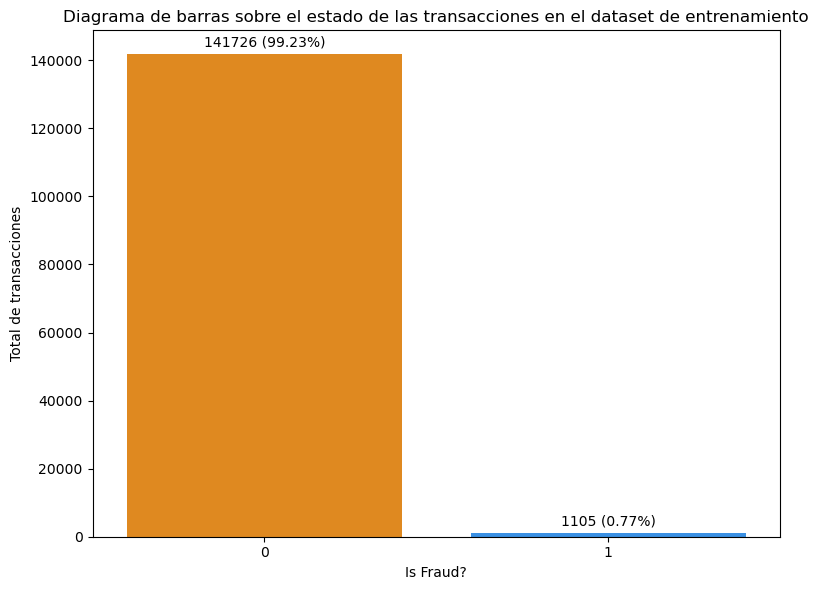

In [158]:
# Contar clases
conteo = test_final_code["Is Fraud?"].value_counts().sort_index()
total = conteo.sum()

# Crear DataFrame auxiliar para graficar
df_plot = pd.DataFrame({'Clase': conteo.index, 'Frecuencia': conteo.values})

# Crear gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])

# Título y etiquetas
plt.title('Diagrama de barras sobre el estado de las transacciones en el dataset de entrenamiento')
plt.xlabel('Is Fraud?')
plt.ylabel('Total de transacciones')
plt.xticks(rotation=0)

# Añadir etiquetas sobre las barras (absoluto y porcentaje)
for i, row in df_plot.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total
    ax.text(i, abs_val + total * 0.01, f'{abs_val} ({pct_val:.2%})',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

In [159]:
val_final_code["Is Fraud?"].value_counts()

Is Fraud?
0    113380
1       884
Name: count, dtype: int64

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\1518491810.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])


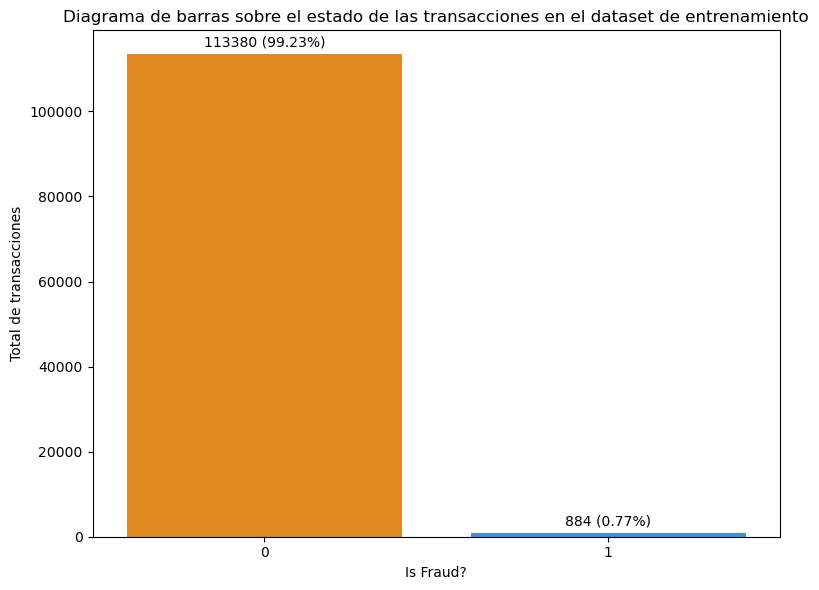

In [160]:
# Contar clases
conteo = val_final_code["Is Fraud?"].value_counts().sort_index()
total = conteo.sum()

# Crear DataFrame auxiliar para graficar
df_plot = pd.DataFrame({'Clase': conteo.index, 'Frecuencia': conteo.values})

# Crear gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])

# Título y etiquetas
plt.title('Diagrama de barras sobre el estado de las transacciones en el dataset de entrenamiento')
plt.xlabel('Is Fraud?')
plt.ylabel('Total de transacciones')
plt.xticks(rotation=0)

# Añadir etiquetas sobre las barras (absoluto y porcentaje)
for i, row in df_plot.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total
    ax.text(i, abs_val + total * 0.01, f'{abs_val} ({pct_val:.2%})',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\815763945.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot_1, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[0])
C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\815763945.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot_2, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[1])
C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\815763945.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot_3, x='Clase', y='Frecu

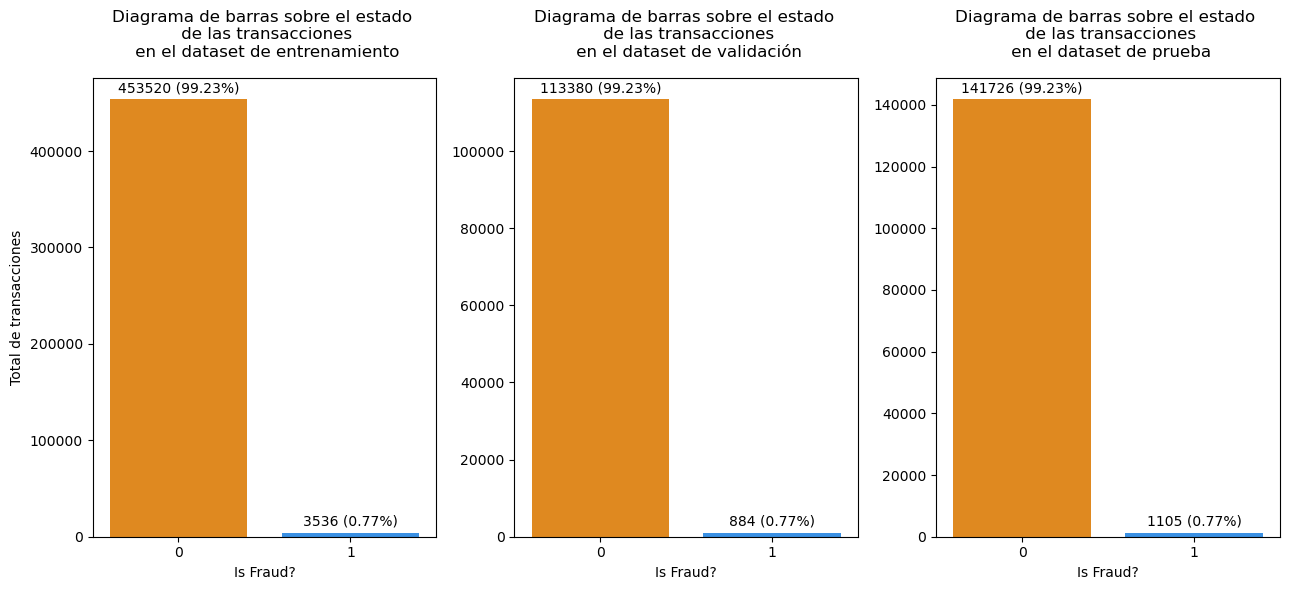

In [161]:
# Crear una figura con 1 fila y 3 columnas (ajustar tamaño según lo necesites)
fig, axes = plt.subplots(1, 3, figsize=(13,6))  # 1 fila, 3 columnas

# Gráfica 1
conteo_1 = train_final_code["Is Fraud?"].value_counts().sort_index()
total_1 = conteo_1.sum()
df_plot_1 = pd.DataFrame({'Clase': conteo_1.index, 'Frecuencia': conteo_1.values})
sns.barplot(data=df_plot_1, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[0])
axes[0].set_title('Diagrama de barras sobre el estado \n de las transacciones\n en el dataset de entrenamiento', pad=15)
axes[0].set_xlabel('Is Fraud?')
axes[0].set_ylabel('Total de transacciones')
axes[0].tick_params(axis='x', rotation=0)
for i, row in df_plot_1.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total_1
    axes[0].text(i, abs_val + total_1 * 0.01, f'{abs_val} ({pct_val:.2%})',
                 ha='center', va='bottom', fontsize=10)
# Gráfica 3
conteo_2 = val_final_code["Is Fraud?"].value_counts().sort_index()
total_2 = conteo_2.sum()
df_plot_2 = pd.DataFrame({'Clase': conteo_2.index, 'Frecuencia': conteo_2.values})
sns.barplot(data=df_plot_2, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[1])
axes[1].set_title('Diagrama de barras sobre el estado \n de las transacciones\n en el dataset de validación', pad=15)
axes[1].set_xlabel('Is Fraud?')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=0)
for i, row in df_plot_2.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total_2
    axes[1].text(i, abs_val + total_2 * 0.01, f'{abs_val} ({pct_val:.2%})',
                 ha='center', va='bottom', fontsize=10)

# Gráfica 2
conteo_3 = test_final_code["Is Fraud?"].value_counts().sort_index()
total_3 = conteo_3.sum()
df_plot_3 = pd.DataFrame({'Clase': conteo_3.index, 'Frecuencia': conteo_3.values})
sns.barplot(data=df_plot_3, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[2])
axes[2].set_title('Diagrama de barras sobre el estado \n de las transacciones\n en el dataset de prueba', pad=15)
axes[2].set_xlabel('Is Fraud?')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=0)
for i, row in df_plot_3.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total_3
    axes[2].text(i, abs_val + total_3 * 0.01, f'{abs_val} ({pct_val:.2%})',
                 ha='center', va='bottom', fontsize=10)


# Ajustar el diseño para evitar solapamientos y mostrar
plt.tight_layout()
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/entre_val_prueba.png", dpi=300, bbox_inches='tight')
plt.show()

### 6.4 Balanceo del conjunto de datos de entrenamiento

In [163]:
## Entrenamiento

X_train=train_final_code.drop("Is Fraud?",axis=1)
y_train=train_final_code["Is Fraud?"]

## Validación
X_val=val_final_code.drop("Is Fraud?",axis=1)
y_val=val_final_code["Is Fraud?"]

## Prueba
X_test=test_final_code.drop("Is Fraud?",axis=1)
y_test=test_final_code["Is Fraud?"]

#### 6.4.1 RUS (Random Undersampling)

In [165]:
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=21)

X_train_under, y_train_under=undersample.fit_resample(X_train, y_train)

In [166]:
y_train_under.value_counts()

Is Fraud?
0    3536
1    3536
Name: count, dtype: int64

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\3173809248.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])


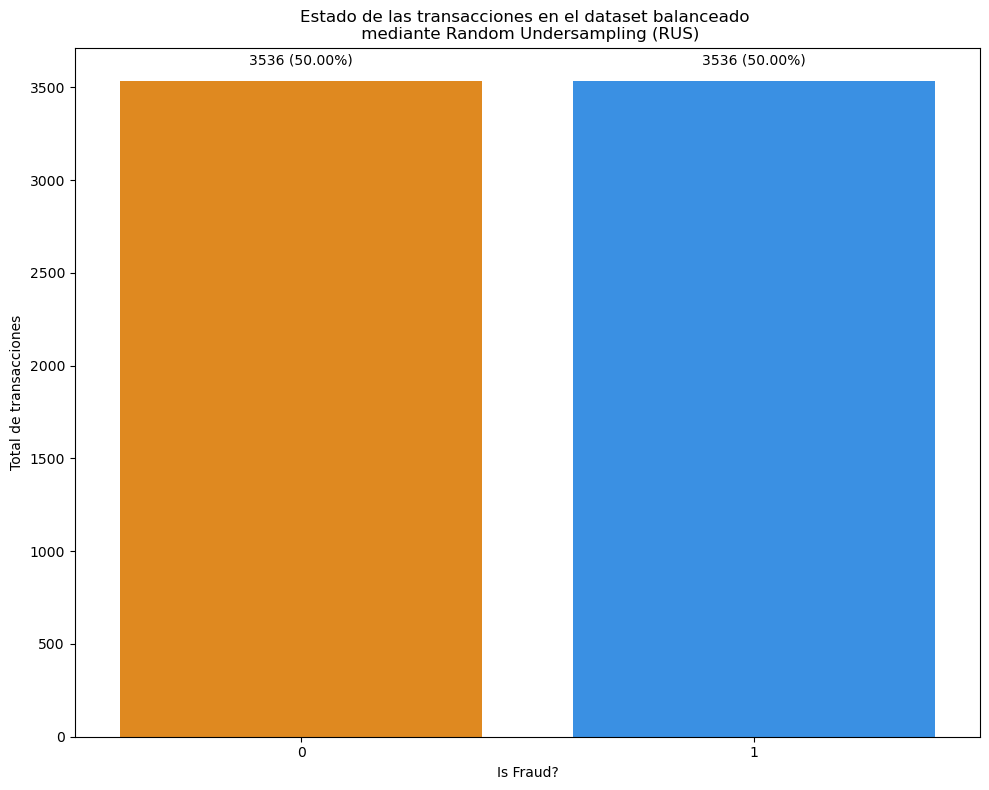

In [167]:
# Contar clases
conteo = y_train_under.value_counts().sort_index()
total = conteo.sum()

# Crear DataFrame auxiliar para graficar
df_plot = pd.DataFrame({'Clase': conteo.index, 'Frecuencia': conteo.values})

# Crear gráfico
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])

# Título y etiquetas
plt.title('Estado de las transacciones en el dataset balanceado \n mediante Random Undersampling (RUS)')
plt.xlabel('Is Fraud?')
plt.ylabel('Total de transacciones')
plt.xticks(rotation=0)

# Añadir etiquetas sobre las barras (absoluto y porcentaje)
for i, row in df_plot.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total
    ax.text(i, abs_val + total * 0.01, f'{abs_val} ({pct_val:.2%})',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [168]:
oversample=SMOTE(random_state=14)

X_train_over, y_train_over=oversample.fit_resample(X_train,y_train)

In [169]:
y_train_over.value_counts()

Is Fraud?
0    453520
1    453520
Name: count, dtype: int64

#### SMOTE (Synthetic Minority Oversampling Technique) y RUS (Random Undersampling)

In [171]:
over_sample=SMOTE(sampling_strategy=0.2, random_state=37)

X_train_over, y_train_over=over_sample.fit_resample(X_train, y_train)

under_sample= RandomUnderSampler(sampling_strategy=1,random_state=26)

X_train_final, y_train_final=under_sample.fit_resample(X_train_over, y_train_over)

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\920894070.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])


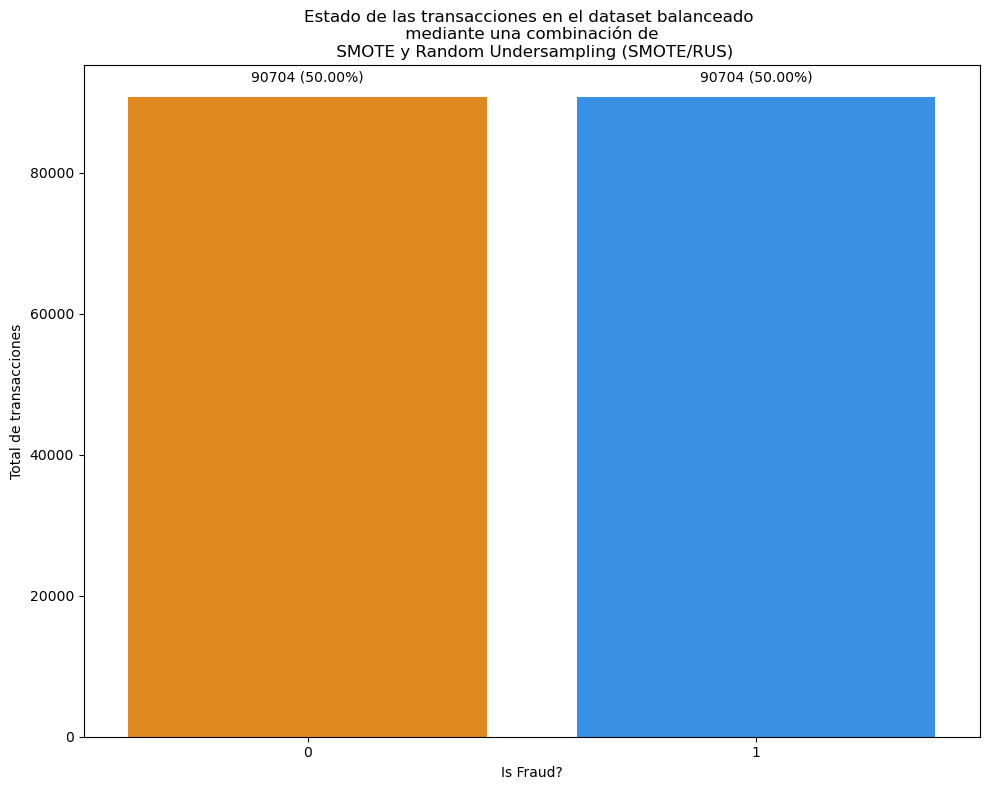

In [172]:
# Contar clases
conteo = y_train_final.value_counts().sort_index()
total = conteo.sum()

# Crear DataFrame auxiliar para graficar
df_plot = pd.DataFrame({'Clase': conteo.index, 'Frecuencia': conteo.values})

# Crear gráfico
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df_plot, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'])

# Título y etiquetas
plt.title('Estado de las transacciones en el dataset balanceado \n mediante una combinación de \n SMOTE y Random Undersampling (SMOTE/RUS)')
plt.xlabel('Is Fraud?')
plt.ylabel('Total de transacciones')
plt.xticks(rotation=0)

# Añadir etiquetas sobre las barras (absoluto y porcentaje)
for i, row in df_plot.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total
    ax.text(i, abs_val + total * 0.01, f'{abs_val} ({pct_val:.2%})',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\3045386149.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot_1, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[0])
C:\Users\carlo\AppData\Local\Temp\ipykernel_25216\3045386149.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot_2, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[1])


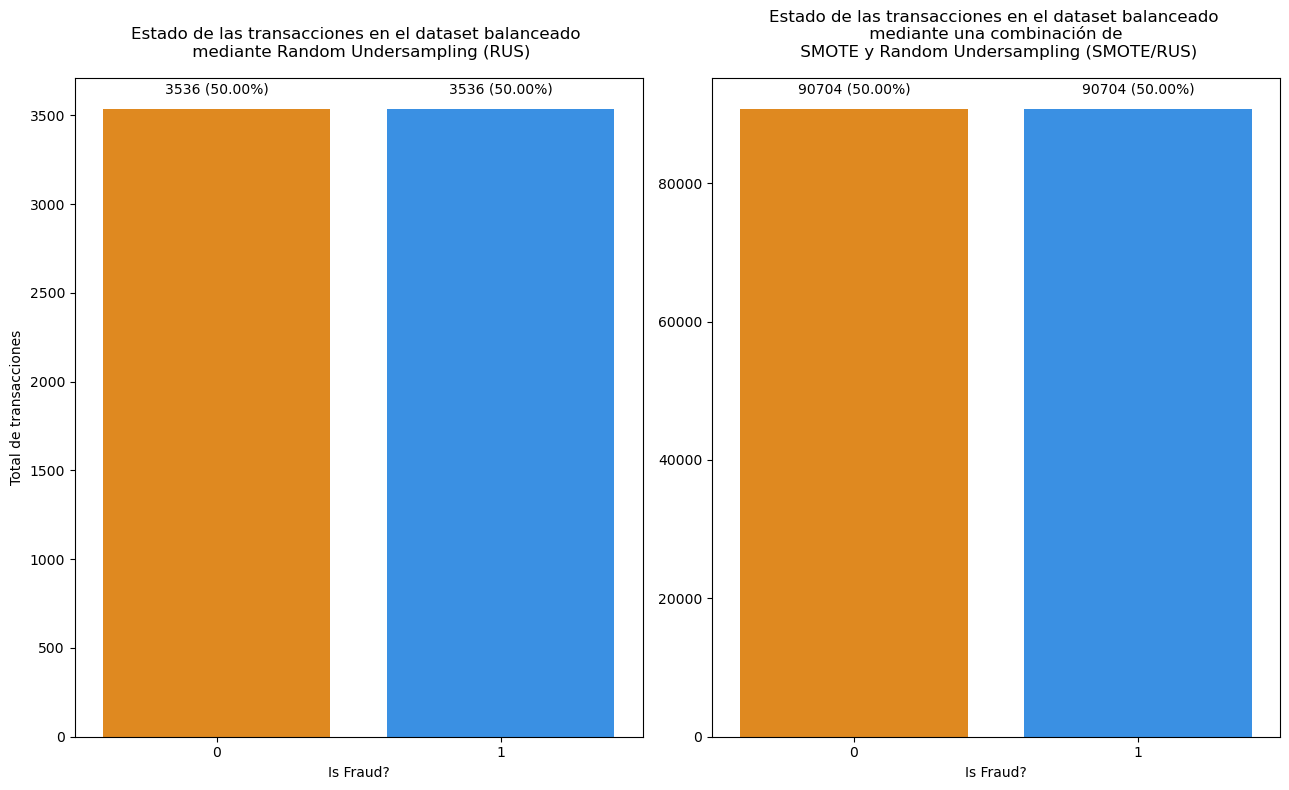

In [173]:
# Crear una figura con 1 fila y 3 columnas (ajustar tamaño según lo necesites)
fig, axes = plt.subplots(1, 2, figsize=(13,8))  # 1 fila, 3 columnas

# Gráfica 1
conteo_1 = y_train_under.value_counts().sort_index()
total_1 = conteo_1.sum()
df_plot_1 = pd.DataFrame({'Clase': conteo_1.index, 'Frecuencia': conteo_1.values})
sns.barplot(data=df_plot_1, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[0])
axes[0].set_title('Estado de las transacciones en el dataset balanceado \n mediante Random Undersampling (RUS)', pad=15)
axes[0].set_xlabel('Is Fraud?')
axes[0].set_ylabel('Total de transacciones')
axes[0].tick_params(axis='x', rotation=0)
for i, row in df_plot_1.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total_1
    axes[0].text(i, abs_val + total_1 * 0.01, f'{abs_val} ({pct_val:.2%})',
                 ha='center', va='bottom', fontsize=10)
# Gráfica 3
conteo_2 = y_train_final.value_counts().sort_index()
total_2 = conteo_2.sum()
df_plot_2 = pd.DataFrame({'Clase': conteo_2.index, 'Frecuencia': conteo_2.values})
sns.barplot(data=df_plot_2, x='Clase', y='Frecuencia', palette=['#FF8C00', '#1E90FF'], ax=axes[1])
axes[1].set_title('Estado de las transacciones en el dataset balanceado \n mediante una combinación de \n SMOTE y Random Undersampling (SMOTE/RUS)', pad=15)
axes[1].set_xlabel('Is Fraud?')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=0)
for i, row in df_plot_2.iterrows():
    abs_val = row['Frecuencia']
    pct_val = abs_val / total_2
    axes[1].text(i, abs_val + total_2 * 0.01, f'{abs_val} ({pct_val:.2%})',
                 ha='center', va='bottom', fontsize=10)

# Ajustar el diseño para evitar solapamientos y mostrar
plt.tight_layout()
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/balanceo.png", dpi=300, bbox_inches='tight')
plt.show()

### 6.5 Ajuste de algoritmos

#### 6.5.1 Modelo de Regression Logistic 

##### 6.5.1.1 Optimización de hiperparámetros para el conjunto de datos balanceado por RUS

In [314]:
# Suprimir las advertencias específicas
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings('ignore', category=LinAlgWarning, module='sklearn')
warnings.filterwarnings('ignore', category=FitFailedWarning, module='sklearn')

param_dist_LR_un={"penalty":["l1","l2","elasticnet", None],
          "C": [0.01, 0.1, 1, 1.5,2.5,5,10, 50,100],
           "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}

modelo_RL_un=LogisticRegression(random_state=110,max_iter=3000,tol=1e-3)

Busqueda_LR=RandomizedSearchCV(modelo_RL_un,param_distributions=param_dist_LR_un,n_iter=200, scoring="f1",cv=10, random_state=110)

Busqueda_LR.fit(X_train_under, y_train_under)

mejores_parametros_LR=Busqueda_LR.best_params_
mejor_puntuacion_LR=Busqueda_LR.best_score_

print(f" Mejores parámetros (Búsqueda): {mejores_parametros_LR}")
print(f" Mejor puntuación (Búsqueda): {mejor_puntuacion_LR}")

 Mejores parámetros (Búsqueda): {'solver': 'saga', 'penalty': 'l1', 'C': 1}
 Mejor puntuación (Búsqueda): 0.838461489710906


In [315]:
LR_1=LogisticRegression(solver='saga', penalty="l1", C=1,max_iter=3000,tol=1e-3,random_state=110)

LR_1.fit(X=X_train_under, y=y_train_under)

y_val_LR=LR_1.predict(X=X_val)

y_scores_LR_val_rus=LR_1.predict_proba(X_val)[:,1]

accuracy_val_LR=accuracy_score(y_val, y_val_LR)
Precision_val_LR=precision_score(y_val,y_val_LR)
Recall_val_LR=recall_score(y_val,y_val_LR)
F1_score_val_LR=f1_score(y_val, y_val_LR)
auc_val_LR=roc_auc_score(y_val, y_scores_LR_val_rus)

print("Accuracy validación:", accuracy_val_LR)
print("Precisión validación:", Precision_val_LR)
print("Recall validación:", Recall_val_LR)
print("F1-score:", F1_score_val_LR)
print("AUC-ROC:", auc_val_LR)

Accuracy validación: 0.8185167681859553
Precisión validación: 0.035297972941341696
Recall validación: 0.8529411764705882
F1-score: 0.06779051472240953
AUC-ROC: 0.9094558282761928


In [316]:
y_test_LR=LR_1.predict(X=X_test)

y_scores_LR_rus=LR_1.predict_proba(X_test)[:,1]

accuracy_test_LR=accuracy_score(y_test, y_test_LR)
Precision_test_LR=precision_score(y_test,y_test_LR)
Recall_test_LR=recall_score(y_test,y_test_LR)
F1_score_test_LR=f1_score(y_test, y_test_LR)
auc_test_LR=roc_auc_score(y_test, y_scores_LR_rus)


print("Accuracy test:", accuracy_test_LR)
print("Precisión test:", Precision_test_LR)
print("Recall test:", Recall_test_LR)
print("F1-score test:", F1_score_test_LR)
print("AUC-ROC:", auc_test_LR)

Accuracy test: 0.8181697250596859
Precisión test: 0.034658282805599225
Recall test: 0.8380090497737557
F1-score test: 0.0665636344031916
AUC-ROC: 0.9092551921134165


###### 6.5.1.1 Curva ROC - RUS

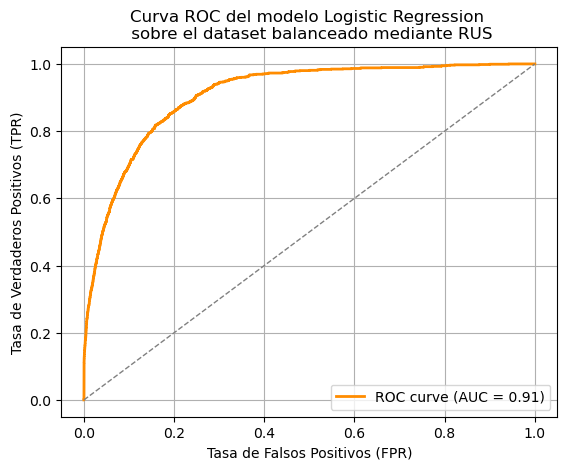

In [318]:
fpr_LR_rus, tpr_LR_rus, _=roc_curve(y_test,y_scores_LR_rus)

roc_auc=auc(fpr_LR_rus,tpr_LR_rus)

plt.figure()
plt.plot(fpr_LR_rus, tpr_LR_rus, color='#FF8C00', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo Logistic Regression \n sobre el dataset balanceado mediante RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

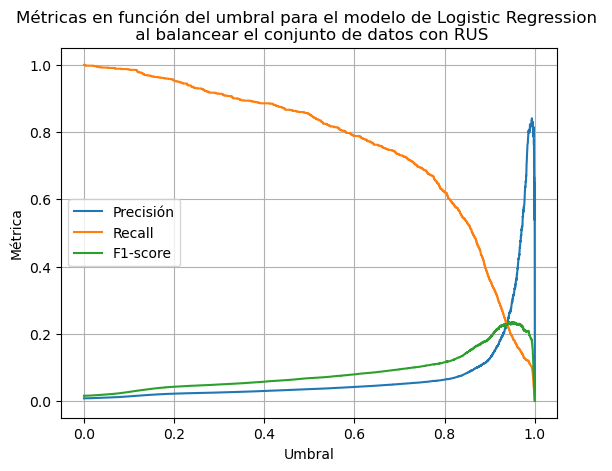

In [319]:
precisions_LR_rus, recalls_LR_rus, thresholds_LR_rus = precision_recall_curve(y_val, y_scores_LR_val_rus)
f1_scores_LR_rus = 2 * (precisions_LR_rus * recalls_LR_rus) / (precisions_LR_rus + recalls_LR_rus + 1e-8)

plt.plot(thresholds_LR_rus, precisions_LR_rus[:-1], label='Precisión')
plt.plot(thresholds_LR_rus, recalls_LR_rus[:-1], label='Recall')
plt.plot(thresholds_LR_rus, f1_scores_LR_rus[:-1], label='F1-score')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.legend()
plt.grid()
plt.title('Métricas en función del umbral para el modelo de Logistic Regression \n al balancear el conjunto de datos con RUS')
plt.show()

##### 6.5.1.2 Optimización de hiperparámetros para el conjunto de datos balanceado por SMOTE y RUS

In [321]:
# Suprimir las advertencias específicas
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings('ignore', category=LinAlgWarning, module='sklearn')
warnings.filterwarnings('ignore', category=FitFailedWarning, module='sklearn')


param_dist_LR_sm={"penalty":["l1","l2",'elasticnet', None],
          "C": [0.01, 0.1, 1, 1.5,2.5,5,10, 50,100],
           "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}

modelo_RL_sm=LogisticRegression(random_state=523,max_iter=3000,tol=1e-3)

Busqueda_LR_sm=RandomizedSearchCV(modelo_RL_sm,param_distributions=param_dist_LR_sm,scoring="recall",n_iter=100, cv=5, random_state=523,n_jobs=-1)

Busqueda_LR_sm.fit(X_train_final, y_train_final)

mejores_parametros_LR_sm=Busqueda_LR_sm.best_params_
mejor_puntuacion_LR_sm=Busqueda_LR_sm.best_score_

print(f" Mejores parámetros (Búsqueda): {mejores_parametros_LR_sm}")
print(f" Mejor puntuación (Búsqueda): {mejor_puntuacion_LR_sm}")

 Mejores parámetros (Búsqueda): {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
 Mejor puntuación (Búsqueda): 0.8621890784834003


In [322]:
LR_1_over=LogisticRegression(solver="liblinear", penalty="l1", C=0.1,max_iter=3000,tol=1e-3,random_state=523)

LR_1_over.fit(X=X_train_final, y=y_train_final)

y_val_LR_over=LR_1_over.predict(X=X_val)

y_scores_LR_val_over=LR_1_over.predict_proba(X_val)[:,1]


accuracy_val_LR_over=accuracy_score(y_val, y_val_LR_over)
Precision_val_LR_over=precision_score(y_val,y_val_LR_over)
Recall_val_LR_over=recall_score(y_val,y_val_LR_over)
F1_score_val_LR_over=f1_score(y_val, y_val_LR_over)
auc_val_over_LR=roc_auc_score(y_val, y_scores_LR_val_over)


print("Accuracy validación:", accuracy_val_LR_over)
print("Precisión validación:", Precision_val_LR_over)
print("Recall validación:", Recall_val_LR_over)
print("F1-score validación:", F1_score_val_LR_over)
print("AUC-ROC:", auc_val_over_LR)

Accuracy validación: 0.83943324231604
Precisión validación: 0.038235760748849754
Recall validación: 0.8178733031674208
F1-score validación: 0.07305613095538827
AUC-ROC: 0.9103990883977239


In [323]:
y_test_LR_over=LR_1_over.predict(X=X_test)

y_scores_LR_over=LR_1_over.predict_proba(X_test)[:,1]

accuracy_test_LR_over=accuracy_score(y_test, y_test_LR_over)
Precision_test_LR_over=precision_score(y_test,y_test_LR_over)
Recall_test_LR_over=recall_score(y_test,y_test_LR_over)
F1_score_test_LR_over=f1_score(y_test, y_test_LR_over)
auc_test_over_LR=roc_auc_score(y_test, y_scores_LR_over)

print("Accuracy validación:", accuracy_test_LR_over)
print("Precisión validación:", Precision_test_LR_over)
print("Recall validación:", Recall_test_LR_over)
print("F1-score validación:", F1_score_test_LR_over)
print("AUC-ROC:", auc_test_over_LR)

Accuracy validación: 0.8395656405122137
Precisión validación: 0.038041175972210454
Recall validación: 0.8126696832579186
F1-score validación: 0.07268018291449152
AUC-ROC: 0.9096201624918595


###### 6.5.1.2.1 Curva ROC - SMOTE/RUS

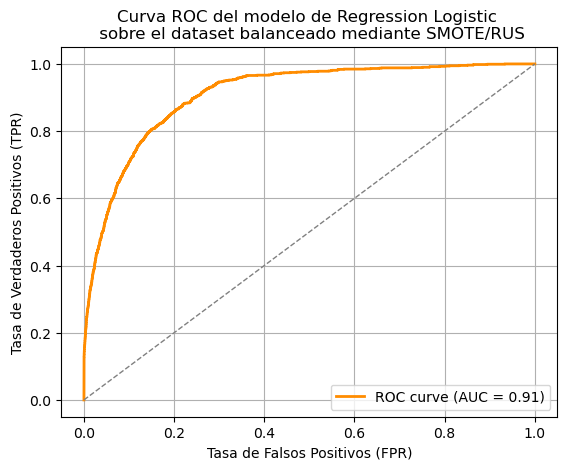

In [325]:
fpr_LR_over, tpr_LR_over, _=roc_curve(y_test,y_scores_LR_over)

roc_auc_over_LR=auc(fpr_LR_over,tpr_LR_over)

plt.figure()
plt.plot(fpr_LR_over, tpr_LR_over, color='#FF8C00', lw=2, label=f'ROC curve (AUC = {roc_auc_over_LR:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo de Regression Logistic \n sobre el dataset balanceado mediante SMOTE/RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

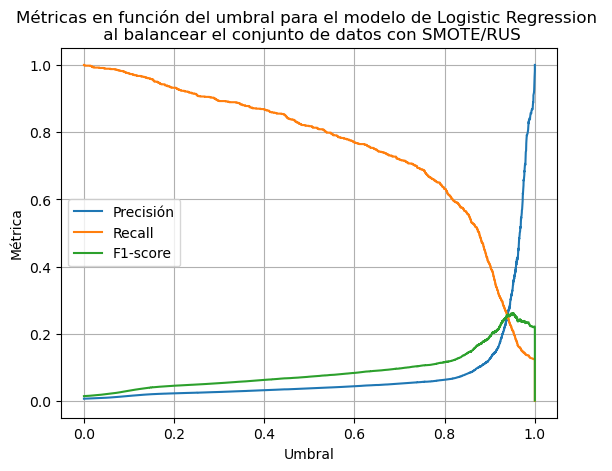

In [326]:
precisions_LR_over, recalls_LR_over, thresholds_LR_over = precision_recall_curve(y_val, y_scores_LR_val_over)
f1_scores_LR_over = 2 * (precisions_LR_over * recalls_LR_over) / (precisions_LR_over + recalls_LR_over + 1e-8)

plt.plot(thresholds_LR_over, precisions_LR_over[:-1], label='Precisión')
plt.plot(thresholds_LR_over, recalls_LR_over[:-1], label='Recall')
plt.plot(thresholds_LR_over, f1_scores_LR_over[:-1], label='F1-score')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.legend()
plt.grid()
plt.title('Métricas en función del umbral para el modelo de Logistic Regression \n al balancear el conjunto de datos con SMOTE/RUS')
plt.show()

#### 6.5.2 Modelo KNN

##### 6.5.2.1 Optimización de hiperparámetros para el conjunto de datos balanceado por RUS

In [329]:
param_dist_knn_under={"n_neighbors":randint(3,50),"weights": ["uniform","distance"],"p":[1,2,3, 4,5]}

modelo_knn_under= KNeighborsClassifier()

busqueda_knn_under=RandomizedSearchCV(modelo_knn_under,param_distributions=param_dist_knn_under,scoring="f1",n_iter=100,cv=10, random_state=111)

busqueda_knn_under.fit(X_train_under, y_train_under)

mejores_parametros_knn_under=busqueda_knn_under.best_params_
mejor_puntuacion_knn_under=busqueda_knn_under.best_score_

print(f" Mejores parámetros (Búsqueda): {mejores_parametros_knn_under}")
print(f" Mejor puntuación (Búsqueda): {mejor_puntuacion_knn_under}")

 Mejores parámetros (Búsqueda): {'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
 Mejor puntuación (Búsqueda): 0.8490730623401781


In [330]:
knn_under=KNeighborsClassifier(n_neighbors=17, weights="distance",p=1)

knn_under.fit(X=X_train_under, y=y_train_under)

y_pred_val_under = knn_under.predict(X = X_val)

y_scores_KNN_val_under=knn_under.predict_proba(X_val)[:,1]

accuracy_val_KN=accuracy_score(y_val, y_pred_val_under)
Precision_val_KN=precision_score(y_val, y_pred_val_under)
Recall_val_KN=recall_score(y_val, y_pred_val_under)
F1_score_val_KN=f1_score(y_val, y_pred_val_under)
auc_val_under=roc_auc_score(y_val, y_scores_KNN_val_under)


print("Accuracy validación:", accuracy_val_KN)
print("Precisión validación:", Precision_val_KN)
print("Recall validación:", Recall_val_KN)
print("F1-score:", F1_score_val_KN)
print("AUC-ROC:", auc_val_under)

Accuracy validación: 0.8020023804522859
Precisión validación: 0.03339629120879121
Recall validación: 0.8800904977375565
F1-score: 0.06435070306038047
AUC-ROC: 0.9230158323149876


In [331]:
y_pred_test_under = knn_under.predict(X = X_test)

y_scores_KNN_under=knn_under.predict_proba(X_test)[:,1]

accuracy_test_KN=accuracy_score(y_test, y_pred_test_under)
Precision_test_KN=precision_score(y_test,y_pred_test_under)
Recall_test_KN=recall_score(y_test,y_pred_test_under)
F1_score_test_KN=f1_score(y_test,y_pred_test_under)
auc_test_under=roc_auc_score(y_test,y_scores_KNN_under)


print("Accuracy validación:", accuracy_test_KN)
print("Precisión validación:", Precision_test_KN)
print("Recall validación:", Recall_test_KN)
print("F1-score:", F1_score_test_KN)
print("AUC-ROC:", auc_test_under)

Accuracy validación: 0.8029139332497847
Precisión validación: 0.03398008064238205
Recall validación: 0.8923076923076924
F1-score: 0.0654671004581369
AUC-ROC: 0.9244023152698633


###### 6.5.2.1.1 Curva ROC KNN - RUS

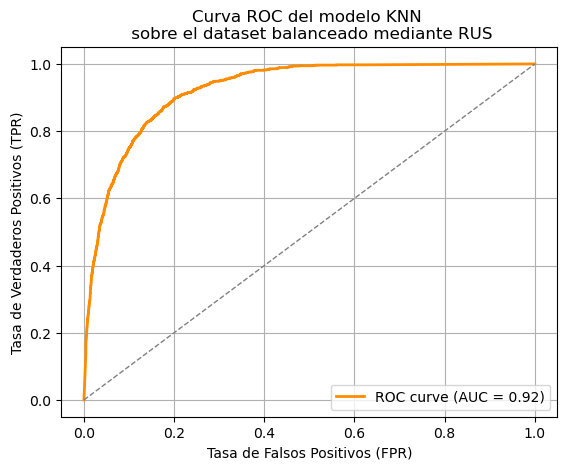

In [333]:
fpr_knn_under, tpr_knn_under, _=roc_curve(y_test,y_scores_KNN_under)

roc_auc_KNN_rus=auc(fpr_knn_under,tpr_knn_under)

plt.figure()
plt.plot(fpr_knn_under, tpr_knn_under, color='#FF8C00', lw=2, label=f'ROC curve (AUC = {roc_auc_KNN_rus:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo KNN \n sobre el dataset balanceado mediante RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

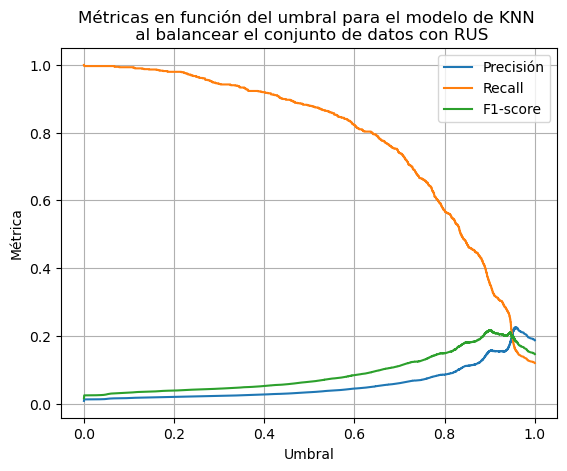

In [334]:
precisions_knn_under, recalls_knn_under, thresholds_knn_under = precision_recall_curve(y_val, y_scores_KNN_val_under)
f1_scores_knn_under = 2 * (precisions_knn_under * recalls_knn_under) / (precisions_knn_under + recalls_knn_under + 1e-8)

plt.plot(thresholds_knn_under, precisions_knn_under[:-1], label='Precisión')
plt.plot(thresholds_knn_under, recalls_knn_under[:-1], label='Recall')
plt.plot(thresholds_knn_under, f1_scores_knn_under[:-1], label='F1-score')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.legend()
plt.grid()
plt.title('Métricas en función del umbral para el modelo de KNN \n al balancear el conjunto de datos con RUS')
plt.show()

In [335]:
## Cambio de umbral

y_pred_KNN_umbral=(y_scores_KNN_under>=0.62).astype(int)

accuracy_KNN_umbral=accuracy_score(y_test,y_pred_KNN_umbral)
Precision_KNN_umbral=precision_score(y_test,y_pred_KNN_umbral)
Recall_test_KNN_umbral =recall_score(y_test,y_pred_KNN_umbral)
F1_score_test_KNN_umbral=f1_score(y_test,y_pred_KNN_umbral)

print("Accuracy validación:", accuracy_KNN_umbral)
print("Precisión validación:", Precision_KNN_umbral)
print("Recall validación:", Recall_test_KNN_umbral)
print("F1-score:", F1_score_test_KNN_umbral)

Accuracy validación: 0.8696781511016516
Precisión validación: 0.04628142005700959
Recall validación: 0.8081447963800905
F1-score: 0.08754901960784314


##### 6.5.2.2 Optimización de hiperparámetros para el conjunto de datos balanceado por SMOTE y RUS

In [404]:
param_dist_knn_over={"n_neighbors":[10,20,25,30],"weights": ["uniform","distance"],'p':[1,2]}

modelo_knn_over= KNeighborsClassifier()

bus_cuadricula_over=GridSearchCV(modelo_knn_over,param_grid=param_dist_knn_over,scoring="recall",cv=10,n_jobs=-1)

bus_cuadricula_over.fit(X_train_final, y_train_final)

mejores_parametros_knn_over=bus_cuadricula_over.best_params_
mejor_puntuacion_knn_over=bus_cuadricula_over.best_score_

print(f" Mejores parámetros (Búsqueda): {mejores_parametros_knn_over}")
print(f" Mejor puntuación (Búsqueda): {mejor_puntuacion_knn_over}")

 Mejores parámetros (Búsqueda): {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
 Mejor puntuación (Búsqueda): 0.9998236039904238


In [405]:
knn_over= KNeighborsClassifier(n_neighbors=10, weights="distance", p=1)

knn_over.fit( X =X_train_final, y = y_train_final) 


y_pred_val_over = knn_over.predict(X = X_val)

y_scores_KNN_val_over=knn_over.predict_proba(X_val)[:,1]

accuracy_val_KN_over=accuracy_score(y_val, y_pred_val_over)
Precision_val_KN_over=precision_score(y_val,y_pred_val_over)
Recall_val_KN_over=recall_score(y_val,y_pred_val_over)
F1_score_val_KN_over=f1_score(y_val,y_pred_val_over)
auc_val_over=roc_auc_score(y_val,y_scores_KNN_val_over)

print("Accuracy validación:", accuracy_val_KN_over)
print("Precisión validación:", Precision_val_KN_over)
print("Recall validación:", Recall_val_KN_over)
print("F1-score:", F1_score_val_KN_over)
print("AUC-ROC:", auc_val_over)

Accuracy validación: 0.9316407617447315
Precisión validación: 0.07972333454677831
Recall validación: 0.7432126696832579
F1-score: 0.144
AUC-ROC: 0.9000305403923378


In [406]:
y_pred_test_over = knn_over.predict(X = X_test)

y_scores_KNN_test_over=knn_over.predict_proba(X_test)[:,1]

accuracy_test_KN_over=accuracy_score(y_test, y_pred_test_over)
Precision_test_KN_over=precision_score(y_test,y_pred_test_over)
Recall_test_KN_over=recall_score(y_test,y_pred_test_over)
F1_score_test_KN_over=f1_score(y_test,y_pred_test_over)
auc_test_over=roc_auc_score(y_test,y_scores_KNN_test_over)

print("Accuracy validación:", accuracy_test_KN_over)
print("Precisión validación:", Precision_test_KN_over)
print("Recall validación:", Recall_test_KN_over)
print("F1-score:", F1_score_test_KN_over)
print("AUC-ROC:", auc_test_over)

Accuracy validación: 0.9318495284637088
Precisión validación: 0.07853863436553678
Recall validación: 0.7276018099547511
F1-score: 0.14177393757714687
AUC-ROC: 0.9058097477364231


###### 6.5.2.2.1 Curva ROC - SMOTE/RUS

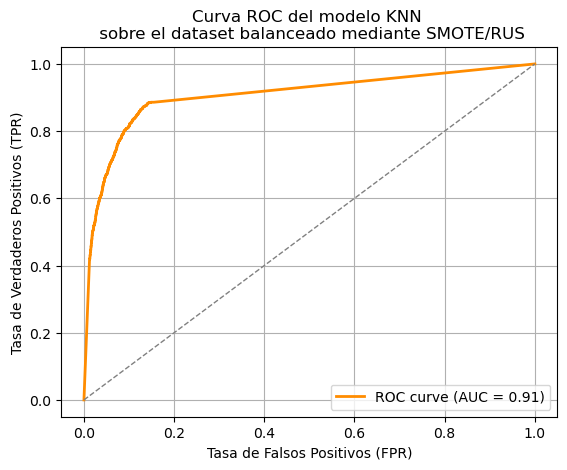

In [408]:
fpr_knn_over, tpr_knn_over, _=roc_curve(y_test,y_scores_KNN_test_over)

roc_auc_over_knn=auc(fpr_knn_over,tpr_knn_over)

plt.figure()
plt.plot(fpr_knn_over, tpr_knn_over, color='#FF8C00', lw=2, label=f'ROC curve (AUC = {roc_auc_over_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo KNN \n sobre el dataset balanceado mediante SMOTE/RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

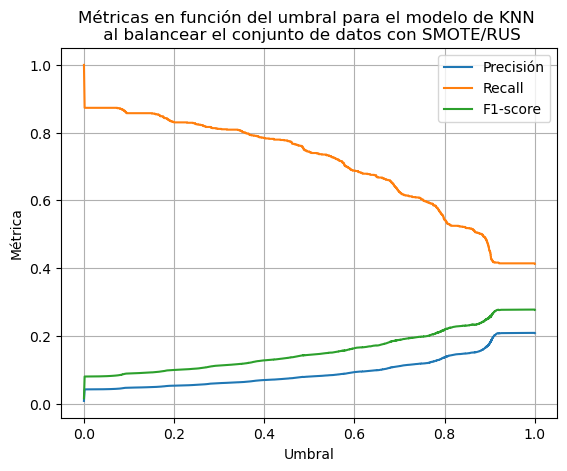

In [409]:
precisions_knn_over, recalls_knn_over, thresholds_knn_over = precision_recall_curve(y_val, y_scores_KNN_val_over)
f1_scores_knn_over = 2 * (precisions_knn_over * recalls_knn_over) / (precisions_knn_over + recalls_knn_over + 1e-8)

plt.plot(thresholds_knn_over, precisions_knn_over[:-1], label='Precisión')
plt.plot(thresholds_knn_over, recalls_knn_over[:-1], label='Recall')
plt.plot(thresholds_knn_over, f1_scores_knn_over[:-1], label='F1-score')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.legend()
plt.grid()
plt.title('Métricas en función del umbral para el modelo de KNN \n al balancear el conjunto de datos con SMOTE/RUS')
plt.show()

#### 6.5.3 Modelo Decision Tree

##### 6.5.3.1 Optimización de hiperparámetros para el conjunto de datos balanceado por RUS

In [352]:
param_dist_tree_under = {"max_depth":randint(5,20),
                   "min_samples_split":randint(110,120),
                   "min_samples_leaf":randint(5,15)}

tree_model_under = DecisionTreeClassifier(random_state=35)

busqueda_random_under=RandomizedSearchCV(tree_model_under,param_distributions=param_dist_tree_under,scoring="recall",n_iter=200,cv=10,random_state=35)

busqueda_random_under.fit(X_train_under,y_train_under)

mejores_parametros_tree_under = busqueda_random_under.best_params_
mejor_puntuacion_tree_under = busqueda_random_under.best_score_

print(f" Mejores parámetros (Búsqueda): {mejores_parametros_tree_under}")
print(f" Mejor puntuación (Búsqueda): {mejor_puntuacion_tree_under}")

 Mejores parámetros (Búsqueda): {'max_depth': 6, 'min_samples_leaf': 13, 'min_samples_split': 112}
 Mejor puntuación (Búsqueda): 0.9080792560938524


In [353]:
Decision_tree_under=DecisionTreeClassifier(max_depth=6,min_samples_leaf=13, min_samples_split=112, random_state=35)

Decision_tree_under.fit( X =X_train_under, y = y_train_under)

y_tree_val_under = Decision_tree_under.predict(X = X_val)

y_scores_DT_under_val=Decision_tree_under.predict_proba(X_val)[:,1]

accuracy_val_tree_under=accuracy_score(y_val, y_tree_val_under)
Precision_val_tree_under=precision_score(y_val,y_tree_val_under)
Recall_val_tree_under=recall_score(y_val,y_tree_val_under)
F1_score_val_tree_under=f1_score(y_val,y_tree_val_under)
auc_val_under_tree=roc_auc_score(y_val,y_scores_DT_under_val)

print("Accuracy validación:", accuracy_val_tree_under)
print("Precisión validación:", Precision_val_tree_under)
print("Recall validación:", Recall_val_tree_under)
print("F1-score:", F1_score_val_tree_under)
print("AUC-ROC:", auc_val_under_tree)

Accuracy validación: 0.7797118952600994
Precisión validación: 0.03032295494101721
Recall validación: 0.8868778280542986
F1-score: 0.05864093645985265
AUC-ROC: 0.9027216468225621


In [354]:
y_tree_test_under = Decision_tree_under.predict(X = X_test)

y_scores_DT_rus=Decision_tree_under.predict_proba(X_test)[:,1]

accuracy_test_tree_under=accuracy_score(y_test, y_tree_test_under)
Precision_test_tree_under=precision_score(y_test,y_tree_test_under)
Recall_test_tree_under=recall_score(y_test,y_tree_test_under)
F1_score_test_tree_under=f1_score(y_test,y_tree_test_under)
auc_val_under_test_tree=roc_auc_score(y_test,y_scores_DT_rus)

print("Accuracy validación:", accuracy_test_tree_under)
print("Precisión validación:", Precision_test_tree_under)
print("Recall validación:", Recall_test_tree_under)
print("F1-score:", F1_score_test_tree_under)
print("AUC-ROC:", auc_val_under_test_tree)

Accuracy validación: 0.7799147243945642
Precisión validación: 0.03101806036615537
Recall validación: 0.9076923076923077
F1-score: 0.05998624443048952
AUC-ROC: 0.9097296721230559


###### 6.5.3.1.1 Curva ROC - RUS

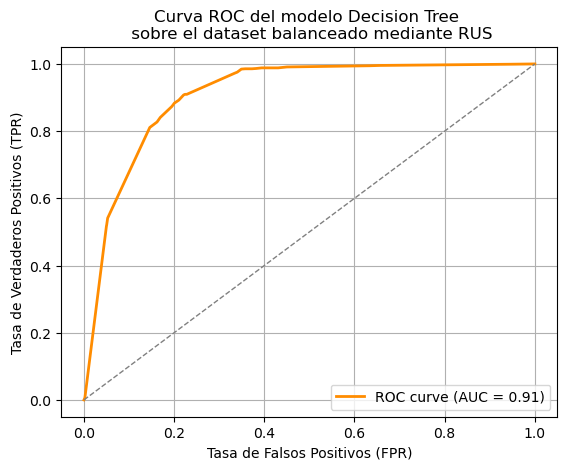

In [356]:
fpr_DT_rus, tpr_DT_rus, _=roc_curve(y_test,y_scores_DT_rus)

roc_auc_rus_DT=auc(fpr_DT_rus,tpr_DT_rus)

plt.figure()
plt.plot(fpr_DT_rus, tpr_DT_rus, color='#FF8C00', lw=2, label=f'ROC curve (AUC = {roc_auc_rus_DT:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo Decision Tree \n sobre el dataset balanceado mediante RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

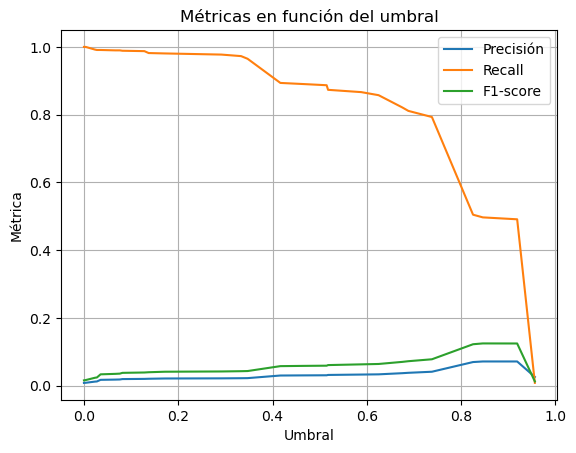

In [357]:
precisions_DT_rus, recalls_DT_val, thresholds_DT_vall = precision_recall_curve(y_val, y_scores_DT_under_val)
f1_scores_DT_val = 2 * (precisions_DT_rus * recalls_DT_val) / (precisions_DT_rus + recalls_DT_val + 1e-8)

plt.plot(thresholds_DT_vall, precisions_DT_rus[:-1], label='Precisión')
plt.plot(thresholds_DT_vall, recalls_DT_val[:-1], label='Recall')
plt.plot(thresholds_DT_vall, f1_scores_DT_val[:-1], label='F1-score')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.legend()
plt.grid()
plt.title('Métricas en función del umbral')
plt.show()

In [358]:
## Umbral de decisión 

y_pred_clasificacion=(y_scores_DT_rus>=0.7).astype(int)

accuracy_prueba_under=accuracy_score(y_test, y_pred_clasificacion)
Precision_prueba_under=precision_score(y_test,y_pred_clasificacion)
Recall_test_prueba_under=recall_score(y_test,y_pred_clasificacion)
F1_score_test_prueba_under=f1_score(y_test,y_pred_clasificacion)

print("Accuracy validación:", accuracy_prueba_under)
print("Precisión validación:", Precision_prueba_under)
print("Recall validación:", Recall_test_prueba_under)
print("F1-score:", F1_score_test_prueba_under)

Accuracy validación: 0.853680223480897
Precisión validación: 0.04150838506439359
Recall validación: 0.8108597285067873
F1-score: 0.07897404257194482


##### 6.5.3.1 Optimización de hiperparámetros para el conjunto de datos balanceado por SMOTE y RUS

In [360]:
param_dist_tree_over = {"max_depth":randint(10,20),
                   "min_samples_split":randint(25,40),
                   "min_samples_leaf":randint(137,150)}

tree_model_over = DecisionTreeClassifier(random_state=264)

busqueda_random_over=RandomizedSearchCV(tree_model_over,param_distributions=param_dist_tree_over,scoring="recall",n_iter=100,cv=5,random_state=264,n_jobs=-1)

busqueda_random_over.fit(X_train_final,y_train_final)

mejores_parametros_tree_over = busqueda_random_over.best_params_
mejor_puntuacion_tree_over = busqueda_random_over.best_score_

print(f" Mejores parámetros (Búsqueda): {mejores_parametros_tree_over}")
print(f" Mejor puntuación (Búsqueda): {mejor_puntuacion_tree_over}")

 Mejores parámetros (Búsqueda): {'max_depth': 11, 'min_samples_leaf': 137, 'min_samples_split': 33}
 Mejor puntuación (Búsqueda): 0.9393742378320697


In [361]:
Decision_tree_over=DecisionTreeClassifier(max_depth=11,min_samples_leaf=137, min_samples_split=33, random_state=264)

Decision_tree_over.fit( X =X_train_final, y = y_train_final)

y_tree_val_over = Decision_tree_over.predict(X = X_val)

y_scores_DT_over_val=Decision_tree_over.predict_proba(X_val)[:,1]

accuracy_val_tree_over=accuracy_score(y_val, y_tree_val_over)
Precision_val_tree_over=precision_score(y_val,y_tree_val_over)
Recall_val_tree_over=recall_score(y_val,y_tree_val_over)
F1_score_val_tree_over=f1_score(y_val,y_tree_val_over)
auc_val_over_tree=roc_auc_score(y_val,y_scores_DT_over_val)

print("Accuracy validación:", accuracy_val_tree_over)
print("Precisión validación:", Precision_val_tree_over)
print("Recall validación:", Recall_val_tree_over)
print("F1-score:", F1_score_val_tree_over)
print("AUC-ROC:", auc_val_over_tree)

Accuracy validación: 0.8614524259609325
Precisión validación: 0.04293315393553911
Recall validación: 0.7941176470588235
F1-score: 0.0814621409921671
AUC-ROC: 0.9153569933407777


In [362]:
y_tree_test_over = Decision_tree_over.predict(X = X_test)

y_scores_DT_over_test=Decision_tree_over.predict_proba(X_test)[:,1]

accuracy_test_tree_over=accuracy_score(y_test, y_tree_test_over)
Precision_test_tree_over=precision_score(y_test,y_tree_test_over)
Recall_test_tree_over=recall_score(y_test,y_tree_test_over)
F1_score_test_tree_over=f1_score(y_test,y_tree_test_over)
auc_val_test_tree=roc_auc_score(y_test,y_scores_DT_over_test)

print("Accuracy validación:", accuracy_test_tree_over)
print("Precisión validación:", Precision_test_tree_over)
print("Recall validación:", Recall_test_tree_over)
print("F1-score:", F1_score_test_tree_over)
print("AUC-ROC:", auc_val_test_tree)

Accuracy validación: 0.8615776687133746
Precisión validación: 0.04326123128119801
Recall validación: 0.8
F1-score: 0.08208366219415943
AUC-ROC: 0.9246739342749374


###### 6.5.3.1.1 Curva ROC - SMOTE/RUS

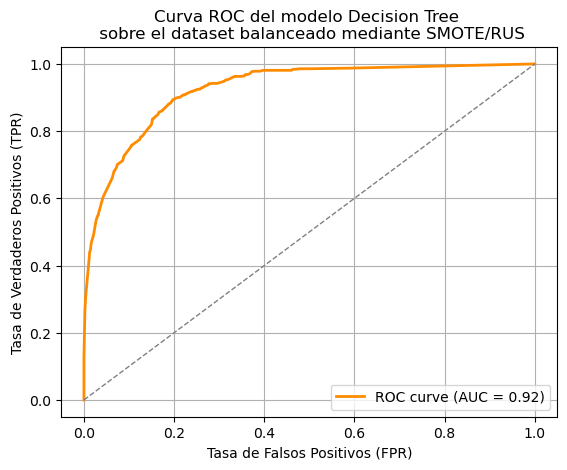

In [364]:
fpr_DT_over, tpr_DT_over, _=roc_curve(y_test,y_scores_DT_over_test)

roc_auc_over_DT=auc(fpr_DT_over,tpr_DT_over)

plt.figure()
plt.plot(fpr_DT_over, tpr_DT_over, color='#FF8C00', lw=2, label=f'ROC curve (AUC = {roc_auc_over_DT:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo Decision Tree \n sobre el dataset balanceado mediante SMOTE/RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

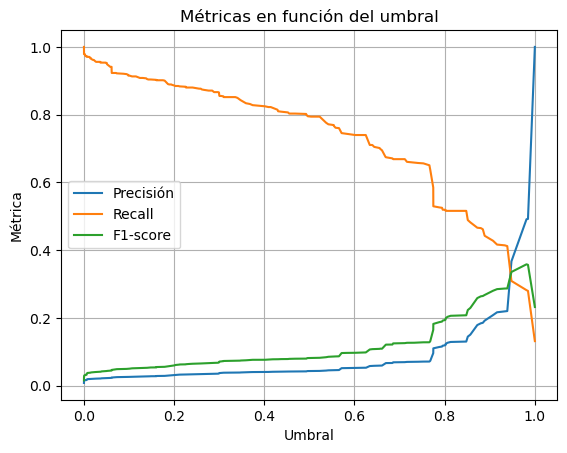

In [365]:
precisions_DT_over, recalls_DT_over, thresholds_DT_over = precision_recall_curve(y_val, y_scores_DT_over_val)
f1_scores_DT_over = 2 * (precisions_DT_over * recalls_DT_over) / (precisions_DT_over + recalls_DT_over + 1e-8)

plt.plot(thresholds_DT_over, precisions_DT_over[:-1], label='Precisión')
plt.plot(thresholds_DT_over, recalls_DT_over[:-1], label='Recall')
plt.plot(thresholds_DT_over, f1_scores_DT_over[:-1], label='F1-score')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.legend()
plt.grid()
plt.title('Métricas en función del umbral')
plt.show()

#### 6.5.4 Modelo Random Forest

##### 6.5.4.1 Optimización de hiperparámetros para el conjunto de datos balanceado por RUS

In [368]:
param_dist_RF_under = {"n_estimators":randint(20,65),
                   "max_depth":randint(10,54),
                   "min_samples_split":randint(50,60),
                   "min_samples_leaf":randint(5,30),
                   "max_features":randint(13,22),
                   "max_samples":randint(3000,7070)}

random_model_RF_under = RandomForestClassifier(random_state=117)

busqueda_random_RF_under=RandomizedSearchCV(random_model_RF_under,param_distributions=param_dist_RF_under,scoring="f1",n_iter=100,cv=10, random_state=117, n_jobs=-1)

busqueda_random_RF_under.fit(X_train_under, y_train_under)

mejores_parametros_RF_under = busqueda_random_RF_under.best_params_
mejor_puntuacion_RF_under = busqueda_random_RF_under.best_score_

print(f" Mejores parámetros (Búsqueda): {mejores_parametros_RF_under}")
print(f" Mejor puntuación (Búsqueda): {mejor_puntuacion_RF_under}")

 Mejores parámetros (Búsqueda): {'max_depth': 33, 'max_features': 13, 'max_samples': 6353, 'min_samples_leaf': 7, 'min_samples_split': 53, 'n_estimators': 42}
 Mejor puntuación (Búsqueda): 0.8657383339777178


In [369]:
RF_under=RandomForestClassifier(max_depth=33, max_features=13,max_samples=6353, min_samples_leaf=7, min_samples_split=53, n_estimators=42,
                                random_state=117)

RF_under.fit(X=X_train_under, y=y_train_under)

y_RF_under=RF_under.predict(X=X_val)

y_scores_RF_under=RF_under.predict_proba(X_val)[:,1]

accuracy_val_RF_under=accuracy_score(y_val,y_RF_under)
Precision_val_RF_under=precision_score(y_val,y_RF_under)
Recall_val_RF_under=recall_score(y_val,y_RF_under)
F1_score_val_RF_under=f1_score(y_val,y_RF_under)
auc_val_RF_under=roc_auc_score(y_val,y_scores_RF_under)

print("Accuracy validación:",accuracy_val_RF_under)
print("Precisión validación:", Precision_val_RF_under)
print("Recall validación:", Recall_val_RF_under)
print("F1-score:", F1_score_val_RF_under)
print("AUC-ROC:", auc_val_RF_under)

Accuracy validación: 0.8136946019743752
Precisión validación: 0.03521640091116173
Recall validación: 0.8744343891402715
F1-score: 0.06770605237803276
AUC-ROC: 0.9346831950618151


In [370]:
y_RF_test=RF_under.predict(X=X_test)

y_scores_RF_under_test=RF_under.predict_proba(X_test)[:,1]

accuracy_test_RF_under=accuracy_score(y_test,y_RF_test)
Precision_test_RF_under=precision_score(y_test,y_RF_test)
Recall_test_RF_under=recall_score(y_test,y_RF_test)
F1_score_test_RF_under=f1_score(y_test,y_RF_test)
auc_test_RF_under=roc_auc_score(y_test,y_scores_RF_under_test)

print("Accuracy validación:",accuracy_test_RF_under)
print("Precisión validación:", Precision_test_RF_under)
print("Recall validación:",Recall_test_RF_under)
print("F1-score:", F1_score_test_RF_under)
print("AUC-ROC:", auc_test_RF_under)

Accuracy validación: 0.81549523562812
Precisión validación: 0.036427732079905996
Recall validación: 0.897737556561086
F1-score: 0.07001446871581325
AUC-ROC: 0.9383053611254091


###### 6.5.4.1.1 Curva ROC - RUS

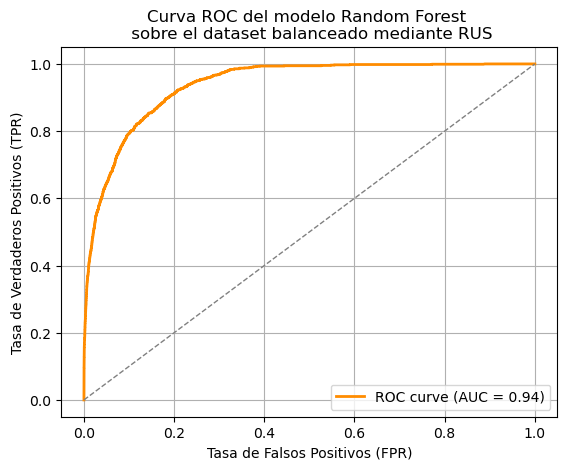

In [372]:
fpr_RF_under, tpr_RF_under, _=roc_curve(y_test,y_scores_RF_under_test)

roc_auc_under_RF=auc(fpr_RF_under,tpr_RF_under)

plt.figure()
plt.plot(fpr_RF_under, tpr_RF_under, color='#FF8C00', lw=2, label=f'ROC curve (AUC = {roc_auc_under_RF:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo Random Forest \n sobre el dataset balanceado mediante RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

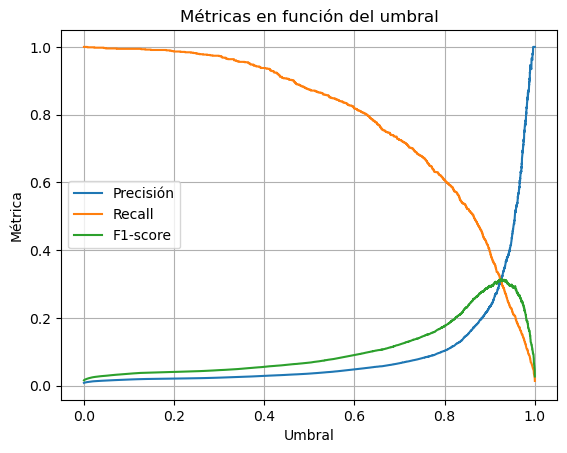

In [373]:
precisions_RF_under, recalls_RF_under, thresholds_RF_under = precision_recall_curve(y_val, y_scores_RF_under)
f1_scores_RF_under = 2 * (precisions_RF_under * recalls_RF_under) / (precisions_RF_under + recalls_RF_under + 1e-8)

plt.plot(thresholds_RF_under, precisions_RF_under[:-1], label='Precisión')
plt.plot(thresholds_RF_under, recalls_RF_under[:-1], label='Recall')
plt.plot(thresholds_RF_under, f1_scores_RF_under[:-1], label='F1-score')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.legend()
plt.grid()
plt.title('Métricas en función del umbral')
plt.show()

In [374]:
### Cambio en el umbral de decisión

y_pred_class_RF_under=(y_scores_RF_under_test>=0.63).astype(int)

accuracy_umbral_RF_under=accuracy_score(y_test, y_pred_class_RF_under)
Precision_umbral_RF_under=precision_score(y_test,y_pred_class_RF_under)
Recall_test_umbral_RF_under=recall_score(y_test,y_pred_class_RF_under)
F1_score_test_umbral_RF_under=f1_score(y_test,y_pred_class_RF_under)

print("Accuracy validación:", accuracy_umbral_RF_under)
print("Precisión validación:", Precision_umbral_RF_under)
print("Recall validación:", Recall_test_umbral_RF_under)
print("F1-score:", F1_score_test_umbral_RF_under)

Accuracy validación: 0.8868242888448586
Precisión validación: 0.053327796891683474
Recall validación: 0.8135746606334842
F1-score: 0.10009463898012581


##### 6.5.4.2 Optimización de hiperparámetros para el conjunto de datos balanceado por SMOTE y RUS

In [376]:
param_dist_RF_over = {"n_estimators":randint(15,50),
                   "max_depth":randint(10,30),
                   "min_samples_split":randint(25,40),
                   "min_samples_leaf":randint(140,160),
                   "max_features":randint(20,27),
                   "max_samples":randint(140000,180000)}

random_model_RF_over = RandomForestClassifier(random_state=447)

busqueda_random_over=RandomizedSearchCV(random_model_RF_over,param_distributions=param_dist_RF_over,scoring='recall',n_iter=100,cv=5,random_state=447, n_jobs=-1)

busqueda_random_over.fit(X_train_final, y_train_final)

mejores_parametros_tree_over = busqueda_random_over.best_params_
mejor_puntuacion_tree_over = busqueda_random_over.best_score_

print(f" Mejores parámetros (Búsqueda): {mejores_parametros_tree_over}")
print(f" Mejor puntuación (Búsqueda): {mejor_puntuacion_tree_over}")

 Mejores parámetros (Búsqueda): {'max_depth': 11, 'max_features': 24, 'max_samples': 143452, 'min_samples_leaf': 152, 'min_samples_split': 33, 'n_estimators': 19}
 Mejor puntuación (Búsqueda): 0.9343579349973657


In [377]:
RF_over=RandomForestClassifier(max_depth=11, max_features=24,max_samples=143452, min_samples_leaf=152, min_samples_split=33, n_estimators=19,
                                random_state=447)

RF_over.fit(X=X_train_final, y=y_train_final)

y_RF_val_over=RF_over.predict(X=X_val)

y_scores_RF_over=RF_over.predict_proba(X_val)[:,1]

accuracy_val_RF_over=accuracy_score(y_val,y_RF_val_over)
Precision_val_RF_over=precision_score(y_val,y_RF_val_over)
Recall_val_RF_over=recall_score(y_val,y_RF_val_over)
F1_score_val_RF_over=f1_score(y_val,y_RF_val_over)
auc_val_RF_over=roc_auc_score(y_val,y_scores_RF_over)

print("Accuracy validación:",accuracy_val_RF_over)
print("Precisión validación:", Precision_val_RF_over)
print("Recall validación:", Recall_val_RF_over)
print("F1-score:", F1_score_val_RF_over)
print("AUC-ROC:", auc_val_RF_over)

Accuracy validación: 0.8762952460967584
Precisión validación: 0.04802510403165291
Recall validación: 0.7963800904977375
F1-score: 0.09058740268931352
AUC-ROC: 0.928357996454481


In [378]:
y_RF_over_test=RF_over.predict(X=X_test)

y_scores_RF_over_test=RF_over.predict_proba(X_test)[:,1]

accuracy_test_RF_over=accuracy_score(y_test,y_RF_over_test)
Precision_test_RF_over=precision_score(y_test,y_RF_over_test)
Recall_test_RF_over=recall_score(y_test,y_RF_over_test)
F1_score_test_RF_over=f1_score(y_test,y_RF_over_test)
auc_test_RF_over=roc_auc_score(y_test,y_scores_RF_over_test)

print("Accuracy validación:",accuracy_test_RF_over)
print("Precisión validación:", Precision_test_RF_over)
print("Recall validación:", Recall_test_RF_over)
print("F1-score:", F1_score_test_RF_over)
print("AUC-ROC:", auc_test_RF_over)

Accuracy validación: 0.8762033452121738
Precisión validación: 0.048384460306216966
Recall validación: 0.8036199095022625
F1-score: 0.09127351218008017
AUC-ROC: 0.9354996860617482


###### 6.5.4.2.1 Curva ROC - SMOTE/RUS

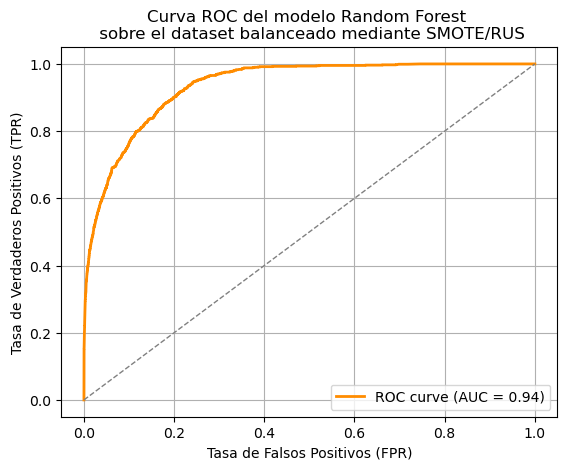

In [380]:
fpr_RF_over, tpr_RF_over, _=roc_curve(y_test,y_scores_RF_over_test)

roc_auc_over_RF=auc(fpr_RF_over,tpr_RF_over)

plt.figure()
plt.plot(fpr_RF_over, tpr_RF_over, color='#FF8C00', lw=2, label=f'ROC curve (AUC = {roc_auc_over_RF:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo Random Forest \n sobre el dataset balanceado mediante SMOTE/RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

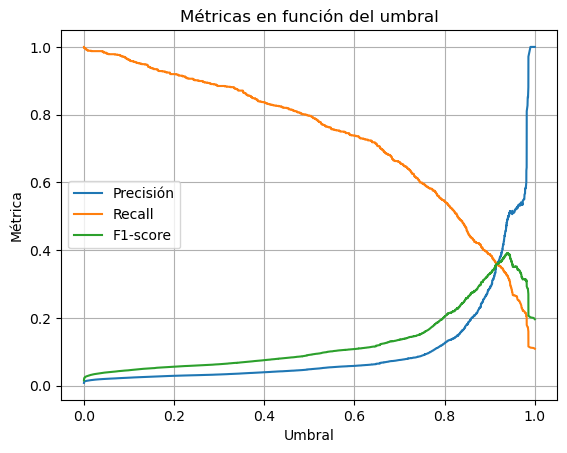

In [381]:
precisions_RF_over, recalls_RF_over, thresholds_RF_over = precision_recall_curve(y_val, y_scores_RF_over)

f1_scores_RF_over = 2 * (precisions_RF_over * recalls_RF_over) / (precisions_RF_over + recalls_RF_over + 1e-8)

plt.plot(thresholds_RF_over, precisions_RF_over[:-1], label='Precisión')
plt.plot(thresholds_RF_over, recalls_RF_over[:-1], label='Recall')
plt.plot(thresholds_RF_over, f1_scores_RF_over[:-1], label='F1-score')
plt.xlabel('Umbral')
plt.ylabel('Métrica')
plt.legend()
plt.grid()
plt.title('Métricas en función del umbral')
plt.show()

#### 6.5.4 Curvas ROC de los Modelos de aprendizaje automático supervisado implementados
#### en el conjunto de datos balancedo con la metodología Random Undersampling

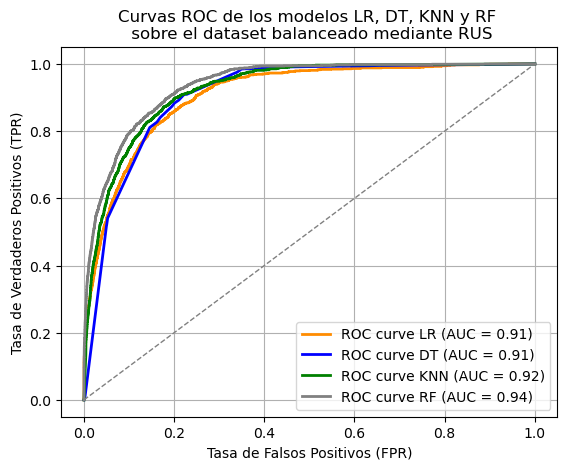

In [415]:
plt.figure()
plt.plot(fpr_LR_rus, tpr_LR_rus, color='#FF8C00', lw=2, label=f'ROC curve LR (AUC = {roc_auc:.2f})')
plt.plot(fpr_DT_rus, tpr_DT_rus, color='blue', lw=2, label=f'ROC curve DT (AUC = {roc_auc_rus_DT:.2f})')
plt.plot(fpr_knn_under, tpr_knn_under, color='green', lw=2, label=f'ROC curve KNN (AUC = {roc_auc_KNN_rus:.2f})')
plt.plot(fpr_RF_under, tpr_RF_under, color='grey', lw=2, label=f'ROC curve RF (AUC = {roc_auc_under_RF:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de los modelos LR, DT, KNN y RF \n sobre el dataset balanceado mediante RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/ROC_RUS.png", dpi=300, bbox_inches='tight')
plt.show()

#### 6.5.4 Curvas ROC de los Modelos de aprendizaje automático supervisado implementados
#### en el conjunto de datos balancedo con la metodología SMOTE/RUS

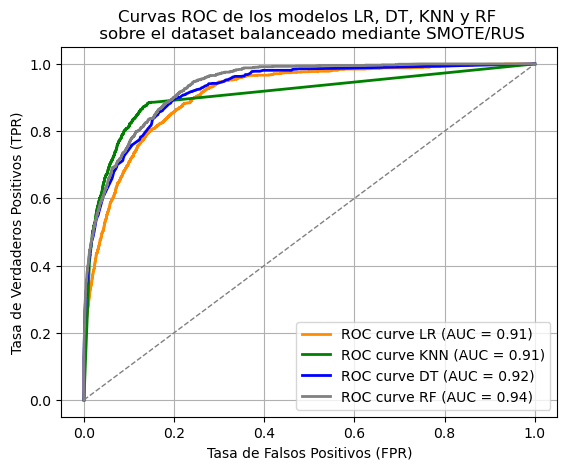

In [417]:
plt.figure()
plt.plot(fpr_LR_over, tpr_LR_over, color='#FF8C00', lw=2, label=f'ROC curve LR (AUC = {roc_auc_over_LR:.2f})')
plt.plot(fpr_knn_over, tpr_knn_over, color='green', lw=2, label=f'ROC curve KNN (AUC = {roc_auc_over_knn:.2f})')
plt.plot(fpr_DT_over, tpr_DT_over, color='blue', lw=2, label=f'ROC curve DT (AUC = {roc_auc_over_DT:.2f})')
plt.plot(fpr_RF_over, tpr_RF_over, color='grey', lw=2, label=f'ROC curve RF (AUC = {roc_auc_over_RF:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de los modelos LR, DT, KNN y RF \n sobre el dataset balanceado mediante SMOTE/RUS')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("C:/Users/carlo/Desktop/Andres/Postgrado/Universitat Internacional Valenciana/Cursos/TFM/Imagenes/ROC_SMOTE_RUS.png", dpi=300, bbox_inches='tight')
plt.show()